PROYECTO JUPYTER "EUROPICAR" Car Renting
---
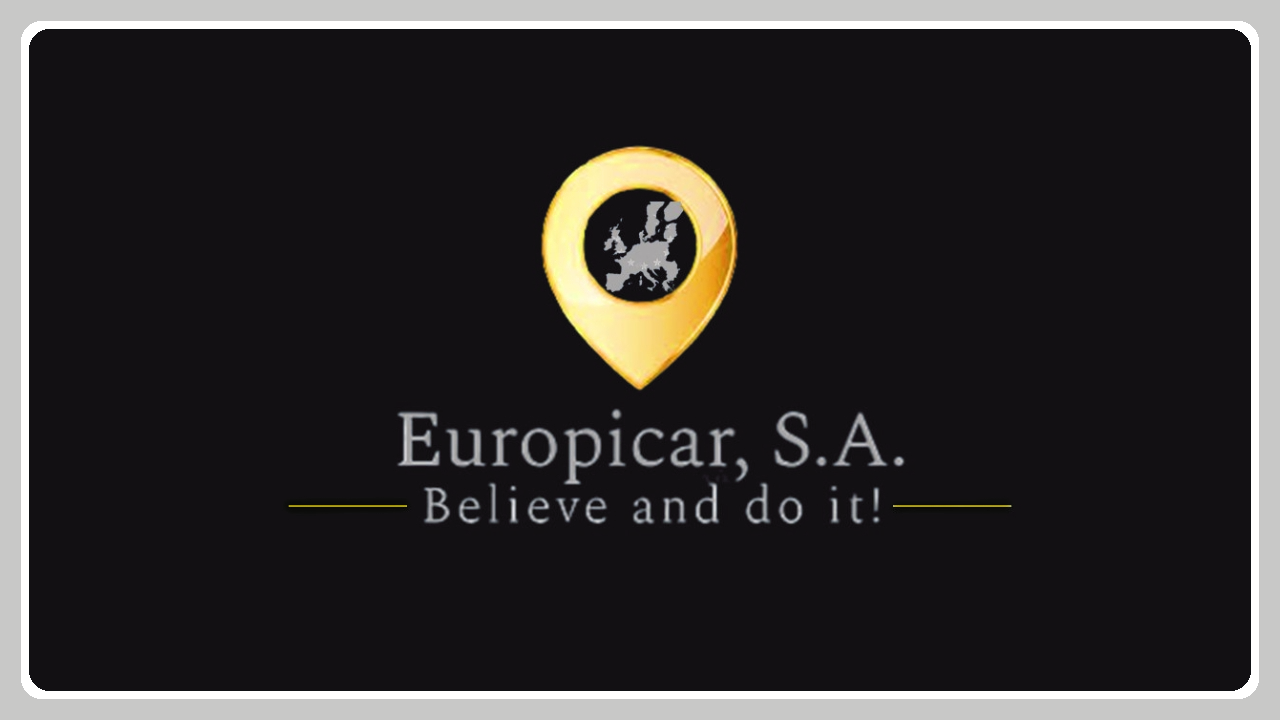

---

# Librerías:

In [ ]:
import pandas as pd
import numpy as np
import datetime
import matplotlib

# Datos:

Para esta parte del proyecto, en Python, utilizaremos los siguientes archivos:

- Csv principal con ofertas de coches de segunda mano (Segundamano.com):

    - 'Jupyter-coches-de-segunda-mano-sample.csv'

- Csv con ofertas de coches de segunda mano de Web Scraping (Autohero.com):

    - 'CSV_Scraping_autohero_LIMPIO.csv'

- Csv con ofertas de coches de renting (Bipicar.com):

    - 'CSV_BIPICAR_Jupiter_Definitivo2'

# 1 . ANÁLISIS EXPLORATORIO PRELIMINAR:

In [ ]:
# Leemos archivo:

df = pd.read_csv('Jupyter-coches-de-segunda-mano-sample.csv')

In [ ]:
df.head(5)

url                           company  \
0  e158ae0ca53119ca199c28c36b5c2fcd  9881bcdd5a0ad4733037b3fb25e69c3a   
1  ff267ebb7e700246f47f84f3db660b4b  9881bcdd5a0ad4733037b3fb25e69c3a   
2  de4b02db28ea7786c622b969be10c7c7  9881bcdd5a0ad4733037b3fb25e69c3a   
3  0449972a4d07594acf92e9a7dd28b39c  9881bcdd5a0ad4733037b3fb25e69c3a   
4  12c4fa49bd4fdf23f19ecf396d3f02ef  9881bcdd5a0ad4733037b3fb25e69c3a   

         make            model  \
0        SEAT           Toledo   
1     CITROEN               C1   
2        FORD  Transit Connect   
3  VOLKSWAGEN        Caravelle   
4        FORD          Transit   

                                             version  price  price_financed  \
0                                   SEAT Toledo  4p.    950             NaN   
1             CITROEN C1 PureTech 60KW 82CV Feel 5p.   6200             NaN   
2  FORD Transit Connect Van 1.5 TDCi 100cv Ambien...   7851          7024.0   
3  VOLKSWAGEN Caravelle Largo 2.0 TDI 140 Comfort...  19426             NaN   
4  FORD Transit 350 96kW L4 Ambiente Propulsion T...  22850         22800.0   

       fuel    year     kms  ...  doors   shift   color photos  \
0    Diésel  2000.0  227000  ...      4  Manual   Verde      5   
1  Gasolina  2017.0   50071  ...      5  Manual  Blanco      6   
2    Diésel  2016.0  103000  ...      4  Manual  Blanco     10   
3    Diésel  2014.0  120000  ...      4  Manual  Blanco      9   
4    Diésel  2017.0  107000  ...      2  Manual  Blanco      4   

   is_professional                            dealer   province country  \
0            False  0f4bb8455d27349b8273109b66a847f3    Navarra   Spain   
1             True                     Autos Raymara   Tenerife   Spain   
2             True                           Auto 96  Barcelona   Spain   
3             True                          Inniauto    Navarra   Spain   
4             True              Autofleet España,s.l    Sevilla   Spain   

          publish_date          insert_date  
0  2020-12-18 10:47:13  2021-01-15 00:00:00  
1  2021-01-02 11:25:40  2021-01-15 00:00:00  
2  2020-12-16 10:51:45  2021-01-15 00:00:00  
3  2020-11-25 11:09:14  2021-01-15 00:00:00  
4  2021-01-12 20:00:34  2021-01-15 00:00:00  

[5 rows x 21 columns]

## 1.1 Columnas información:

### Info columnas

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   url              50000 non-null  object 
 1   company          50000 non-null  object 
 2   make             49998 non-null  object 
 3   model            49995 non-null  object 
 4   version          50000 non-null  object 
 5   price            50000 non-null  int64  
 6   price_financed   23563 non-null  float64
 7   fuel             49954 non-null  object 
 8   year             49998 non-null  float64
 9   kms              50000 non-null  int64  
 10  power            41472 non-null  float64
 11  doors            50000 non-null  int64  
 12  shift            49889 non-null  object 
 13  color            49406 non-null  object 
 14  photos           50000 non-null  int64  
 15  is_professional  50000 non-null  bool   
 16  dealer           50000 non-null  object 
 17  province    

Datos que hay en cada columna (No nulos):

In [ ]:
print("\t""\t""Cantidad de valores por columna:")
for i in df.columns:
  print()
  print(f"Columna \"{i.upper()}\":      \n\t{df[i].count()} elementos.")

		Cantidad de valores por columna:

Columna "URL":      
	50000 elementos.

Columna "COMPANY":      
	50000 elementos.

Columna "MAKE":      
	49998 elementos.

Columna "MODEL":      
	49995 elementos.

Columna "VERSION":      
	50000 elementos.

Columna "PRICE":      
	50000 elementos.

Columna "PRICE_FINANCED":      
	23563 elementos.

Columna "FUEL":      
	49954 elementos.

Columna "YEAR":      
	49998 elementos.

Columna "KMS":      
	50000 elementos.

Columna "POWER":      
	41472 elementos.

Columna "DOORS":      
	50000 elementos.

Columna "SHIFT":      
	49889 elementos.

Columna "COLOR":      
	49406 elementos.

Columna "PHOTOS":      
	50000 elementos.

Columna "IS_PROFESSIONAL":      
	50000 elementos.

Columna "DEALER":      
	50000 elementos.

Columna "PROVINCE":      
	49994 elementos.

Columna "COUNTRY":      
	50000 elementos.

Columna "PUBLISH_DATE":      
	50000 elementos.

Columna "INSERT_DATE":      
	50000 elementos.


### Míns y Máxs por columna:

In [ ]:
# Máximos y Mínimos de las columnas númericas, tipo int o float:
lista_columnas = list(df.columns)
for col in df.columns:
  if df[col].dtype == np.int64 or df[col].dtype == np.float64:
    print(f"COLUMNA: `{col.upper()}`")
    print(f"Mínimo: {df[col].min()} ,\nMáximo: {df[col].max()}")
    print()


COLUMNA: `PRICE`
Mínimo: 300 ,
Máximo: 549900

COLUMNA: `PRICE_FINANCED`
Mínimo: 700.0 ,
Máximo: 428999.0

COLUMNA: `YEAR`
Mínimo: 1970.0 ,
Máximo: 2021.0

COLUMNA: `KMS`
Mínimo: 0 ,
Máximo: 5000000

COLUMNA: `POWER`
Mínimo: 29.0 ,
Máximo: 800.0

COLUMNA: `DOORS`
Mínimo: 2 ,
Máximo: 5

COLUMNA: `PHOTOS`
Mínimo: 0 ,
Máximo: 54



### Estadísticos por columna:

In [ ]:
for i in df.columns:
  if df[i].dtype == np.int64 or df[i].dtype == np.float64:
    estadisticos = round(df[i].describe(),3)
    print(f"  Columna: {i.upper()}", "\n")
    print(estadisticos)
    print("\n","\n")

  Columna: PRICE 

count     50000.00
mean      15166.27
std       16485.67
min         300.00
25%        5500.00
50%       11750.00
75%       19800.00
max      549900.00
Name: price, dtype: float64

 

  Columna: PRICE_FINANCED 

count     23563.000
mean      18480.029
std       13389.801
min         700.000
25%       10790.000
50%       15500.000
75%       21995.000
max      428999.000
Name: price_financed, dtype: float64

 

  Columna: YEAR 

count    49998.000
mean      2012.311
std          6.678
min       1970.000
25%       2007.000
50%       2015.000
75%       2018.000
max       2021.000
Name: year, dtype: float64

 

  Columna: KMS 

count      50000.000
mean      116359.095
std       107292.148
min            0.000
25%        38300.000
50%        99999.000
75%       174900.000
max      5000000.000
Name: kms, dtype: float64

 

  Columna: POWER 

count    41472.000
mean       146.396
std         71.284
min         29.000
25%        109.000
50%        130.000
75%        163.000


### Lista columnas

In [ ]:
list(df.columns)

['url',
 'company',
 'make',
 'model',
 'version',
 'price',
 'price_financed',
 'fuel',
 'year',
 'kms',
 'power',
 'doors',
 'shift',
 'color',
 'photos',
 'is_professional',
 'dealer',
 'province',
 'country',
 'publish_date',
 'insert_date']

### RESUMEN:
Nuestro dataframe tiene 21 columnas, que son:
1.   'url' --------------> "Url",
2.   'company' ---------->"Empresa",
3.   'make', ------------>"Marca",
4.   'model' ------------> "Modelo",
5.   'version' ---------->"Versión",
6.   'price' ------------>"Precio",
7.   'price_financed' --->"Precio financiado",
8.   'fuel'-------------->"Combustible",
9.   'year'-------------->"Año de salida" o "primera venta",
10.  'kms'--------------->"kilometros",
11.  'power'------------->"potencia" (caballos),
12.  'doors'------------->"Puertas",
13.  'shift'------------->"Tipo de cambio" (manual o automatico),
14.  'color'------------->"Color",
15.  'photos'------------>"Número de fotos" que tiene,
16.  'is_professional'--->"Profesional" (si es profesional o no),
17.  'dealer'------------>"Distribuidor",
18.  'province'---------->"Provincia",
19.  'country'----------->"País",
20.  'publish_date'------>"Fecha de publicación" del coche,
21.  'insert_date'------->"fecha de los datos".

## 1.2 Valores Únicos por columna.
Atención a columnas con pocos valores distintos.(valores únicos)

---
- Columna "Color": Observamos como esta columna contiene una cantidad enorme de valores distintos (3565 colores), analizandolo vemos que se debe a diversas causas. Se han colado otros datos junto con el color y algunos colores son iguales pero con pequeñas diferencias o matices.

  Vamos a corregir esto para poder analizar su distribución real más tarde.

In [ ]:
# Valores únicos por columna:

for col in df.columns:
  print(f" Únicos columna \"{col.upper()}\" ({df[col].nunique()} valores distintos): \n\n {df[col].unique()}")
  print("\n____________________________________________________________________________________________________\n")

 Únicos columna "URL" (50000 valores distintos): 

 ['e158ae0ca53119ca199c28c36b5c2fcd' 'ff267ebb7e700246f47f84f3db660b4b'
 'de4b02db28ea7786c622b969be10c7c7' ... 'c10afb53957fb8012707239bdfa66018'
 'f74363a6688ba11b71b4d980a959b8d3' '3d60801ccb96ef038747130e8a34ceda']

____________________________________________________________________________________________________

 Únicos columna "COMPANY" (1 valores distintos): 

 ['9881bcdd5a0ad4733037b3fb25e69c3a']

____________________________________________________________________________________________________

 Únicos columna "MAKE" (75 valores distintos): 

 ['SEAT' 'CITROEN' 'FORD' 'VOLKSWAGEN' 'PEUGEOT' 'LAND-ROVER' 'HONDA'
 'NISSAN' 'MERCEDES-BENZ' 'FIAT' 'SKODA' 'BMW' 'MAZDA' 'OPEL' 'AUDI'
 'VOLVO' 'MITSUBISHI' 'RENAULT' 'KIA' 'DACIA' 'HYUNDAI' 'JEEP' 'SUZUKI'
 'CHEVROLET' 'SSANGYONG' 'ABARTH' 'SMART' 'JAGUAR' 'TOYOTA' 'PORSCHE'
 'SAAB' 'MINI' 'CHRYSLER' 'MG' 'IVECO' 'DS' 'CADILLAC' 'INFINITI'
 'ASTON MARTIN' 'ALFA ROMEO' 'LEXUS' 'D

### Columna Color 3500 únicos.

Observamos que, a raíz de haber realizado un gráfico de distribucion de la variable "color", esta presenta más de 3500 valores diferentes y que estos no se corresponden con colores, sino con cadenas que, unas indican algún tipo de color y otras proporcionan información no relevante.


A continuación, vamos a limpiar esta columna "Color".

In [ ]:
# Colores que supuestamente tenemos:

print(f"Tenemos" ,len(df["color"].unique()),  "valores diferentes en la columna \"color\"." )
print()
print("Por ejemplo, desde la fila 100 hasta la 130:")
print()
print(df["color"][100:130])

Tenemos 3566 valores diferentes en la columna "color".

Por ejemplo, desde la fila 100 hasta la 130:

100                      Azul (brillante)
101                          Gris / Plata
102                                 Negro
103                          Gris / Plata
104                                 Negro
105                                 Negro
106                                  Rojo
107    Blanco (VARIAS UNIDADES Y COLORES)
108                   Rojo (ROJO EXOTICA)
109                  Negro (NEGRO COSMOS)
110                                Marrón
111                                  Rojo
112                                 Negro
113                          Gris / Plata
114         Z7Z7 Gris Cronos (metalizada)
115                                Blanco
116                                Blanco
117                                  Rojo
118                                Blanco
119                          Gris / Plata
120                                 Verde
121             

Vamos a ir cambiando los diferentes valores de la columna por el color que le corresponde, y en el caso de valores que no representan un color le asignaremos "SinColor" para indicar que no lo sabemos.

Para este proyecto, no es demasiado relevante saber si un coche es color blanco o blanco nacado. Por esto, vamos a reducir la cantidad de colores diferentes y agrupar estos a sus semejantes.

Explicamos el método a seguir:

In [ ]:
# Primero pasamos a string la columna:
# Y pensamos como vamos a sacar un patrón para poder adecuar los valores a sus colores correctos.

df["color"] = df["color"].astype(str)

# Realizando búsquedas de algunos colores, hemos encontrado que el color principal del coche suele estar con la primera letra en mayúscula.

# df['color'] = df['color'].apply(lambda x: 'Blanco' if df[df['Modelo'].str.contains('Blanco', case = False)] in x else x)

In [ ]:
# Por tanto, podemos cambiar estos coches con multitud de Blancos a Blancos a secas.

# df['color'] = df['color'].apply(lambda x:  'Blanco' if 'Blanco' in x else x) # en mayúscula la primera letra para indicar que tiene que aparecer como primera palabra y por tanto será color principal.

# Podemos comprobar que ahora solo aparecen Blancos donde antes habia Blancos con algo más.
# df[df['color'].str.contains('Blanco')]

Una vez ilustrado el método que vamos a utilizar para cambiar los colores, creamos un código específico y ejecutamos el cambio a todos los colores.

In [ ]:
######### CÓDIGO PARA CAMBIAR CADA VALOR QUE APARECE EN COLUMNA "COLOR" POR SU COLOR CORRESPONDIENTE! ################

# Rojo:
df['color'] = df['color'].apply(lambda x: "Rojo" if (
    'Rojo' in x or
    'RED' in x or
    'designo rojo jacinto' in x or
    'ROJO' in x or
    'FIRENZE RED' in x or
    'Red' in x or
    'Melbourne' in x or
    'Bodypanels' in x or
    'Caoba' in x or
    'Karmesinrot' in x or
    'Firenze' in x or
    'Granate' in x or
    'Patagonia' in x
    )
    else x)

# Blanco:
df['color'] = df['color'].apply(lambda x: "Blanco" if (
    'Blanco' in x or
    'BLANCO' in x or
    'Charcoal' in x or
    'Cassa White' in x or
    'Beige' in x or
    'WHITE' in x or
    'White' in x or
    'Mineralwei' in x or
    'Alpinwei' in x or
    'ALPINWEI' in x or
    'Perla' in x or
    'blanco diamante' in x or
    'Arktis' in x or
    'arktikweiß' in x or
    'Marfil' in x
    )
    else x)

# Azul:
df['color'] = df['color'].apply(lambda x: "Azul" if (
    'Azul' in x or
    'BLUE' in x or
    'Dark Sapphire' in x or
    'Blue' in x or
    'Mediterranblau' in x or
    'met ' in x or
    'Blau' in x or
    'Imperialblau' in x or
    'Phytonicblau' in x or
    'Turquesa' in x or
    'Tiefseeblau' in x or
    'STAR DUST' in x or
    'steel blue' in x or
    'Tansanitblau' in x or
    'Deep Ocean' in x or
    'Monacoblau' in x or
    'CAVANSITA' in x
    )
    else x)

# Naranja:
df['color'] = df['color'].apply(lambda x: "Naranja" if (
    'Naranja' in x or
    'Ámbar' in x or
    'Jatoba' in x or
    'Orange' in x
    )
    else x)

# Negro:
df['color'] = df['color'].apply(lambda x: "Negro" if (
    'Negro' in x or
    'NEGRO' in x or
    'BLACK' in x or
    'PHANTOM BLACK' in x or
    'Saphirschwarz' in x or
    'Dark Penta Metal' in x or
    'Schwarz' in x or # es negro en alemán
    'Carbonschwarz' in x or
    'Carbonschwartz' in x or
    'Sapphireschwarz' in x or
    'Sophisto-grau' in x or
    'Sparkling' in x or
    'Luxury' in x or # aparece solo en cadena que es Negro
    'Carbon Flash' in x or
    'M0 Pintura metalizada' in x or # aparece solo en cadena que es Negro
    'Kairo' in x or
    'Black' in x or
    'SLATE' in x
    )
    else x)

# Gris:
df['color'] = df['color'].apply(lambda x: "Gris" if (
    'Gris' in x or
    'Mineral' in x or
    'Gis Meteorito' in x or
    'GREY' in x or
    'MOUNTAINGRAU' in x or
    'GRIS' in x or
    'designo gris' in x or
    'Platinum Graphite' in x or
    'designo gris selenita magno' in x or
    'Grafito' in x or
    'Mineralgrau' in x or
    'Sophistograu' in x or
    'Sonnenstein' in x or
    'Spacegrau' in x or
    'Storm' in x or # aparece solo en cadena que es gris azulado
    'Gray' in x or
    'Grey' in x or
    'MagnÃ©tico' in x or
    'Grau' in x or # es gris en alemán
    'Dravitgrau' in x or
    'Gis MonzÃ³n' in x or
    'Magellangrau' in x
    )
    else x)

# Verde:
df['color'] = df['color'].apply(lambda x: "Verde" if (
    'Verde' in x or
    'Dark Camouflage' in x or # verde turquesa agua oscuro
    'Green' in x
    )
    else x)

# Marrón:
df['color'] = df['color'].apply(lambda x: "Marrón" if (
    'Marron' in x or
    'VINILO' in x or
    'Bronce Magnético' in x or
    'Bronce Vermont' in x or
    'Metallic Copper' in x or
    'Marrón' in x or
    'Brown' in x or
    'Moon' in x or
    'Havanna' in x or # aparece solo en cadena que es gris azulado
    'Bronze' in x or
    'MarrÃ³n' in x or
    '5DP' in x # aparece en dos cadenas que es marrón
    )
    else x)
# Plata:
df['color'] = df['color'].apply(lambda x: "Plata" if (
    'Plata' in x or
    'Lunar Silver' in x or
    'Phoenix Silver' in x or
    'PLAT' in x or
    'SLEEK SILVER' in x or
    'Sleek Silver' in x or
    'Silverstone' in x or
    'Titanium' in x or
    'Melting Silver' in x or
    'Sonic Silver' in x or
    'Mineralsilber' in x or
    'Celestial Silver' in x or
    'Platinum Silver' in x or
    'Metalicioso' in x or
    'PEARL SILVER' in x or
    'Glaciersilber' in x or
    'Platinsilber' in x or
    'Kaschmirsilber' in x or # aparece solo en cadena que es gris azulado
    'Tintansilber' in x or
    'Titansilber' in x or
    'Orionsilber' in x
    )
    else x)

# Dorado:
df['color'] = df['color'].apply(lambda x: "Dorado" if (
    'Jucarobeige' in x or
    'Oro ' in x or
    'Dorado' in x or
    'Kaikora' in x or
    'Sand Track' in x or
    'Gold' in x
    )
    else x)

# Amarillo:
df['color'] = df['color'].apply(lambda x: "Amarillo" if (
    'Amarillo' in x or
    'AMARILLO' in x or
    'Yellow' in x
    )
    else x)

# SinColor:
df['color'] = df['color'].apply(lambda x: "SinColor" if ( # Todos aparecen en cadena que es SinColor:
    'NACIONAL' in x or
    '(12225)' in x or
    'Piel' in x or
    'KM0 ( COMO NUEVO)' in x or
    'Tapicería' in x or
    '(( FULL, 4X4, NAVI, CALEFACTADOS, HK ))' in x or
    '(--EMBRAGUE ESTRENAR--)' in x or
    'FERRARI' in x or
    'nan' in x or # metemos los valores "nan" que aparecen como string.
    'Tela Negra (Concept)' in x
    )
    else x)

# Morado:
df['color'] = df['color'].apply(lambda x: "Morado" if (
    'Violeta' in x
    )
    else x)

# Rosa:
df['color'] = df['color'].apply(lambda x: "Rosa" if (
    'Rosa' in x
    )
    else x)


Ahora ya tenemos la columna "Color" limpia y podemos comprobarlo:

In [ ]:
# Comprobamos que todo tiene un color correcto:
print("Tenemos" ,len(df['color'].unique()), "valores para la columna \"color\":")
print()
print(df['color'].unique())



Tenemos 14 valores para la columna "color":

['Verde' 'Blanco' 'Azul' 'Gris' 'Rojo' 'Negro' 'Marrón' 'Amarillo'
 'SinColor' 'Naranja' 'Plata' 'Morado' 'Dorado' 'Rosa']


In [ ]:
df.head(3)

url                           company  \
0  e158ae0ca53119ca199c28c36b5c2fcd  9881bcdd5a0ad4733037b3fb25e69c3a   
1  ff267ebb7e700246f47f84f3db660b4b  9881bcdd5a0ad4733037b3fb25e69c3a   
2  de4b02db28ea7786c622b969be10c7c7  9881bcdd5a0ad4733037b3fb25e69c3a   

      make            model  \
0     SEAT           Toledo   
1  CITROEN               C1   
2     FORD  Transit Connect   

                                             version  price  price_financed  \
0                                   SEAT Toledo  4p.    950             NaN   
1             CITROEN C1 PureTech 60KW 82CV Feel 5p.   6200             NaN   
2  FORD Transit Connect Van 1.5 TDCi 100cv Ambien...   7851          7024.0   

       fuel    year     kms  ...  doors   shift   color photos  \
0    Diésel  2000.0  227000  ...      4  Manual   Verde      5   
1  Gasolina  2017.0   50071  ...      5  Manual  Blanco      6   
2    Diésel  2016.0  103000  ...      4  Manual  Blanco     10   

   is_professional                            dealer   province country  \
0            False  0f4bb8455d27349b8273109b66a847f3    Navarra   Spain   
1             True                     Autos Raymara   Tenerife   Spain   
2             True                           Auto 96  Barcelona   Spain   

          publish_date          insert_date  
0  2020-12-18 10:47:13  2021-01-15 00:00:00  
1  2021-01-02 11:25:40  2021-01-15 00:00:00  
2  2020-12-16 10:51:45  2021-01-15 00:00:00  

[3 rows x 21 columns]

### Columna Puertas unificación 2 y 4 puertas.

En la sección de este análisis que corresponde a presentar las distribuciones de los datos de cada columna, hemos apreciado más detenidamente como existen pocos coches con 2 y 4 puertas.

Creyendo que se trata de errores a la hora de catalogarlos (que no se ha tenido en cuenta la puerta del maletero que es lo que se suele hacer), vamos a unificar los valores de 2 y 4 puertas, con los de 3 y 5 puertas, respectivamente, ya que sería lo más correcto.

In [ ]:
# Cambiamos los valores "2" y "4" de la columna "doors" por "3" y "5", respectivamente.

df["doors"].loc[df[df["doors"] == 2].index] = 3
df["doors"].loc[df[df["doors"] == 4].index] = 5
print("Ahora tenemos solo estos valores para la columna \"doors\": ",
      df["doors"].unique()[0], "y",
      df["doors"].unique()[1], "(puertas).")
print()
print()

Ahora tenemos solo estos valores para la columna "doors":  5 y 3 (puertas).




<ipython-input-16-bc69325649bc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["doors"].loc[df[df["doors"] == 2].index] = 3
<ipython-input-16-bc69325649bc>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["doors"].loc[df[df["doors"] == 4].index] = 5


## 1.3 Nulos:

### Total de nulos:

In [ ]:
#Total de nulos:
print(f"Total nulos: {df.isnull().sum().sum()} valores")

Total nulos: 35137 valores


### 1.3.1 Nulos por fila:

In [ ]:
# Nulos por fila:
print(f"Nulos por fila: \n\n{df.isnull().sum(axis=1)}")

Nulos por fila: 

0        2
1        1
2        0
3        1
4        0
        ..
49995    0
49996    0
49997    0
49998    1
49999    1
Length: 50000, dtype: int64


#### --> Añadimos col "Nulos_fila" a df

In [ ]:
#Añadimos una columna al dataframe con los totales de nulos por cada fila:

df["Nulos_fila"] = df.isnull().sum(axis = 1)
df.head(3)

url                           company  \
0  e158ae0ca53119ca199c28c36b5c2fcd  9881bcdd5a0ad4733037b3fb25e69c3a   
1  ff267ebb7e700246f47f84f3db660b4b  9881bcdd5a0ad4733037b3fb25e69c3a   
2  de4b02db28ea7786c622b969be10c7c7  9881bcdd5a0ad4733037b3fb25e69c3a   

      make            model  \
0     SEAT           Toledo   
1  CITROEN               C1   
2     FORD  Transit Connect   

                                             version  price  price_financed  \
0                                   SEAT Toledo  4p.    950             NaN   
1             CITROEN C1 PureTech 60KW 82CV Feel 5p.   6200             NaN   
2  FORD Transit Connect Van 1.5 TDCi 100cv Ambien...   7851          7024.0   

       fuel    year     kms  ...   shift   color photos is_professional  \
0    Diésel  2000.0  227000  ...  Manual   Verde      5           False   
1  Gasolina  2017.0   50071  ...  Manual  Blanco      6            True   
2    Diésel  2016.0  103000  ...  Manual  Blanco     10            True   

                             dealer   province country         publish_date  \
0  0f4bb8455d27349b8273109b66a847f3    Navarra   Spain  2020-12-18 10:47:13   
1                     Autos Raymara   Tenerife   Spain  2021-01-02 11:25:40   
2                           Auto 96  Barcelona   Spain  2020-12-16 10:51:45   

           insert_date Nulos_fila  
0  2021-01-15 00:00:00          2  
1  2021-01-15 00:00:00          1  
2  2021-01-15 00:00:00          0  

[3 rows x 22 columns]

#### --> Análisis de nulos por fila

In [ ]:
# Alguna de las filas contiene demasiado nulos.
# Como tenemos 21 columnas, mostramos las filas con muchas columnas con nulos:


demasiados_nulos = df.isnull().sum(axis = 1)
print(f"El Máximo de nulos en una fila es: {demasiados_nulos.max()} \nEl Mínimo de nulos en una fila es: {demasiados_nulos.min()}")
print(f"La Media de nulos por fila es: {round(demasiados_nulos.mean(),2)}")

print()
print("Las filas con nulos mayor a 3 son: ")
for i in demasiados_nulos:
  if i > 3:
    print("\t",i)
  else: print(0)


Se han truncado las últimas 5000 líneas del flujo de salida.
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0

La media de nulos por fila es de 0.71, lo que nos indica que la mayoria estan sin ningun nulo.
El máximo de nulos en una fila es de 4. Además solo hay 3 filas que contienen tantos nulos.


In [ ]:
# ¿Dónde se encuentran estas filas?

print(f"Las filas (índice) que contienen más de 3 nulos son: ")
print()
print("\t",list(df.loc[df["Nulos_fila"] > 3].index))
print("\n\n")
print(f"Que corresponden a las filas:\n", df.loc[df["Nulos_fila"] > 3])


Las filas (índice) que contienen más de 3 nulos son: 

	 []



Que corresponden a las filas:
 Empty DataFrame
Columns: [url, company, make, model, version, price, price_financed, fuel, year, kms, power, doors, shift, color, photos, is_professional, dealer, province, country, publish_date, insert_date, Nulos_fila]
Index: []

[0 rows x 22 columns]


### 1.3.2 Nulos por columna:

In [ ]:
df.isnull().sum()

url                    0
company                0
make                   2
model                  5
version                0
price                  0
price_financed     26437
fuel                  46
year                   2
kms                    0
power               8528
doors                  0
shift                111
color                  0
photos                 0
is_professional        0
dealer                 0
province               6
country                0
publish_date           0
insert_date            0
Nulos_fila             0
dtype: int64

### 1.3.3 ¿Remplazo de valores nulos?
Existen algunas columnas con bastantes nulos.
  - ¿Cuáles son?
  - ¿Podemos eliminarlas sin perder información relevante?
  - ¿Podemos rellenar los nulos por algún valor?
  
Analicemos:

In [ ]:
# Nulos por columna:
# Vemos como las cols:
    # "price_financed" tiene demasiados nulos.
    # "power" tiene bastantes nulos, ¿Demasiados?
    # "color" tiene algunos nulos, pero no es muy relevante, no importa que falte el color de algunos coches.

df.isnull().sum()

url                    0
company                0
make                   2
model                  5
version                0
price                  0
price_financed     26437
fuel                  46
year                   2
kms                    0
power               8528
doors                  0
shift                111
color                  0
photos                 0
is_professional        0
dealer                 0
province               6
country                0
publish_date           0
insert_date            0
Nulos_fila             0
dtype: int64

### Resumen: ¿Qué info perdemos?
Si nos fijamos debajo, donde sacamos los porcentajes de nulos respecto del total de datos.

Vemos que solo perderíamos bastante información en las columnas:
- "Price_Financed" con un 53% de nulos y
- "Power" con un 17%.

En las demás columnas, la pérdida de información, en caso de eliminar los nulos del DF, es mínima, 0% o 1% de nulos respecto del total que tendría sin nulos por cada columna.

In [ ]:
# Porcentaje de nulos por columna:

for col in df.columns:
  print(f"Columna \"{col.upper()}\": \n\t{df[col].isnull().sum()} Nulo/s de {df[col].count() + df[col].isnull().sum()}\t-->    \t El {round( ((df[col].isnull().sum()) / ( df[col].count() + df[col].isnull().sum() )*100) ,2)} % son nulos (información perdida)")
  print()

Columna "URL": 
	0 Nulo/s de 50000	-->    	 El 0.0 % son nulos (información perdida)

Columna "COMPANY": 
	0 Nulo/s de 50000	-->    	 El 0.0 % son nulos (información perdida)

Columna "MAKE": 
	2 Nulo/s de 50000	-->    	 El 0.0 % son nulos (información perdida)

Columna "MODEL": 
	5 Nulo/s de 50000	-->    	 El 0.01 % son nulos (información perdida)

Columna "VERSION": 
	0 Nulo/s de 50000	-->    	 El 0.0 % son nulos (información perdida)

Columna "PRICE": 
	0 Nulo/s de 50000	-->    	 El 0.0 % son nulos (información perdida)

Columna "PRICE_FINANCED": 
	26437 Nulo/s de 50000	-->    	 El 52.87 % son nulos (información perdida)

Columna "FUEL": 
	46 Nulo/s de 50000	-->    	 El 0.09 % son nulos (información perdida)

Columna "YEAR": 
	2 Nulo/s de 50000	-->    	 El 0.0 % son nulos (información perdida)

Columna "KMS": 
	0 Nulo/s de 50000	-->    	 El 0.0 % son nulos (información perdida)

Columna "POWER": 
	8528 Nulo/s de 50000	-->    	 El 17.06 % son nulos (información perdida)

Columna "DOO

# 2 . TRANSFORMACIÓN Y LIMPIEZA DE DF:

## 2.1 Análisis DATATYPES :

### 2.1.1 ¿Qué columnas son fecha?
¿Cuales están bien catalogadas?

In [ ]:
df.dtypes

url                 object
company             object
make                object
model               object
version             object
price                int64
price_financed     float64
fuel                object
year               float64
kms                  int64
power              float64
doors                int64
shift               object
color               object
photos               int64
is_professional       bool
dealer              object
province            object
country             object
publish_date        object
insert_date         object
Nulos_fila           int64
dtype: object

Tenemos dos columnas de tipo fecha: "publish_date" y insert_date".


#### Convertimos a datetime:
  columnas "publish_date" y insert_date".

In [ ]:
# La col "publish_date" es object ('O')
print("La col \"publish_date\" es:", df["publish_date"].dtypes)
print("La col \"inset_date\" es:", df["insert_date"].dtypes)

# Convertimos a fecha:
print()
df["publish_date"] = pd.to_datetime(df["publish_date"], yearfirst = True)
df["insert_date"] = pd.to_datetime(df["insert_date"], yearfirst = True)

print("La col \"publish_date\" ahora es:", df["publish_date"].dtypes)
print("La col \"inset_date\" ahora es:", df["insert_date"].dtypes)


La col "publish_date" es: object
La col "inset_date" es: object

La col "publish_date" ahora es: datetime64[ns]
La col "inset_date" ahora es: datetime64[ns]


In [ ]:
df.dtypes

url                        object
company                    object
make                       object
model                      object
version                    object
price                       int64
price_financed            float64
fuel                       object
year                      float64
kms                         int64
power                     float64
doors                       int64
shift                      object
color                      object
photos                      int64
is_professional              bool
dealer                     object
province                   object
country                    object
publish_date       datetime64[ns]
insert_date        datetime64[ns]
Nulos_fila                  int64
dtype: object

### 2.1.2 Demás columnas a su datatype correcto:

In [ ]:
df.dtypes

url                        object
company                    object
make                       object
model                      object
version                    object
price                       int64
price_financed            float64
fuel                       object
year                      float64
kms                         int64
power                     float64
doors                       int64
shift                      object
color                      object
photos                      int64
is_professional              bool
dealer                     object
province                   object
country                    object
publish_date       datetime64[ns]
insert_date        datetime64[ns]
Nulos_fila                  int64
dtype: object



1. "year"(float64)   -----> datetime
2. "power"(float64)  --> int64 (realmente todos los decimales son 0)
3. "kms"(int64)  --------> Float64
4. "doors"(int64)-------> object



In [ ]:
# Convertimos a la vez las columnas a su tipo de dato correcto:
# Para la columna "year" que es un float y contiene un ".", vamos a pasarlo a cadena, eliminamos el "."
# y lo pasamos a datetime:

df['year'] = df['year'].astype(str)
df['year'] = df['year'].apply(lambda x: x.strip().replace('.0',''))

df['year'] = pd.to_datetime(df["year"], format='%Y')
df = df.astype({"power":"Int64", "insert_date":"datetime64[ns]", "doors":"object", "kms":"Float64"})

In [ ]:
df['year'].unique()

array(['2000-01-01T00:00:00.000000000', '2017-01-01T00:00:00.000000000',
       '2016-01-01T00:00:00.000000000', '2014-01-01T00:00:00.000000000',
       '2012-01-01T00:00:00.000000000', '2018-01-01T00:00:00.000000000',
       '1990-01-01T00:00:00.000000000', '2001-01-01T00:00:00.000000000',
       '2019-01-01T00:00:00.000000000', '2005-01-01T00:00:00.000000000',
       '2009-01-01T00:00:00.000000000', '2010-01-01T00:00:00.000000000',
       '2006-01-01T00:00:00.000000000', '2020-01-01T00:00:00.000000000',
       '2008-01-01T00:00:00.000000000', '2015-01-01T00:00:00.000000000',
       '2021-01-01T00:00:00.000000000', '2007-01-01T00:00:00.000000000',
       '2002-01-01T00:00:00.000000000', '2013-01-01T00:00:00.000000000',
       '1998-01-01T00:00:00.000000000', '2003-01-01T00:00:00.000000000',
       '2011-01-01T00:00:00.000000000', '2004-01-01T00:00:00.000000000',
       '1997-01-01T00:00:00.000000000', '1991-01-01T00:00:00.000000000',
       '1982-01-01T00:00:00.000000000', '1992-01-01

In [ ]:
df.dtypes

url                        object
company                    object
make                       object
model                      object
version                    object
price                       int64
price_financed            float64
fuel                       object
year               datetime64[ns]
kms                       Float64
power                       Int64
doors                      object
shift                      object
color                      object
photos                      int64
is_professional              bool
dealer                     object
province                   object
country                    object
publish_date       datetime64[ns]
insert_date        datetime64[ns]
Nulos_fila                  int64
dtype: object

## 2.2 Nombres columnas:

In [ ]:
# Nombres de las columnas:
list(df.columns)

['url',
 'company',
 'make',
 'model',
 'version',
 'price',
 'price_financed',
 'fuel',
 'year',
 'kms',
 'power',
 'doors',
 'shift',
 'color',
 'photos',
 'is_professional',
 'dealer',
 'province',
 'country',
 'publish_date',
 'insert_date',
 'Nulos_fila']

### 2.2.1 Nuevos nombres columnas:


1. "url" ------------> "Url"
2. "company"---------> "Empresa"
3. "make"------------> "Marca"
4. "model"-----------> "Modelo"
5. "version"---------> "Version"
6. "price"-----------> "Precio"
7. "price_financed"--> "Precio_financiado"
8. "fuel"------------> "Combustible"
9. "year"------------> "Año"
10. "kms"------------> "Kms"
11. "power"----------> "Potencia"
12. "doors"----------> "Puertas"
13. "shift"----------> "Cambio"
14. "color"----------> "Color"
15. "photos"---------> "Fotos"
16. "is_professional"> "Profesional"
17. "dealer"---------> "Distribuidor"
18. "province"-------> "Provincia"
19. "country"--------> "Pais"
20. "publish_date"---> "Fecha_publicacion"
21. "insert_date"----> "Registro_datos"
22. "Nulos/Fila"-----> "Nulos_fila"




#### Renombramos:

In [ ]:
#df.rename(columns = {'col_name': 'new col_name'})

# Para cambiar el nombre de todas a la vez es mejor asi:

df.columns = ["Url", "Empresa", "Marca", "Modelo", "Version", "Precio", "Precio_financiado", "Combustible", "Año", "Kms", "Potencia", "Puertas", "Cambio", "Color", "Fotos", "Profesional", "Distribuidor", "Provincia", "Pais", "Fecha_publicacion", "Registro_datos", "Nulos_fila"]
list(df.columns)

['Url',
 'Empresa',
 'Marca',
 'Modelo',
 'Version',
 'Precio',
 'Precio_financiado',
 'Combustible',
 'Año',
 'Kms',
 'Potencia',
 'Puertas',
 'Cambio',
 'Color',
 'Fotos',
 'Profesional',
 'Distribuidor',
 'Provincia',
 'Pais',
 'Fecha_publicacion',
 'Registro_datos',
 'Nulos_fila']

## 2.3 Eliminamos columnas:
Las columnas que no aportan información útil al proyecto, las eliminamos:

In [ ]:
# 1 -. La columna "is_profesional" ("Profesional") no aporta información al proyecto.

# 2 -. La cols "Company" ("Empresa"), "Url" ("Url") y "Country" ("Pais") son prescindibles:
#   - Company tiene como único valor un código extraño que no aporta nada,
#   - Url tiene muchísimos valores únicos, como es lógico, pero son códigos indescifrables. ¿Para que nos pueden servir?¿Eliminamos?, y por último,
#   - País tiene como único valor "España", por lo que no aporta información útil.
#   - Eliminamos también "Fecha_publicacion" ya que son fechas de 2020 y 2021 y no son relevantes actualmente.
#   - También eliminamos "Registro_datos" que es la fecha en la que se obtuvieron nuestros datos. Irrelevante.
#   - Eliminamos columna "Fotos" porque indica nº de fotos que tiene el coche pero no hay link para ver ninguna.
#   - Quitamos columna "Precio_financiado" tiene muchisimos nulos (52%) y no nos interesa financiar el pago.
#   - Eliminamos columna "Provincia" ya que no la tenemos en scraping de Autohero y no es relevante para nuestro análisis.
#   - Eliminamos la columna que creamos de "Nulos/fila" puesto que ha dejado de tener utilidad.
# Por tanto, eliminamos estas variables, cols.

#print(list(df.columns))

print(f"--- Eliminamos del df las cols: \"Profesional\", \"Empresa\", \"Url\", \"Pais\", \"Fecha_publicacion\", \"Registro_datos\", \"Fotos\", \"Provincia\" y \"Nulos/fila\" ---")
print()
df = df[['Marca', 'Modelo', 'Version', 'Precio', 'Combustible', 'Año', 'Kms', 'Potencia', 'Puertas', 'Cambio', 'Color', 'Distribuidor']]
df.head()

--- Eliminamos del df las cols: "Profesional", "Empresa", "Url", "Pais", "Fecha_publicacion", "Registro_datos", "Fotos", "Provincia" y "Nulos/fila" ---



Marca           Modelo  \
0        SEAT           Toledo   
1     CITROEN               C1   
2        FORD  Transit Connect   
3  VOLKSWAGEN        Caravelle   
4        FORD          Transit   

                                             Version  Precio Combustible  \
0                                   SEAT Toledo  4p.     950      Diésel   
1             CITROEN C1 PureTech 60KW 82CV Feel 5p.    6200    Gasolina   
2  FORD Transit Connect Van 1.5 TDCi 100cv Ambien...    7851      Diésel   
3  VOLKSWAGEN Caravelle Largo 2.0 TDI 140 Comfort...   19426      Diésel   
4  FORD Transit 350 96kW L4 Ambiente Propulsion T...   22850      Diésel   

         Año       Kms  Potencia Puertas  Cambio   Color  \
0 2000-01-01  227000.0      <NA>       5  Manual   Verde   
1 2017-01-01   50071.0        82       5  Manual  Blanco   
2 2016-01-01  103000.0       100       5  Manual  Blanco   
3 2014-01-01  120000.0       140       5  Manual  Blanco   
4 2017-01-01  107000.0       130       3  Manual  Blanco   

                       Distribuidor  
0  0f4bb8455d27349b8273109b66a847f3  
1                     Autos Raymara  
2                           Auto 96  
3                          Inniauto  
4              Autofleet España,s.l

#### Columnas del New df:

In [ ]:
# Ahora nuestras columnas son:

print(f"Ahora tenemos {len(df.columns)} columnas.", end = "\n\n")
print(f"Las nuevas columnas para el proyecto son: ", end = "\n\n")
for i in df.columns:
  print(f"---> \"{i}\"")

Ahora tenemos 12 columnas.

Las nuevas columnas para el proyecto son: 

---> "Marca"
---> "Modelo"
---> "Version"
---> "Precio"
---> "Combustible"
---> "Año"
---> "Kms"
---> "Potencia"
---> "Puertas"
---> "Cambio"
---> "Color"
---> "Distribuidor"


In [ ]:
df.dtypes

Marca                   object
Modelo                  object
Version                 object
Precio                   int64
Combustible             object
Año             datetime64[ns]
Kms                    Float64
Potencia                 Int64
Puertas                 object
Cambio                  object
Color                   object
Distribuidor            object
dtype: object

## 2.4 Eliminamos filas:

Nos informan de que los coches con más de 120 000 kms se consideran potencialmente averiados.
Por tanto, eliminamos los datos de estas ofertas de coches ya que no nos sirven para el Análisis:

Además hemos realizado un estudio sobre la vida útil de un vehiculo:
* "En líneas generales, la vida útil de un coche en años depende de muchos factores, lo cual hace que la cifra varíe. Pero, según el Informe Anual 2019 de la Asociación Española de Fabricantes de Automóviles y Camiones (ANFAC), la edad media del parque de vehículos en España es de 12,65 años. Por lo tanto, se puede estimar la vida útil media de los coches en unos 13 años aproximadamente.

* Ahora bien, si de kilometrajes se trata, tomando los datos del Observatorio Cetelem del Motor, se considera que la vida útil de un coche de gasolina ronda entre los 150.000 y los 200.000 kilómetros de media, mientras que para los coches diésel, la edad de jubilación estimada puede llegar a superar los 300.000 kilómetros."



Por tanto, podemos considerar para nuestro análisis que:
* Los coches con más de 120.000 kms serán eliminados a petición del cliente.
* Entre los coches gasolina y diésel se tendrá en cuenta las diferentes medias que la ANFAC nos índica sobre la vida útil, respecto a kilometros realizados de estos dos tipos, considerando, por ejemplo, que es mejor un diésel con 110.000 kms que un gasolina con 100.000 kms, ya que los diésel tienen más vida útil respecto a su kilometraje.

### 2.4.1 Drop > 120 000 kms

In [ ]:
# Eliminamos ofertas que contienen kilometraje superior o igual a 120 000 kms.
# Para eliminar con varias condiciones : df.drop(df[(df['Kms'] >120000) & (df['Precio'] < 1000000)].index, inplace=True)
# Fijarse en corchetes como van agrupando trozos de codigo.
# Para borrar con una sola condición: df.drop(df[df["Kms"] >= 120000].index, inplace = True)

# index selaña los índices de las filas (que cumplan condición) para eliminarlos.

df = df.drop(df[df["Kms"] >= 120000].index)
print("Ahora el máximo de kms en nuestro df es:", df["Kms"].max(), "Kilometros.")


Ahora el máximo de kms en nuestro df es: 119999.0 Kilometros.


### 2.4.2 Drop > 12 años.
Los coches con más de 12 años son eliminados del análisis puesto que el cliente así lo ha especificado.

De forma significativa, es más probable que estos coches sufran averias a corto plazo, por tanto, los eliminamos.

In [ ]:
# Eliminar los coches con más o igual a 12 años ya que son catalogados de vehículos con alto riesgo de avería.

df = df.drop(df[df['Año'] <= "2011"].index)
df['Año'].describe().T

<ipython-input-38-c6e50f4acb88>:4: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df['Año'].describe().T


count                   25358
unique                     10
top       2019-01-01 00:00:00
freq                     4437
first     2012-01-01 00:00:00
last      2021-01-01 00:00:00
Name: Año, dtype: object

In [ ]:
# Comprobamos y vemos que todo está correcto:

df["Año"].min()

Timestamp('2012-01-01 00:00:00')

In [ ]:
df.head(10)

Marca           Modelo  \
1      CITROEN               C1   
2         FORD  Transit Connect   
4         FORD          Transit   
5      PEUGEOT             3008   
6   LAND-ROVER  Discovery Sport   
8      CITROEN         Berlingo   
9       NISSAN             NOTE   
10     CITROEN         Berlingo   
14        FIAT            Panda   
15       SKODA          Octavia   

                                              Version  Precio Combustible  \
1              CITROEN C1 PureTech 60KW 82CV Feel 5p.    6200    Gasolina   
2   FORD Transit Connect Van 1.5 TDCi 100cv Ambien...    7851      Diésel   
4   FORD Transit 350 96kW L4 Ambiente Propulsion T...   22850      Diésel   
5          PEUGEOT 3008 Style 1.2 PureTech 130 SS 5p.   11490    Gasolina   
6   LAND-ROVER Discovery Sport 2.0L TD4 110kW 150C...   28500      Diésel   
8   CITROEN Berlingo Multispace 20 Aniv. PureTech ...   12100    Gasolina   
9   NISSAN NOTE 5p. 1.2G 80CV Acenta NissanConnect...    6300    Gasolina   
10  CITROEN Berlingo Multispace 20 Aniv.BlueHDi 74...   13900      Diésel   
14         FIAT Panda 4X4 1.3 70kW 95CV Diesel E6 5p.    9500      Diésel   
15      SKODA Octavia 1.0 TSI 85KW 115CV Ambition 5p.   13990    Gasolina   

          Año       Kms  Potencia Puertas      Cambio   Color  \
1  2017-01-01   50071.0        82       5      Manual  Blanco   
2  2016-01-01  103000.0       100       5      Manual  Blanco   
4  2017-01-01  107000.0       130       3      Manual  Blanco   
5  2016-01-01   78665.0       130       5      Manual  Blanco   
6  2017-01-01   36238.0       150       5  Automático  Blanco   
8  2018-01-01   45000.0       110       5      Manual    Azul   
9  2016-01-01   77000.0        80       5      Manual  Blanco   
10 2017-01-01   81000.0       100       5      Manual    Gris   
14 2017-01-01  101623.0        95       5      Manual  Blanco   
15 2019-01-01    7591.0       115       5      Manual    Gris   

                        Distribuidor  
1                      Autos Raymara  
2                            Auto 96  
4               Autofleet España,s.l  
5                     Flexicar Rivas  
6                            OK Cars  
8   f7cb72400bd7fb19294e1f9692c48cd9  
9   8a3b0eb4d055a275274895319688e80a  
10                Automóviles Emilio  
14                       CarNext.com  
15                         Ams Conde

Tras los cambios, el número de coches se ha visto reducido.

De 50.000 coches disponibles, solo cerca de la mitad nos interesan tras la adaptación a los criterios que nos pide el cliente.

In [ ]:
print(f"Ahora contamos con {df.shape[0]} ofertas de coches. ")

Ahora contamos con 25360 ofertas de coches. 


### 2.4.3 Drop filas con nulos.

In [ ]:
# Nulos por cada columna:

df.isnull().sum()

Marca             2
Modelo            0
Version           0
Precio            0
Combustible      29
Año               2
Kms               0
Potencia        409
Puertas           0
Cambio           46
Color             0
Distribuidor      0
dtype: int64

Para acabar con el tratamiento de las filas, nos fijamos en los nulos que finalmente han quedado tras todos los cambios.

Encontramos:

- Columna "Marca": Contine 2 nulos que, puesto que la marca aparece en la columna "Version" podemos buscar estas filas y añadir las marcas manualmente, eliminando así los nulos correctamente.

- Columna "Combustible": Contiene 29 nulos. No hay forma de saber que tipo de combustible son y tras pensar que poder hacer, hemos decidido que lo mejor es eliminarlos del análisis puesto que es un dato importante a la hora de valorar si es candidato a compra o no.

- Columna "Año": Contiene 2 nulos. Al igual que los nulos de combustible, es un dato importante y debemos eliminarlos, no sabemos si cumple o no con la restricción de no tener más de 12 años.

- Columna "Potencia": Contiene 409 nulos. Tras varios planteamientos, decidimos eliminarlos, ya que es una variable importante y muy relacionada con el precio del coche.

- Columna "Cambio": Contiene 46 nulos. Decidimos eliminarlos. Es una variable demasiado importante para decidir la compra o no de estos coches.

- Columna "Color": Contenía 107 nulos. No es un dato importante a la hora de valorar las ofertas de coches, por lo que los sustituimos por "Sincolor", durante el proceso de corrección de los valores de esta columna.

In [ ]:
# Eliminamos nulos de:
#   - "Combustible" (29 nulos)
#   - "Año" (2 nulos)
#   - "Potencia" (409 nulos)
#   - "Cambio" (46 nulos)

df = df.drop(df[df["Combustible"].isnull()].index)
df.drop(df[df["Año"].isnull()].index, inplace = True)
df.drop(df[df["Potencia"].isnull()].index, inplace = True)
df.drop(df[df["Cambio"].isnull()].index, inplace = True)

In [ ]:
# Comprobamos:

df.isnull().sum()

Marca           2
Modelo          0
Version         0
Precio          0
Combustible     0
Año             0
Kms             0
Potencia        0
Puertas         0
Cambio          0
Color           0
Distribuidor    0
dtype: int64

Para acabar con los nulos por completo, vamos a encontrar las dos filas con nulos en "Marca" y vamos a rellenarlas con la marca que aparece en el "Modelo" y "Version":

In [ ]:
df.loc[df["Marca"].isnull()]

Marca Modelo        Version  Precio Combustible        Año  Kms  \
5659    NaN    D2S   D2S 27kW 3p.   21495   Eléctrico 2021-01-01  3.0   
47381   NaN    D2S   D2S 27kW 3p.   21495   Eléctrico 2021-01-01  6.0   

       Potencia Puertas      Cambio   Color   Distribuidor  
5659         37       3  Automático  Blanco  GJ AUTOMOTIVE  
47381        37       3  Automático    Azul  GJ AUTOMOTIVE

Observamos que se trata de dos coches eléctricos.

---
Buscando más información por internet encontramos que se trata del coche Invita DSD eléctrico de 3 puertas.
Le añadimos la marca a estos dos coches no catalogados.

---
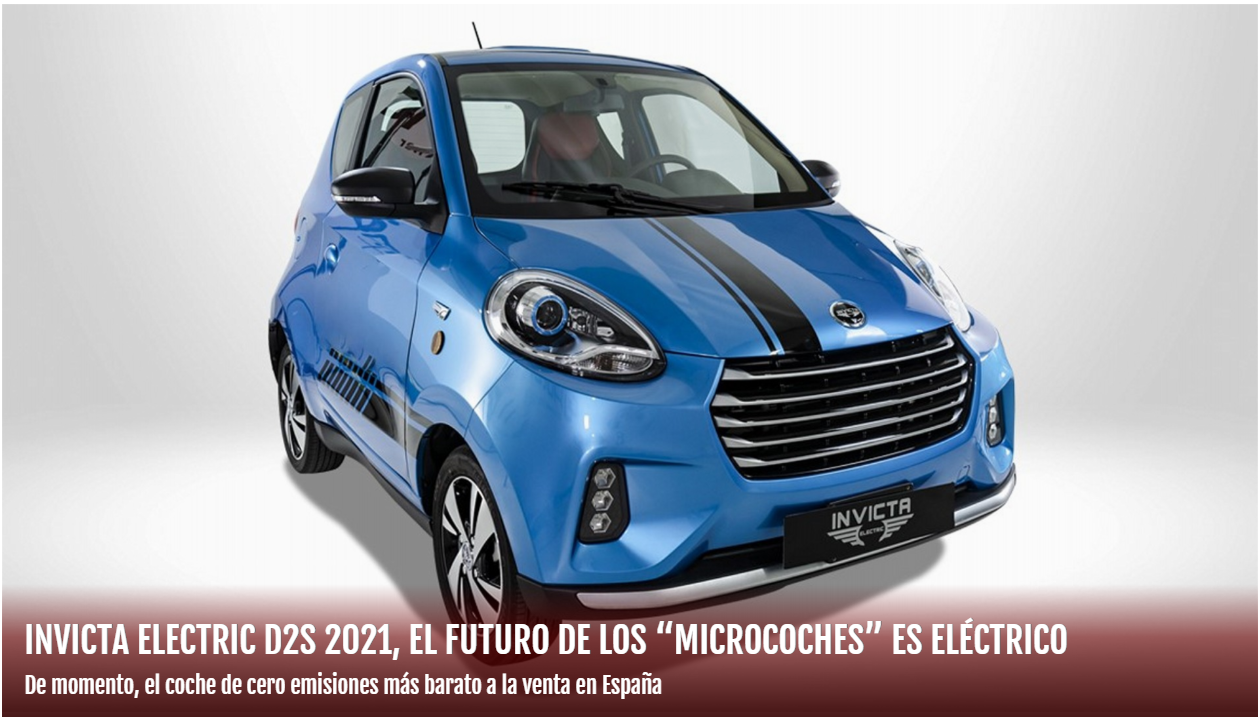


In [ ]:
# Añadimos las marcas: con los índices que encontramos buscando los nulos. (5659 y 47381)

df["Marca"].loc[47381] = "INVICTA"
df["Marca"].loc[5659] = "INVICTA"

# Y comprobamos:
print("Los valores para estas dos filas, ahora son: ", df["Marca"].loc[47381],"y", df["Marca"].loc[5659])
print()
df.loc[df["Marca"].isnull()]


Los valores para estas dos filas, ahora son:  INVICTA y INVICTA



<ipython-input-46-1be80ceb6174>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Marca"].loc[47381] = "INVICTA"
<ipython-input-46-1be80ceb6174>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Marca"].loc[5659] = "INVICTA"


Empty DataFrame
Columns: [Marca, Modelo, Version, Precio, Combustible, Año, Kms, Potencia, Puertas, Cambio, Color, Distribuidor]
Index: []

In [ ]:
print(f"Finalmente contamos con {df.shape[0]} coches procedentes de \"Segundamano.com\".")
print(f"Contando con {df.isnull().sum().sum()} nulos en todo el df.")

Finalmente contamos con 24901 coches procedentes de "Segundamano.com".
Contando con 0 nulos en todo el df.


In [ ]:
df.head(5)

Marca           Modelo  \
1     CITROEN               C1   
2        FORD  Transit Connect   
4        FORD          Transit   
5     PEUGEOT             3008   
6  LAND-ROVER  Discovery Sport   

                                             Version  Precio Combustible  \
1             CITROEN C1 PureTech 60KW 82CV Feel 5p.    6200    Gasolina   
2  FORD Transit Connect Van 1.5 TDCi 100cv Ambien...    7851      Diésel   
4  FORD Transit 350 96kW L4 Ambiente Propulsion T...   22850      Diésel   
5         PEUGEOT 3008 Style 1.2 PureTech 130 SS 5p.   11490    Gasolina   
6  LAND-ROVER Discovery Sport 2.0L TD4 110kW 150C...   28500      Diésel   

         Año       Kms  Potencia Puertas      Cambio   Color  \
1 2017-01-01   50071.0        82       5      Manual  Blanco   
2 2016-01-01  103000.0       100       5      Manual  Blanco   
4 2017-01-01  107000.0       130       3      Manual  Blanco   
5 2016-01-01   78665.0       130       5      Manual  Blanco   
6 2017-01-01   36238.0       150       5  Automático  Blanco   

           Distribuidor  
1         Autos Raymara  
2               Auto 96  
4  Autofleet España,s.l  
5        Flexicar Rivas  
6               OK Cars

## 2.5 Eliminamos duplicados:
Finalmente eliminamos los posibles duplicados que pueda haber.

In [ ]:
len(df)

24901

In [ ]:
# Vemos si exiten filas duplicadas y cuántas:

print(f"Existen {df.duplicated(keep='first').sum()} filas duplicadas, teniendo en cuenta todas las columnas.")
print()
df[df.duplicated()].head(5) # Mostramos los duplicados. No se toma en cuenta la primera aparición de estos.

Existen 584 filas duplicadas, teniendo en cuenta todas las columnas.



Marca      Modelo                                            Version  \
1638    MINI        MINI                      MINI MINI ONE D 5 PUERTAS 5p.   
1872    MINI  Countryman                            MINI Countryman One 5p.   
2250     BMW     Serie 1                               BMW Serie 1 116d 5p.   
3473    SEAT       Ateca   SEAT Ateca 1.6 TDI 85kW 115CV StSp Style Eco 5p.   
5249  NISSAN        JUKE  NISSAN JUKE G E6DTemp 83 kW 112 CV 5MT ACENTA 5p.   

      Precio Combustible        Año       Kms  Potencia Puertas  Cambio  \
1638   14400      Diésel 2016-01-01   28500.0        95       5  Manual   
1872   19600    Gasolina 2017-01-01   31125.0       102       5  Manual   
2250   17250      Diésel 2018-01-01   55437.0       116       5  Manual   
3473   16400      Diésel 2017-01-01  119435.0       115       5  Manual   
5249   12950    Gasolina 2019-01-01   32195.0       112       5  Manual   

       Color     Distribuidor  
1638  Blanco  Gaztelu Ocasión  
1872   Verde     Ocasion Plus  
2250   Negro   Ald Automotive  
3473  Blanco      CarNext.com  
5249    Rojo     Ocasion Plus

In [ ]:
# Eliminamos las filas duplicadas:

df.drop_duplicates(subset=None, keep='first', inplace=True, ignore_index=False) # argumentos por defecto tambien funciona.

In [ ]:
# Comprobamos:
len(df)

24317

# 3 . CSV WEB SCRAPING (AUTOHERO.COM)
(Coches de segunda mano)

Introducimos al proyecto ofertas de coches obtenidos por Web Scraping a la página web "autohero.com".
Estos datos ya han sido analizados, limpiados y transformados, de igual forma que los apartados anteriores, en otro notebook de Python.

Por ello, prescindimos de volver a comentar el proceso. Aun así existe el archivo .inbpy con todo el proceso.

[Enlace a Colab de ETL Web Scraping de "autohero.com"](https://colab.research.google.com/drive/1KksUX8FroD5t2QOJvKSCHfKWihQQE7pJ)

No obstante, el Scrapeo propiamente dicho se ha realizado con Pycharm, un entorno de ejecución distinto, en local, y que también existe el archivo .py de este proceso. El cual se adjuntará en la carpeta con los archivos de todo el proyecto.

En cualquier caso, vemos necesario informar de los tratamientos más importantes que hemos realizado a este archivo csv, siendo estos los siguientes:
  - Eliminación de nulos, de la forma más correcta posible.
  - Creación de columna "Distribuidor" con valor único "Autohero" para indicar que las ofertas han salido de esta web.
  - Limpieza de los distintos valores de las columnas:

    Valores iniciales:
        Columna "MARCA": Seat Ateca,
        Columna "MODELO": Seat Ateca,
        Columna "VERSION": 1.5 TSI Style
        Columna "PRECIO": 27.499\xa0€
        Columna "COMBUSTIBLE": Gasolina
        Columna "AÑO": 12.2021
        Columna "KMS": 61.548 km
        Columna "POTENCIA": 150 CV / 110 kW
        Columna "PUERTAS": 5.0
        Columna "CAMBIO": Cambio tipo automático
        Columna "COLOR": Gris
        Columna "DISTRIBUIDOR": Autohero.com

    Valores finales:
        Columna "MARCA": Seat
        Columna "MODELO": Ateca
        Columna "VERSION": 1.5 TSI Style
        Columna "PRECIO": 27499
        Columna "COMBUSTIBLE": Gasolina
        Columna "AÑO": 2021
        Columna "KMS": 61548
        Columna "POTENCIA": 150
        Columna "PUERTAS": 5
        Columna "CAMBIO": Automático
        Columna "COLOR": Gris
        Columna "DISTRIBUIDOR": Autohero.com

  - Transformación de tipo de datos a su tipo correcto:

      Columnas a transformar:

        "Precio"(object) --------> int64.
        "Año"(object) -----------> datetime64[ns].
        "Kms"(object) -----------> Float64.
        "Potencia"(object)-------> Int64.

Tras las operaciones pertinentes obtenemos el csv limpio y es el que vamos a concatenar al df principal:

In [ ]:
# Archivo csv de coches de segunda mano, ya limpio, obtenidos por Scraping de "Autohero.com".
df_scraping = pd.read_csv('CSV_Scraping_autohero_LIMPIO.csv')

#Mostramos los datos:
df_scraping.head(20)

Marca       Modelo                    Version  Precio Combustible  \
0         Seat        Ateca              1.5 TSI Style   28399    Gasolina   
1      Citroen  C3 Aircross      1.2 PureTech C-Series   17099    Gasolina   
2         Seat        Arona          1.0 TSI Xperience   21599    Gasolina   
3         Fiat        Panda  1.0 Mild-Hybrid City Life   13599    Gasolina   
4      Hyundai        Bayon            1.2 Essence 2WD   17199    Gasolina   
5         Opel        Corsa                1.2 GS Line   15499    Gasolina   
6      Peugeot          208     1.2 PureTech Signature   11799    Gasolina   
7      Hyundai          i20             1.0 TGDI Klass   16399    Gasolina   
8      Hyundai         Kona       1.6 Hybrid TGDI Maxx   23499     Híbrido   
9   Volkswagen        T-Roc            1.0 TSI Advance   22499    Gasolina   
10         Kia      Picanto            1.0 DPi Concept   11099    Gasolina   
11        MINI         MINI                     Cooper   21799    Gasolina   
12        Seat         León              1.5 TSI FR Go   25699     Híbrido   
13       Dacia   Sandero II            0.9 TCe Comfort   10599    Gasolina   
14        Fiat        Panda  1.0 Gse Mild-Hybrid Urban   12199    Gasolina   
15         Kia        XCeed           1.0 TGDI Emotion   19999    Gasolina   
16     Citroen           C4          1.5 Blue-HDi Feel   21499      Diésel   
17     Renault         Clio    1.3 TCe RS Line GPF EDC   19399    Gasolina   
18       Mazda            2          1.5 Hybrid Select   22599     Híbrido   
19        Fiat        Panda  1.0 Mild-Hybrid City Life   12699    Gasolina   

           Año     Kms  Potencia  Puertas      Cambio    Color  Distribuidor  
0   2021-01-01   330.0       150        5  Automático     Gris  Autohero.com  
1   2020-01-01  1695.0       110        5      Manual     Gris  Autohero.com  
2   2023-01-01  1771.0       110        3      Manual     Rojo  Autohero.com  
3   2022-01-01  2019.0        70        5      Manual     Gris  Autohero.com  
4   2022-01-01  2794.0        84        5      Manual   Blanco  Autohero.com  
5   2020-01-01  3449.0       101        5      Manual   Blanco  Autohero.com  
6   2019-01-01  3235.0        82        5      Manual   Blanco  Autohero.com  
7   2022-01-01  4507.0       101        3      Manual   Blanco  Autohero.com  
8   2022-01-01  4708.0       105        5  Automático     Gris  Autohero.com  
9   2019-01-01  4836.0       115        5      Manual     Rojo  Autohero.com  
10  2021-01-01  5529.0        67        5      Manual     Rojo  Autohero.com  
11  2020-01-01  5489.0       136        5  Automático     Rojo  Autohero.com  
12  2021-01-01  7328.0       150        5  Automático     Gris  Autohero.com  
13  2019-01-01  7355.0        90        5      Manual   Blanco  Autohero.com  
14  2021-01-01  7590.0        70        5      Manual    Plata  Autohero.com  
15  2021-01-01  7485.0       120        5      Manual     Azul  Autohero.com  
16  2022-01-01  7769.0       110        5      Manual  Naranja  Autohero.com  
17  2020-01-01  7861.0       131        5  Automático     Azul  Autohero.com  
18  2022-01-01  8498.0       116        5  Automático    Plata  Autohero.com  
19  2022-01-01  8588.0        70        5      Manual     Gris  Autohero.com

Mostramos las nuevas ofertas de coches de segunda mano, que vamos a introducir al análisis:

In [ ]:
# vemos la forma de df_scraping y vemos cuantas filas y columnas tenemos:
# '{:,g}'.format(valor) para formato separador de miles o con f para decimales

print(f"En df_scraping contamos con {'{:,g}'.format(df_scraping.shape[0])} ofertas nuevas de coches. Contiene {df_scraping.shape[1]} columnas.")
print(f"En el df principal tenemos {'{:,g}'.format(df.shape[0])} ofertas de coches, filas. Con {df.shape[1]} columnas.")
print()
print(f"Por tanto, con la unión de los dos dfs, tenemos {'{:,g}'.format(df.shape[0] + df_scraping.shape[0])} ofertas de coches en total.")

En df_scraping contamos con 1,417 ofertas nuevas de coches. Contiene 12 columnas.
En el df principal tenemos 24,317 ofertas de coches, filas. Con 12 columnas.

Por tanto, con la unión de los dos dfs, tenemos 25,734 ofertas de coches en total.


Concatenamos los archivos:

In [ ]:
# Concatenamos este nuevo archivo con el principal para unir todas las ofertas de coches:
df = pd.concat([df,df_scraping])

In [ ]:
# Reiniciamos el índice para mostrarlo coherente, ya que al concatenar, el índice ya no está correcto a las filas.

df.reset_index(drop=True,inplace=True)# con drop=True NO generamos una columna con los índices antiguos.

In [ ]:
# Comprobamos que no tenemos una columna nueva, con índices antiguos, y vemos que "Distribuidor" es Autohero en la cola del df.

df.tail(3)

Marca        Modelo                       Version  Precio  \
25731  Renault  Grand Scenic                   1.3 TCe Zen   18499   
25732      Kia           Rio  1.2 CVVT Eco-Dynamics X-Tech    8599   
25733   Nissan  NV200 Evalia               1.5 dCi Comfort   15099   

      Combustible         Año      Kms  Potencia Puertas  Cambio   Color  \
25731    Gasolina  2018-01-01  61395.0       140       5  Manual  Marrón   
25732    Gasolina  2015-01-01  61549.0        85       5  Manual  Blanco   
25733      Diésel  2018-01-01  61706.0       110       5  Manual  Blanco   

       Distribuidor  
25731  Autohero.com  
25732  Autohero.com  
25733  Autohero.com

In [ ]:
df.head(3)

Marca           Modelo  \
0  CITROEN               C1   
1     FORD  Transit Connect   
2     FORD          Transit   

                                             Version  Precio Combustible  \
0             CITROEN C1 PureTech 60KW 82CV Feel 5p.    6200    Gasolina   
1  FORD Transit Connect Van 1.5 TDCi 100cv Ambien...    7851      Diésel   
2  FORD Transit 350 96kW L4 Ambiente Propulsion T...   22850      Diésel   

                   Año       Kms  Potencia Puertas  Cambio   Color  \
0  2017-01-01 00:00:00   50071.0        82       5  Manual  Blanco   
1  2016-01-01 00:00:00  103000.0       100       5  Manual  Blanco   
2  2017-01-01 00:00:00  107000.0       130       3  Manual  Blanco   

           Distribuidor  
0         Autos Raymara  
1               Auto 96  
2  Autofleet España,s.l

In [ ]:
# Comprobamos también los valores únicos de las columnas en busca de incoherencias y la necesidad de transformar antes de seguir.
for col in df.columns:
  print(f" Únicos  de columna \"{col.upper()}\" ({df[col].nunique()} valores distintos): \n\n {df[col].unique()}")
  print("\n""\n")


 Únicos  de columna "MARCA" (88 valores distintos): 

 ['CITROEN' 'FORD' 'PEUGEOT' 'LAND-ROVER' 'NISSAN' 'FIAT' 'SKODA' 'BMW'
 'MITSUBISHI' 'RENAULT' 'SEAT' 'KIA' 'OPEL' 'VOLKSWAGEN' 'MERCEDES-BENZ'
 'DACIA' 'VOLVO' 'HYUNDAI' 'JEEP' 'SUZUKI' 'SSANGYONG' 'ABARTH' 'AUDI'
 'SMART' 'TOYOTA' 'PORSCHE' 'MAZDA' 'MINI' 'DS' 'CHEVROLET' 'JAGUAR'
 'INFINITI' 'ALFA ROMEO' 'LEXUS' 'HONDA' 'IVECO' 'TESLA' 'ASTON MARTIN'
 'DR AUTOMOBILES' 'SUBARU' 'MASERATI' 'ISUZU' 'CUPRA' 'LANCIA' 'DFSK'
 'INVICTA' 'FERRARI' 'MAHINDRA' 'TATA' 'BENTLEY' 'ALPINE' 'LAMBORGHINI'
 'MAXUS' 'PIAGGIO' 'Seat' 'Citroen' 'Fiat' 'Hyundai' 'Opel' 'Peugeot'
 'Volkswagen' 'Kia' 'Dacia' 'Renault' 'Mazda' 'Nissan' 'Toyota' 'Abarth'
 'Ford' 'Jeep' 'Volvo' 'Skoda' 'Subaru' 'Mercedes-Benz' 'Cupra'
 'Chevrolet' 'Suzuki' 'Mitsubishi' 'Land' 'Honda' 'Smart' 'Audi'
 'Ssangyong' 'Lexus' 'Lancia' 'Alfa' 'Jaguar' 'MG']



 Únicos  de columna "MODELO" (625 valores distintos): 

 ['C1' 'Transit Connect' 'Transit' '3008' 'Discovery Sport' 'Ber

Arreglos que hay que realizar:

  - 'Marca': los valores del df principal están en mayúsculas y los del scraping no, hay que igualarlos para evitar errores en los gráficos posteriores.
  - 'Combustible': Los únicos son: 'Gasolina', 'Diésel', 'Híbrido enchufable', 'Eléctrico', 'Gas natural (CNG)',
 'Híbrido', 'Gas licuado (GLP)'.
      - Eliminamos los parentesis ya que no aportan nada y molestarán en los gráficos posteriores.
  - 'Año': aparecen valores diferentes para df principal y df_scraping
  - 'Color': vamos a meter el color "beige" en blancos.

In [ ]:
# Arreglamos las columnas:

# "Marca":
df['Marca'] = df['Marca'].apply(lambda x: x.upper())

# "Combustible":
df['Combustible'] = df['Combustible'].apply(lambda x: x.replace(" (GLP)","").replace(" (CNG)","").strip())

# "Color":
df['Color'] = df['Color'].apply(lambda x: 'Blanco' if x == 'Beige' else x)

# "Año":
df["Año"] = df["Año"].astype(str)                         # Pasamos a cadena
df['Año'] = df["Año"].apply(lambda x: x.split("-")[0])    # Separamos y cogemos solo año
df['Año'] = pd.to_datetime(df["Año"], format='%Y')        # Convertimos a datetime

In [ ]:
# comprobamos:
for col in df.columns:
  print(f" Únicos  de columna \"{col.upper()}\" ({df[col].nunique()} valores distintos): \n\n {df[col].unique()}")
  print("__________________________________________________________________________")
  print("\n\n")

 Únicos  de columna "MARCA" (57 valores distintos): 

 ['CITROEN' 'FORD' 'PEUGEOT' 'LAND-ROVER' 'NISSAN' 'FIAT' 'SKODA' 'BMW'
 'MITSUBISHI' 'RENAULT' 'SEAT' 'KIA' 'OPEL' 'VOLKSWAGEN' 'MERCEDES-BENZ'
 'DACIA' 'VOLVO' 'HYUNDAI' 'JEEP' 'SUZUKI' 'SSANGYONG' 'ABARTH' 'AUDI'
 'SMART' 'TOYOTA' 'PORSCHE' 'MAZDA' 'MINI' 'DS' 'CHEVROLET' 'JAGUAR'
 'INFINITI' 'ALFA ROMEO' 'LEXUS' 'HONDA' 'IVECO' 'TESLA' 'ASTON MARTIN'
 'DR AUTOMOBILES' 'SUBARU' 'MASERATI' 'ISUZU' 'CUPRA' 'LANCIA' 'DFSK'
 'INVICTA' 'FERRARI' 'MAHINDRA' 'TATA' 'BENTLEY' 'ALPINE' 'LAMBORGHINI'
 'MAXUS' 'PIAGGIO' 'LAND' 'ALFA' 'MG']
__________________________________________________________________________



 Únicos  de columna "MODELO" (625 valores distintos): 

 ['C1' 'Transit Connect' 'Transit' '3008' 'Discovery Sport' 'Berlingo'
 'NOTE' 'Panda' 'Octavia' 'C-Elysée' 'C-Max' 'C3' 'Serie 1' 'ASX' 'Focus'
 '500L' 'S-MAX' 'Captur' 'Ibiza' 'Serie 5' '508 Hybrid' 'XCeed' 'Insignia'
 'Golf' 'Clio' 'Rifter' 'Crossland X' 'León' 'Clase B'

Por último, vamos a eliminar posibles duplicados:

In [ ]:
len(df)

25734

In [ ]:
# Vemos si exiten filas duplicadas y cuántas:

print(f"Existen {df.duplicated(keep='first').sum()} filas duplicadas, teniendo en cuenta todas las columnas.")
print()
df[df.duplicated()].head(5) # Mostramos los duplicados. No se toma en cuenta la primera aparición de estos.

Existen 0 filas duplicadas, teniendo en cuenta todas las columnas.



Empty DataFrame
Columns: [Marca, Modelo, Version, Precio, Combustible, Año, Kms, Potencia, Puertas, Cambio, Color, Distribuidor]
Index: []

In [ ]:
# Eliminamos las filas duplicadas:

df.drop_duplicates(subset=None, keep='first', inplace=True, ignore_index=False) # argumentos por defecto también funciona.

In [ ]:
# Comprobamos:
len(df)

25734

Una vez que ya tenemos el df completo, limpio y correcto, con todos los coches, podemos continuar.

# 4 . ANÁLISIS DESCRIPTIVO Y EXPLORATORIO DE DATOS (ADED)

Primero vamos a visualizar los datos para comprobar que todo parece correcto.
Visualizamos la cabecera, la cola y una muestra aleatoria.

In [ ]:
# Aumentamos al máximo el número de columnas que se pueden mostrar por pantalla
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

df.head(3)

Marca           Modelo  \
0  CITROEN               C1   
1     FORD  Transit Connect   
2     FORD          Transit   

                                             Version  Precio Combustible  \
0             CITROEN C1 PureTech 60KW 82CV Feel 5p.    6200    Gasolina   
1  FORD Transit Connect Van 1.5 TDCi 100cv Ambien...    7851      Diésel   
2  FORD Transit 350 96kW L4 Ambiente Propulsion T...   22850      Diésel   

         Año       Kms  Potencia Puertas  Cambio   Color          Distribuidor  
0 2017-01-01   50071.0        82       5  Manual  Blanco         Autos Raymara  
1 2016-01-01  103000.0       100       5  Manual  Blanco               Auto 96  
2 2017-01-01  107000.0       130       3  Manual  Blanco  Autofleet España,s.l

In [ ]:
df.tail(3)

Marca        Modelo                       Version  Precio  \
25731  RENAULT  Grand Scenic                   1.3 TCe Zen   18499   
25732      KIA           Rio  1.2 CVVT Eco-Dynamics X-Tech    8599   
25733   NISSAN  NV200 Evalia               1.5 dCi Comfort   15099   

      Combustible        Año      Kms  Potencia Puertas  Cambio   Color  \
25731    Gasolina 2018-01-01  61395.0       140       5  Manual  Marrón   
25732    Gasolina 2015-01-01  61549.0        85       5  Manual  Blanco   
25733      Diésel 2018-01-01  61706.0       110       5  Manual  Blanco   

       Distribuidor  
25731  Autohero.com  
25732  Autohero.com  
25733  Autohero.com

In [ ]:
df.sample(10)

Marca    Modelo                                            Version  \
3809       BMW        X1                               BMW X1 xDrive18d 5p.   
22092   JAGUAR    i-Pace                 JAGUAR iPace EV400 SE AUTO 4WD 5p.   
20352     AUDI        Q3  AUDI Q3 Sport edition 2.0 TDI 150CV quatt S tr...   
2268    SUZUKI     Swift               SUZUKI Swift 1.2 GLE Mild Hybrid 5p.   
2636   PORSCHE     Macan                         PORSCHE Macan S Diesel 5p.   
8839     SMART    fortwo                 SMART fortwo 60kW81CV EQ coupe 3p.   
12987     AUDI        A3  AUDI A3 1.6 TDI 110cv clean diesel Attraction 3p.   
13624  PORSCHE  Panamera                  PORSCHE Panamera 3.0 S Hybrid 5p.   
6458    TOYOTA     Verso                  TOYOTA Verso 130 Advance 7pl. 5p.   
11478   TOYOTA      Rav4                    TOYOTA Rav4 120D AWD Active 5p.   

       Precio         Combustible        Año       Kms  Potencia Puertas  \
3809    15690              Diésel 2014-01-01  101560.0       143       5   
22092   75000           Eléctrico 2020-01-01       5.0       400       5   
20352   22990              Diésel 2015-01-01   72000.0       150       5   
2268    15800             Híbrido 2020-01-01       0.0        90       5   
2636    39990              Diésel 2015-01-01  105590.0       258       5   
8839    31000           Eléctrico 2020-01-01    2500.0        82       3   
12987   18750              Diésel 2015-01-01   36500.0       110       3   
13624   59900  Híbrido enchufable 2013-01-01   87000.0       416       5   
6458    10850            Gasolina 2014-01-01   96500.0       132       5   
11478   15900              Diésel 2015-01-01   81000.0       124       5   

           Cambio   Color                                Distribuidor  
3809       Manual   Negro                           Flexicar Valencia  
22092  Automático  Blanco                                 Eurolan 4X4  
20352  Automático  Blanco  Al Garage Center Concesionario Multimarcas  
2268       Manual  Blanco                            Automocion Anton  
2636   Automático   Negro                                     Clicars  
8839   Automático    Gris                                    Autolica  
12987      Manual  Blanco            5ae36d1d35c137a35a02c789f5ff0bc0  
13624  Automático    Rojo                           Automoviles Reina  
6458       Manual  Blanco                                 Formula Pro  
11478      Manual  Blanco                    Talleres Claudio e Hijos

Todo parece correcto aunque hemos percibido que los índices de las filas conservan los valores originales y no aparecen como el número de filas que tenemos, sino con el índice que tenía cada fila en su origen.

No importa. Al finalizar el Análisis Exploratorio de Datos, guardaremos el dataframe y reiniciaremos el índice.

## DISTRIBUCIONES:

Vamos a ver las distribuciones de las diferentes variables o columnas:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
print(df.columns)

Index(['Marca', 'Modelo', 'Version', 'Precio', 'Combustible', 'Año', 'Kms',
       'Potencia', 'Puertas', 'Cambio', 'Color', 'Distribuidor'],
      dtype='object')


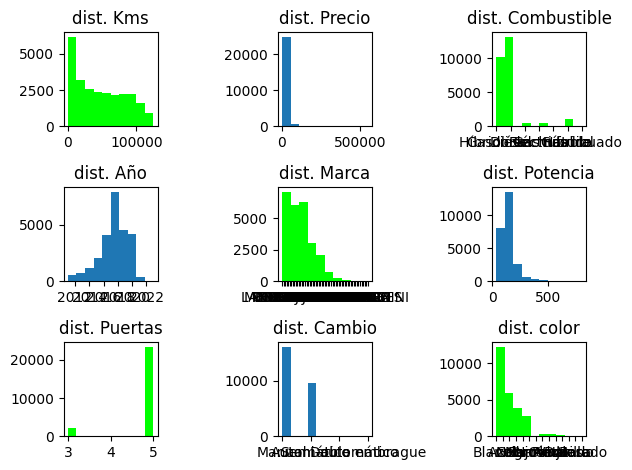

In [ ]:
# Presentamos las diferentes distribuciones de las columnas:
# Las columnas: Distribuidor, Modelo y Versión no las presentamos porque sus distribuciones no aportan información. Tienen casi un valor por cada coche.
import numpy as np
import matplotlib.pyplot as plt

fig, ((ax0, ax1, ax2), (ax3, ax4, ax5), (ax6, ax7, ax8)) = plt.subplots(nrows=3, ncols=3)
colors = ['lime'] # color que le vamos a poner a algunas gráficas.

# Cada uno de los gráficos con sus especificaciones:
ax0.hist(df['Kms'], color=colors), ax0.set_title('dist. Kms') # muestra el título
ax1.hist(df['Precio']), ax1.set_title('dist. Precio')
ax2.hist(df['Combustible'], color=colors), ax2.set_title('dist. Combustible')
ax3.hist(df['Año']), ax3.set_title('dist. Año')
ax4.hist(df['Marca'], color=colors), ax4.set_title('dist. Marca')
ax5.hist(df['Potencia']), ax5.set_title('dist. Potencia')
ax6.hist(df['Puertas'], color=colors), ax6.set_title('dist. Puertas')
ax7.hist(df['Cambio']), ax7.set_title('dist. Cambio')
ax8.hist(df['Color'], color=colors), ax8.set_title('dist. color')

fig.tight_layout()
plt.show()

Podemos ver, respecto a las distribuciones:
  - Marcas ----------> Se distribuyen según lo esperado, algunas marcas presentan frecuencias mucho más altas que otras. Notando que unas pocas casi ni aparecen respecto a las demás.
  - Precio ------------> Curiosamente, lo normal sería esperar unos precios muy dispares, pero observamos, que aún teniendo una distribución correcta, los valores de los precios se concentran en torno a 50.000 €. Sería interesante ver, en un gráfico con más detalle, como se distribuyen la mayoría de los precios, es decir, centrarnos en estos precios de entre 0 y 50.000 €.
  - Combustible --> En este caso vemos como la mayoría de los valores se centran en torno a dos tipos de combustible, podemos imaginar que se trata de gasolina y diésel.
  - Año ----------------> La distribución sigue lo esperado, los datos están correctos, se distribuyen entre 2012 y 2023. Principalmente tenemos coches de entre 2016 y 2020. Podemos verlo más claramente en los gráficos individuales, más abajo.

  Por tanto, mayormente, tenemos coches de 6 años aproximadamente. Perfecto.
  - Kms ---------------> Según el gráfico de kilómetros tenemos más de 6000 coches con 10.000 kms o menos, lo que son muy buenas noticias. Contamos con un amplio abánico de coches con pocos kilometros para ser de segunda mano.
  - Potencia --------> Respecto a esta variable, el gráfico miniatura no nos deja ver con claridad entre que valores de caballos (CV) se encuentran la mayoria de las ofertas de coches con las que contamos. Pero en el gráfico individual observamos como los CV con mayor frecuencia serian entre 90 y 150. Valores perfectamente adsequibles para propósito de este proyecto.
  - Puertas ---------> En este caso, contamos con una mayoría de coches con 5 puertas. En este punto del estudio, nos dimos cuenta de la existencia de valores con 2 y 4 puertas, y por este motivo procedimos a unificar estos valores con los de 3 y 5 puertas.
  - Cambio ---------> Lo esperado, contamos con coches tanto con cambio manual como automático. Contamos con casi el doble de coches con cambio manual (Unos 15.000 y 6.000 aproximadamente).
  - Color -------------> En este punto y gracias a la visualización de las distribuciones de los datos, apreciamos que existían una cantidad altísima de valores diferentes (más de 3500) y al analizar esto, vimos que se trataba de una columna muy sucia y procedimos a limpiarla y a catalogarla correctamente en 14 valores; 13 colores y "SinColor", tanto para los valores nulos como para aquellos que no podiamos saber su color.
  
      - Ahora, gráficamente podemos ver las distribuciones de los colores. Destacando el blanco, azul, gris y negro como colores predominantes, muy por encima de los demás.


---
---
  A continuación se muestran los gráficos individuales para apreciar estas percepciones.

## 4.1 DISTRIBUCIONES individuales:

<Axes: title={'center': 'Dist. Marca'}>

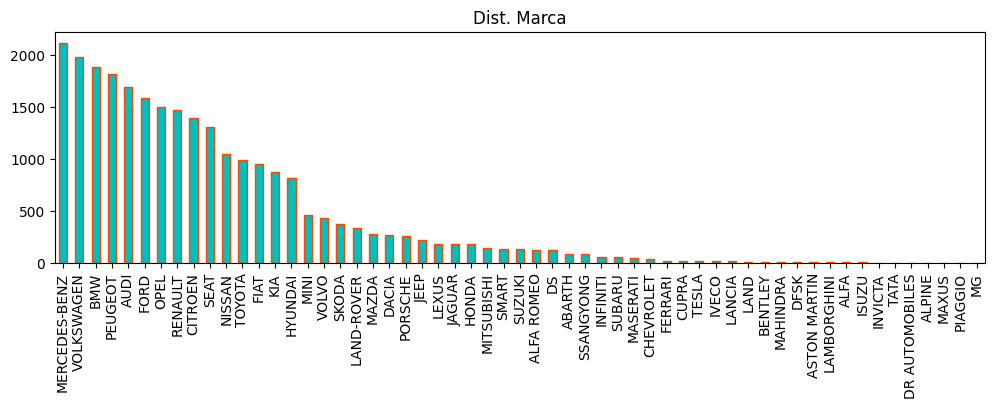

In [ ]:
# Distribución de Marcas por frecuencias:

df['Marca'].value_counts().plot(kind='bar', title= 'Dist. Marca', figsize=(12, 3), rot=90, color=('c'), edgecolor="orangered") # default aparece rotado.

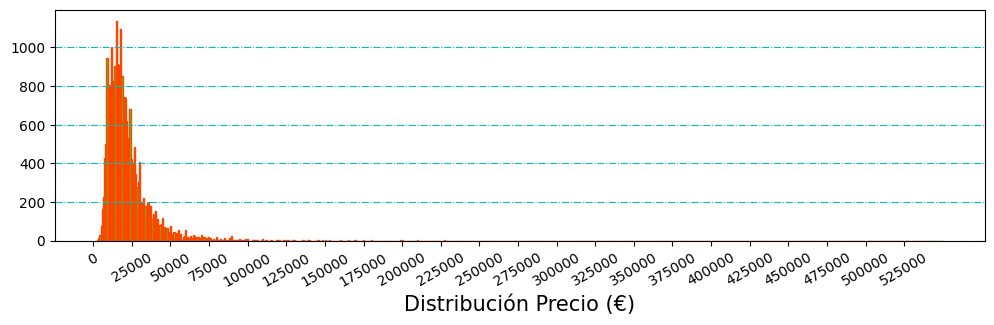

In [ ]:
# Distribución de Precio por frecuencias:

df['Precio'].hist(bins=(len(df['Precio'].unique())//4), color='lime', figsize=(12, 3), edgecolor ='orangered')
plt.xlabel("Distribución Precio (€)", fontsize=15)
plt.xticks(range(0, df['Precio'].max(), 25000))
plt.xticks(rotation= 30)
plt.grid(axis='y',linestyle='dashdot', color='c')
plt.grid(axis = 'x')

<Axes: title={'center': 'Dist. Combustible'}>

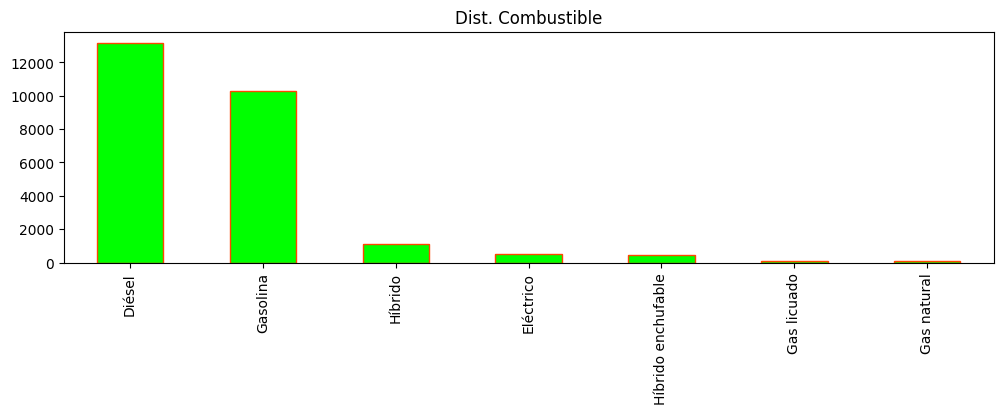

In [ ]:
# Distribución de Combustible por frecuencias:

df['Combustible'].value_counts().plot(kind='bar', title= 'Dist. Combustible', figsize=(12, 3), rot=90, color=('lime'), edgecolor="orangered")

<Axes: title={'center': 'Dist. Año'}>

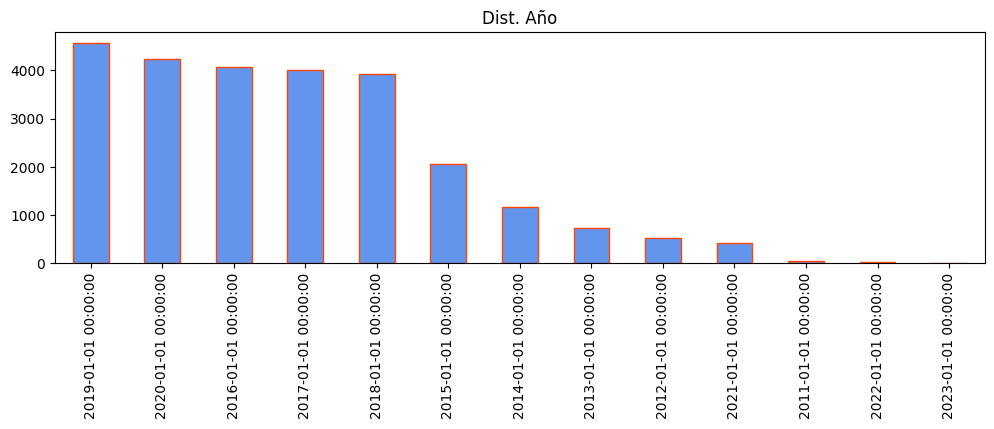

In [ ]:
# Distribución de Año por frecuencias:

df['Año'].value_counts().plot(kind='bar', title= 'Dist. Año', figsize=(12, 3), rot=90, color=('CornflowerBlue'), edgecolor="orangered")

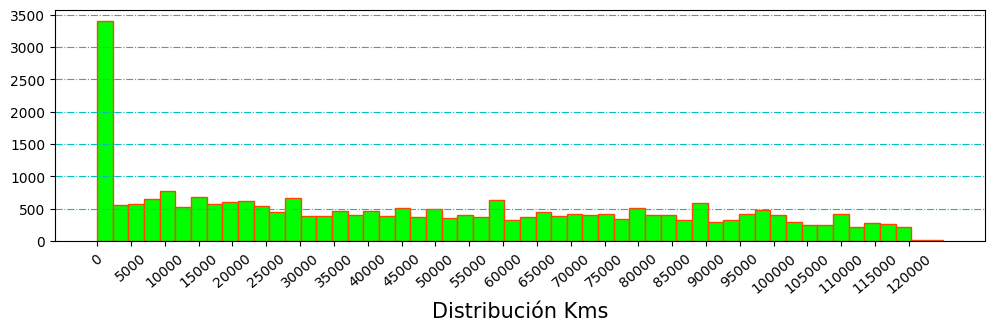

In [ ]:
# Distribución de Kms por frecuencias:

df['Kms'].hist(bins=(len(df['Kms'].unique())//200), color='lime', figsize=(12, 3), edgecolor ='orangered')
plt.xlabel("Distribución Kms", fontsize=15)
plt.xticks(range(0, int(df['Kms'].max()), 5000))
plt.xticks(rotation= 40)
plt.grid(axis='y',linestyle='dashdot', color='c')
plt.grid(axis = 'x')

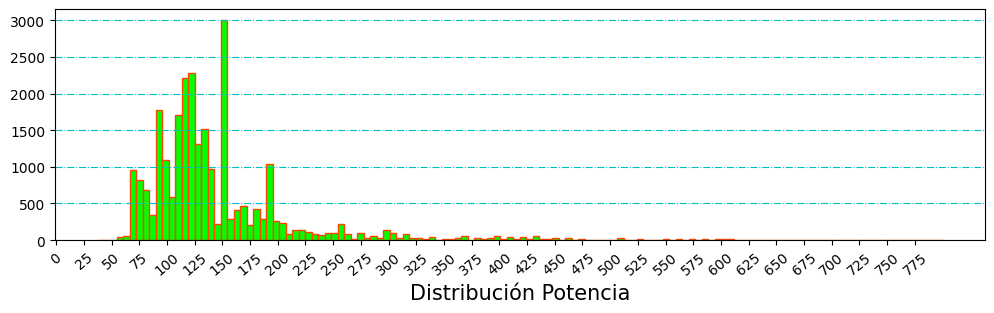

In [ ]:
# Distribución de Potencia por frecuencias:

df['Potencia'].hist(bins=(len(df['Potencia'].unique())//2), color='lime', figsize=(12, 3), edgecolor ='orangered')
plt.xlabel("Distribución Potencia", fontsize=15)
plt.xticks(range(0, int(df['Potencia'].max()), 25))
plt.xticks(rotation= 40)
plt.grid(axis='y',linestyle='dashdot', color='c')
plt.grid(axis = 'x')

<Axes: title={'center': 'Dist. Puertas'}>

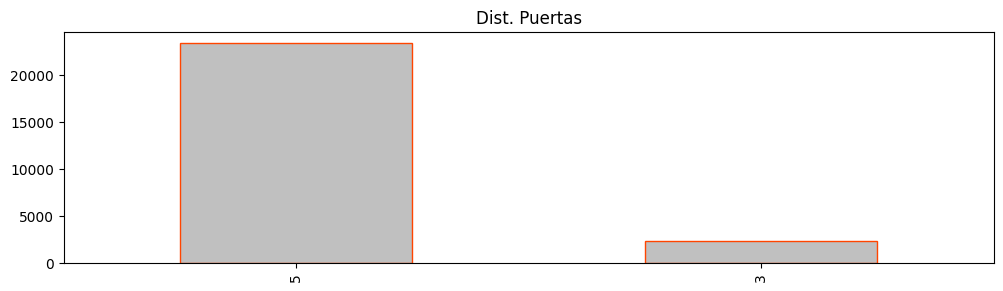

In [ ]:
# Distribución de Puertas por frecuencias:

df['Puertas'].value_counts().plot(kind='bar', title= 'Dist. Puertas', figsize=(12, 3), rot=90, color=('silver'), edgecolor="orangered")

<Axes: title={'center': 'Dist. Cambio'}>

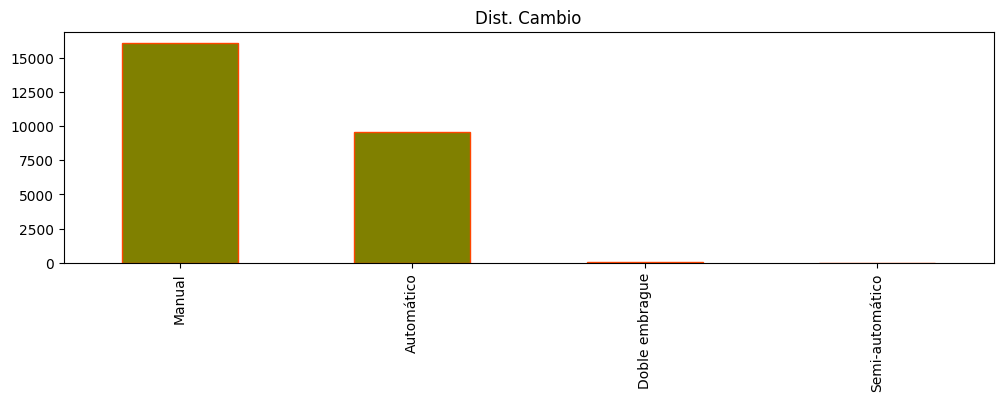

In [ ]:
# Distribución de Cambio por frecuencias:

df['Cambio'].value_counts().plot(kind='bar', title= 'Dist. Cambio', figsize=(12, 3), rot=90, color=('olive'), edgecolor="orangered")

<Axes: title={'center': 'Dist. Color'}>

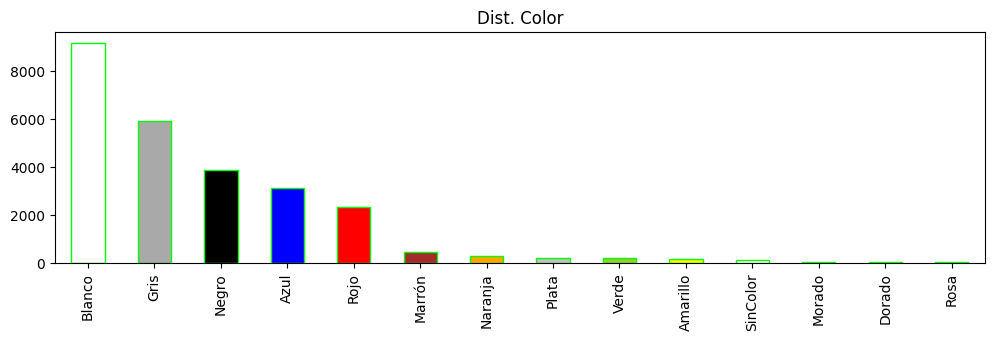

In [ ]:
# Distribución de Color por frecuencias:

df['Color'].value_counts().plot(kind='bar', title= 'Dist. Color', figsize=(12, 3), rot=90, color=(['white','#A9A9A9','black','b','red','brown','orange','silver','yellowgreen','yellow','white','#9467bd','#DAA520','pink']), edgecolor="lime")

Vemos como las columnas se distribuyen correctamente por lo que no hay errores.

## 4.2 CORRELACIONES:

Presentamos y visualizamos las correlaciones existentes para todas nuestras variables (numéricas).

---

Para el análisis de correlaciones, se deben de tener en cuenta la existencia de outliers que puedan distorsinar los resultados.

Solo eliminaremos los outliers, en principio, para el estudios de las correlaciones. No los eliminaremos del proyecto principal puesto que puede interesarnos alguno de estos valores.


### Outliers.

Vamos a buscar y analizar la presencia de outliers que puedan afectar a las correlaciones entre variables.

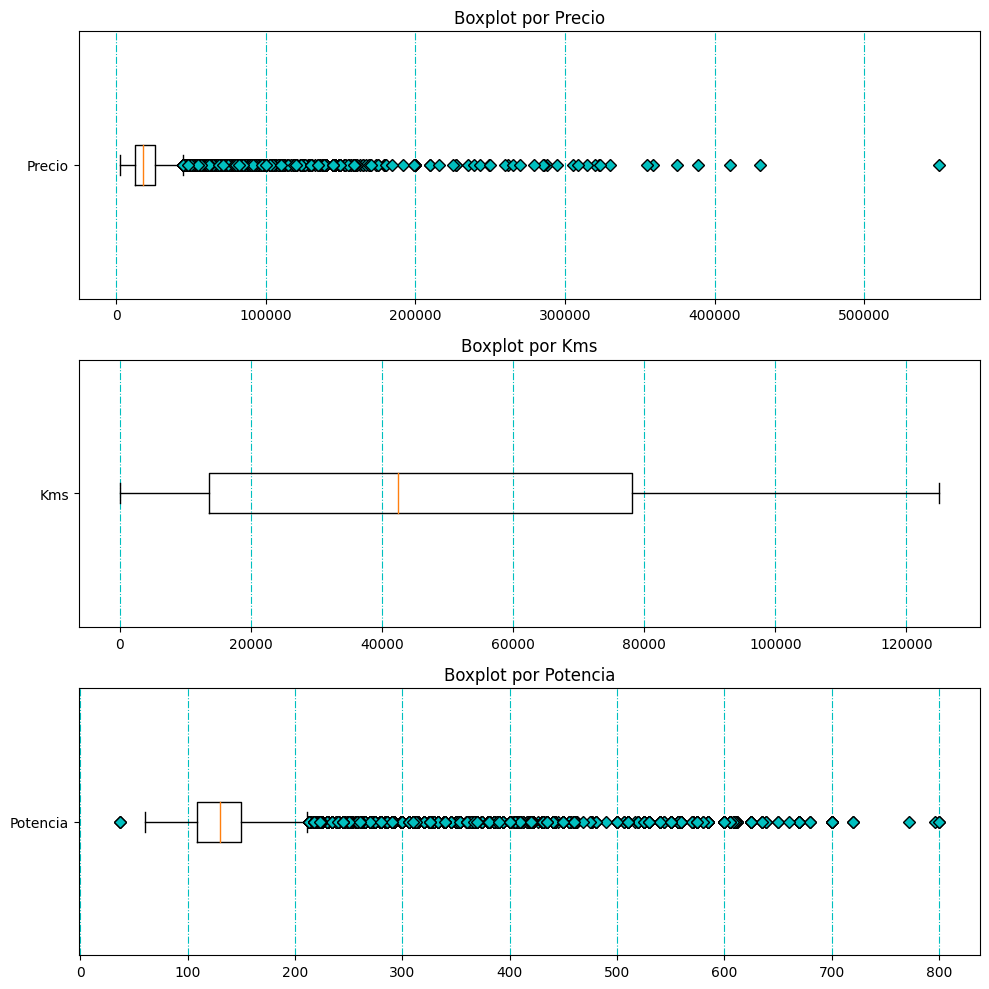

In [ ]:
# Presentamos como se distribuyen los datos para cada columna, pero esta vez mediante boxplot para visualizar la presencia de outliers:
# Solo las variables númericas tienen sentido en este proceso, las variables categóricas las trataremos despues.
# Mostraremos columnas: Precio, Año, Kms, Potencia.

import numpy as np
import matplotlib.pyplot as plt
color1 = dict(markerfacecolor='c', marker='D') # color que le vamos a poner a algunas gráficas.
color2 = dict(markerfacecolor='#ff7f0e', marker='o')

fig, ((ax0), (ax1), (ax2)) = plt.subplots(nrows=3, ncols=1, figsize = (10, 10))

# Cada uno de los gráficos con sus especificaciones:
ax0.boxplot(df['Precio'], flierprops=color1, labels=["Precio"], vert=False)
ax0.set_title('Boxplot por Precio') # muestra el título
ax0.grid(axis = 'x', linestyle='dashdot', color='c')

ax1.boxplot(df['Kms'], flierprops=color2, labels=["Kms"], vert=False)
ax1.set_title('Boxplot por Kms')
ax1.grid(axis = 'x', linestyle='dashdot', color='c')

ax2.boxplot(df['Potencia'], flierprops=color1, labels=["Potencia"], vert=False)
ax2.set_title('Boxplot por Potencia')
ax2.grid(axis = 'x', linestyle='dashdot', color='c')

fig.tight_layout()
plt.show()

Claramente podemos ver en qué variables existen valores atípicos, en "Precio" y "Potencia".

¿Estos valores aportan información? Si, por supuesto. Contienen coches con CVs y precios muy valiosos para nuestras conclusiones finales, es posible que incluyan coches muy interesantes para la empresa. Pero estos coches no nos dejan ver con claridad la relación entre las variables, las correlaciones y por tanto, vamos a eliminarlos temporalmente para quedarnos con el mayor porcentaje posible de información acerca de la relación entre las columnas.


#### IQR:
Índice intercuartílico.

Vamos a encontrar estos outliers y a eliminarlos temporalmente para el posterior análisis de correlaciones:

In [ ]:
# Encontrar los outliers:

# IQR = df["col"].quantile(0.75) - df["col"].quantile(0.25)
# Intervalo considerar outliers = [df["col"].median() - 1.5*IQR, df["col"].median() + 1.5*IQR]              ojo! que es mediana

df_out = df[['Precio', 'Kms', 'Potencia']]

# IQR:
lista_IQRs = []
for col in df_out.columns:
  lista_IQRs.append(df_out[col].quantile(0.75) - df_out[col].quantile(0.25)) # Rango intercuartílico IQR

intervalos = []
for i in range(len(lista_IQRs)):

  # nombre columna:
  print(f"Para col {(df_out.columns[i]).upper()}: ")

  # Mediana:
  mediana = df_out[df_out.columns[i]].median()
  print(f"Mediana: {mediana}")

 # IQR:
  print(f"IQR es: {lista_IQRs[i]}")

 # Intervalo:
  intervalos.append([df_out[df_out.columns[i]].median() - 1.5*lista_IQRs[i], df_out[df_out.columns[i]].median() + 1.5*lista_IQRs[i]])
  print(f"Intervalo para considerar outliers: {intervalos[i]}")

  print()



Para col PRECIO: 
Mediana: 17990.0
IQR es: 12780.0
Intervalo para considerar outliers: [-1180.0, 37160.0]

Para col KMS: 
Mediana: 42446.5
IQR es: 64520.25
Intervalo para considerar outliers: [-54333.875, 139226.875]

Para col POTENCIA: 
Mediana: 130.0
IQR es: 41.0
Intervalo para considerar outliers: [68.5, 191.5]



In [ ]:
df_out.shape

(25734, 3)

#### Drop outliers:

In [ ]:
# Eliminamos valores fuera del intervalo, son considerados outliers.

# Límites:
# lim_inf = df_out.loc[df_out["Precio"] <= intervalos[0][0]]
# lim_sup = df_out.loc[df_out["Precio"] >= intervalos[0][1]]

for i in range(len(df_out.columns)):
  df_out.drop(df_out.loc[df_out[df_out.columns[i]] <= intervalos[i][0]].index , inplace=True) # eliminamos menores a intervalo.
  df_out.drop(df_out.loc[df_out[df_out.columns[i]] >= intervalos[i][1]].index , inplace=True) # eliminamos mayores a intervalo.


<ipython-input-84-38bcaec91eb3>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_out.drop(df_out.loc[df_out[df_out.columns[i]] <= intervalos[i][0]].index , inplace=True) # eliminamos menores a intervalo.
<ipython-input-84-38bcaec91eb3>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_out.drop(df_out.loc[df_out[df_out.columns[i]] >= intervalos[i][1]].index , inplace=True) # eliminamos mayores a intervalo.
<ipython-input-84-38bcaec91eb3>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/us

In [ ]:
# Comprobamos: Hemos eliminado cerca de 5 mil coches con datos outliers.

df_out.shape

(21623, 3)

### df_temp --> Sin outliers

Una vez con las columnas cuantitativas limpias de outliers, vamos a crear un dataframe con estas y las cualitativas.

Para analizar las correlaciones (añadimos las cualitativas porque algunas podremos transformarlas y analizar sus correlaciones.)

In [ ]:
# Importante, porque si hacemos cambios en df_temp también afectarán a df original. Llaman al mismo espacio en memoria si no usamos copy()
df_temp = df.copy() #IMPORTANTE EL .COPY() para llamar a otro espacio de memoria.

In [ ]:
df_temp.head(5)

Marca           Modelo  \
0     CITROEN               C1   
1        FORD  Transit Connect   
2        FORD          Transit   
3     PEUGEOT             3008   
4  LAND-ROVER  Discovery Sport   

                                             Version  Precio Combustible  \
0             CITROEN C1 PureTech 60KW 82CV Feel 5p.    6200    Gasolina   
1  FORD Transit Connect Van 1.5 TDCi 100cv Ambien...    7851      Diésel   
2  FORD Transit 350 96kW L4 Ambiente Propulsion T...   22850      Diésel   
3         PEUGEOT 3008 Style 1.2 PureTech 130 SS 5p.   11490    Gasolina   
4  LAND-ROVER Discovery Sport 2.0L TD4 110kW 150C...   28500      Diésel   

         Año       Kms  Potencia Puertas      Cambio   Color  \
0 2017-01-01   50071.0        82       5      Manual  Blanco   
1 2016-01-01  103000.0       100       5      Manual  Blanco   
2 2017-01-01  107000.0       130       3      Manual  Blanco   
3 2016-01-01   78665.0       130       5      Manual  Blanco   
4 2017-01-01   36238.0       150       5  Automático  Blanco   

           Distribuidor  
0         Autos Raymara  
1               Auto 96  
2  Autofleet España,s.l  
3        Flexicar Rivas  
4               OK Cars

In [ ]:
# Intercambiamos columnas del df original con las de sin outliers :

for col in df_temp.columns:
  if col in df_out.columns:
    df_temp[col] = df_out[col]

In [ ]:
# Comprobamos como las filas outliers aparecen como nulos en las columnas del df original.

df_temp.isnull().sum()

Marca              0
Modelo             0
Version            0
Precio          4111
Combustible        0
Año                0
Kms             4111
Potencia        4111
Puertas            0
Cambio             0
Color              0
Distribuidor       0
dtype: int64

In [ ]:
# Eliminamos filas que son outliers (ahora aparecen como "nan") en todo el df_temp:

df_temp.dropna(inplace = True)

In [ ]:
# Comprobamos como tenemos ya el df_temp limpio de nan y por tanto de filas outliers.

df_temp.isnull().sum()

Marca           0
Modelo          0
Version         0
Precio          0
Combustible     0
Año             0
Kms             0
Potencia        0
Puertas         0
Cambio          0
Color           0
Distribuidor    0
dtype: int64

In [ ]:
# Observamos los estádisticos principales y comprobamos como los límites de las variables coinciden con la eliminación de outliers.
df_temp.describe()

Precio           Kms    Potencia
count  21623.000000       21623.0     21623.0
mean   17499.984045  48579.580216  123.229663
std     6878.862528  36193.608705   29.687251
min     2500.000000           0.0        69.0
25%    11999.000000       15497.5       100.0
50%    16599.000000       45000.0       120.0
75%    21900.000000       79525.5       145.0
max    37100.000000      124969.0       190.0

Ya tenemos un dataframe limpio de outliers. Podemos realizar el análisis de correlaciones.

In [ ]:
df_temp.head()

Marca           Modelo  \
0     CITROEN               C1   
1        FORD  Transit Connect   
2        FORD          Transit   
3     PEUGEOT             3008   
4  LAND-ROVER  Discovery Sport   

                                             Version   Precio Combustible  \
0             CITROEN C1 PureTech 60KW 82CV Feel 5p.   6200.0    Gasolina   
1  FORD Transit Connect Van 1.5 TDCi 100cv Ambien...   7851.0      Diésel   
2  FORD Transit 350 96kW L4 Ambiente Propulsion T...  22850.0      Diésel   
3         PEUGEOT 3008 Style 1.2 PureTech 130 SS 5p.  11490.0    Gasolina   
4  LAND-ROVER Discovery Sport 2.0L TD4 110kW 150C...  28500.0      Diésel   

         Año       Kms  Potencia Puertas      Cambio   Color  \
0 2017-01-01   50071.0        82       5      Manual  Blanco   
1 2016-01-01  103000.0       100       5      Manual  Blanco   
2 2017-01-01  107000.0       130       3      Manual  Blanco   
3 2016-01-01   78665.0       130       5      Manual  Blanco   
4 2017-01-01   36238.0       150       5  Automático  Blanco   

           Distribuidor  
0         Autos Raymara  
1               Auto 96  
2  Autofleet España,s.l  
3        Flexicar Rivas  
4               OK Cars

In [ ]:
df_temp.corr()

<ipython-input-94-10b2e6a27452>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_temp.corr()


Precio       Kms  Potencia
Precio    1.000000 -0.387299  0.675415
Kms      -0.387299  1.000000  0.077610
Potencia  0.675415  0.077610  1.000000

In [ ]:
# Calculamos las correlaciones de todas las columnas. (df_temp.corr())
co = df_temp.corr()
co.style.background_gradient(cmap='coolwarm')

<ipython-input-95-bfadc280768b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  co = df_temp.corr()


Concluiones:

1. Observamos como la variable "Kms" presenta una correlación negativa respecto de "Precio", lo cual era de esperar, pero sin embargo nos indica que, con un valor de -0.38, la relación entre las variables, aparte de ser negativa, no es excesivamente alta. Realmente no es una relación significativa.

  La lógica nos dice que debería de estar más relacionadas, pero los kilometros no es la única variable que influye a la hora fijar un precio.

2.   "Precio" y "Potencia" tienen una correlación de 0.67, ligeramente alta lo que índica que el precio de un coche se ve influenciado de manera significativa por la potencia de este.



array([[<Axes: xlabel='Precio', ylabel='Precio'>,
        <Axes: xlabel='Kms', ylabel='Precio'>,
        <Axes: xlabel='Potencia', ylabel='Precio'>],
       [<Axes: xlabel='Precio', ylabel='Kms'>,
        <Axes: xlabel='Kms', ylabel='Kms'>,
        <Axes: xlabel='Potencia', ylabel='Kms'>],
       [<Axes: xlabel='Precio', ylabel='Potencia'>,
        <Axes: xlabel='Kms', ylabel='Potencia'>,
        <Axes: xlabel='Potencia', ylabel='Potencia'>]], dtype=object)

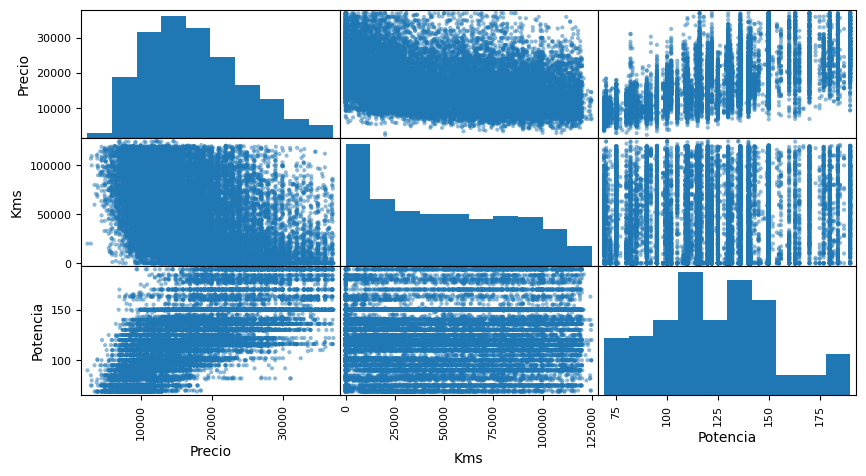

In [ ]:
# Veamos ahora las dispersiones: buscando y comprobando las tendencias lineales y por tanto las correlaciones que percibiamos anteriormente.

pd.plotting.scatter_matrix(df_temp, alpha=0.5, figsize=(10, 5))

In [ ]:
# Podemos ver la dispersión de alguna variable en concreto respecto de otra. para comprobar si sigue una tendencia lineal y por tanto correlación.

# df_temp.plot.scatter("Precio","Kms")

### ---> Correlaciones con categóricas:

Podemos realizar un estudio de correlaciones tambien con algunas columnas que son categóricas, como "Puertas" con dos valores.

Vamos a convertir en dummies las variables o columnas "Puertas", "Cambio", "Combustible" y "Color" para poder analizarlas respecto a "Precio".
Para la variable "Año" utilizaremos el metodo para convertir variables categóricas ordinales (que representan un orden y este es importante) y poder analizarla también respecto al precio.



In [ ]:
df['Año'].min()

Timestamp('2011-01-01 00:00:00')

In [ ]:
# Variables dummies:

dum_cambio = pd.get_dummies(df_temp["Cambio"])
dum_puertas = pd.get_dummies(df_temp["Puertas"])
dum_combustible = pd.get_dummies(df_temp["Combustible"])
dum_color = pd.get_dummies(df_temp["Color"])


# Variable ordinal, "Año":

from sklearn.preprocessing import OrdinalEncoder

  # Creamos el codificador indicandole el orden de los valores de Año:
encoder = OrdinalEncoder(categories=[["2011-01-01","2012-01-01","2013-01-01","2014-01-01","2015-01-01","2016-01-01",
                                      "2017-01-01","2018-01-01","2019-01-01","2020-01-01","2021-01-01","2022-01-01",
                                      "2023-01-01"]])

  # Ajustamos el codificador con la variable Año y la transformamos
encoder.fit(df_temp[["Año"]])
df_temp["Años"] = encoder.transform(df_temp[["Año"]]) # la hemos llamado 'Años' con S.

<ipython-input-99-eb66836c7e4b>:4: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  dum_puertas = pd.get_dummies(df_temp["Puertas"])


In [ ]:
df_temp['Años'].head(3) # Más alto, es mejor. 2023, menos años tiene el coche.

0    6.0
1    5.0
2    6.0
Name: Años, dtype: float64

In [ ]:
# quitamos de df_temp la columna AÑO porque ya tenemos la columna AÑOS que es la que hemos convertido.
df_temp.drop(['Año'], axis=1, inplace=True)
df_dum = pd.concat([df_temp, dum_cambio, dum_puertas, dum_combustible, dum_color], axis = 1)

In [ ]:
# Aumentamos al máximo el número de columnas que se pueden mostrar por pantalla
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

df_dum.head(2)

Marca           Modelo  \
0  CITROEN               C1   
1     FORD  Transit Connect   

                                             Version  Precio Combustible  \
0             CITROEN C1 PureTech 60KW 82CV Feel 5p.  6200.0    Gasolina   
1  FORD Transit Connect Van 1.5 TDCi 100cv Ambien...  7851.0      Diésel   

        Kms  Potencia Puertas  Cambio   Color   Distribuidor  Años  \
0   50071.0        82       5  Manual  Blanco  Autos Raymara   6.0   
1  103000.0       100       5  Manual  Blanco        Auto 96   5.0   

   Automático  Doble embrague  Manual  Semi-automático  3  5  Diésel  \
0           0               0       1                0  0  1       0   
1           0               0       1                0  0  1       1   

   Eléctrico  Gas licuado  Gas natural  Gasolina  Híbrido  Híbrido enchufable  \
0          0            0            0         1        0                   0   
1          0            0            0         0        0                   0   

   Amarillo  Azul  Blanco  Dorado  Gris  Marrón  Morado  Naranja  Negro  \
0         0     0       1       0     0       0       0        0      0   
1         0     0       1       0     0       0       0        0      0   

   Plata  Rojo  Rosa  SinColor  Verde  
0      0     0     0         0      0  
1      0     0     0         0      0

In [ ]:
# Columna "Años" ahora es categórica ordinal, con valores de 0 a 12. siendo 12 mejor porque es 2023

df_dum['Años'].describe()

count    21623.000000
mean         6.347778
std          2.056220
min          0.000000
25%          5.000000
50%          7.000000
75%          8.000000
max         12.000000
Name: Años, dtype: float64

In [ ]:
# co = df_dum.corr()
# co.style.background_gradient(cmap='coolwarm')

<ipython-input-105-366861950c0f>:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlacion = df_dum.corr()


<Axes: >

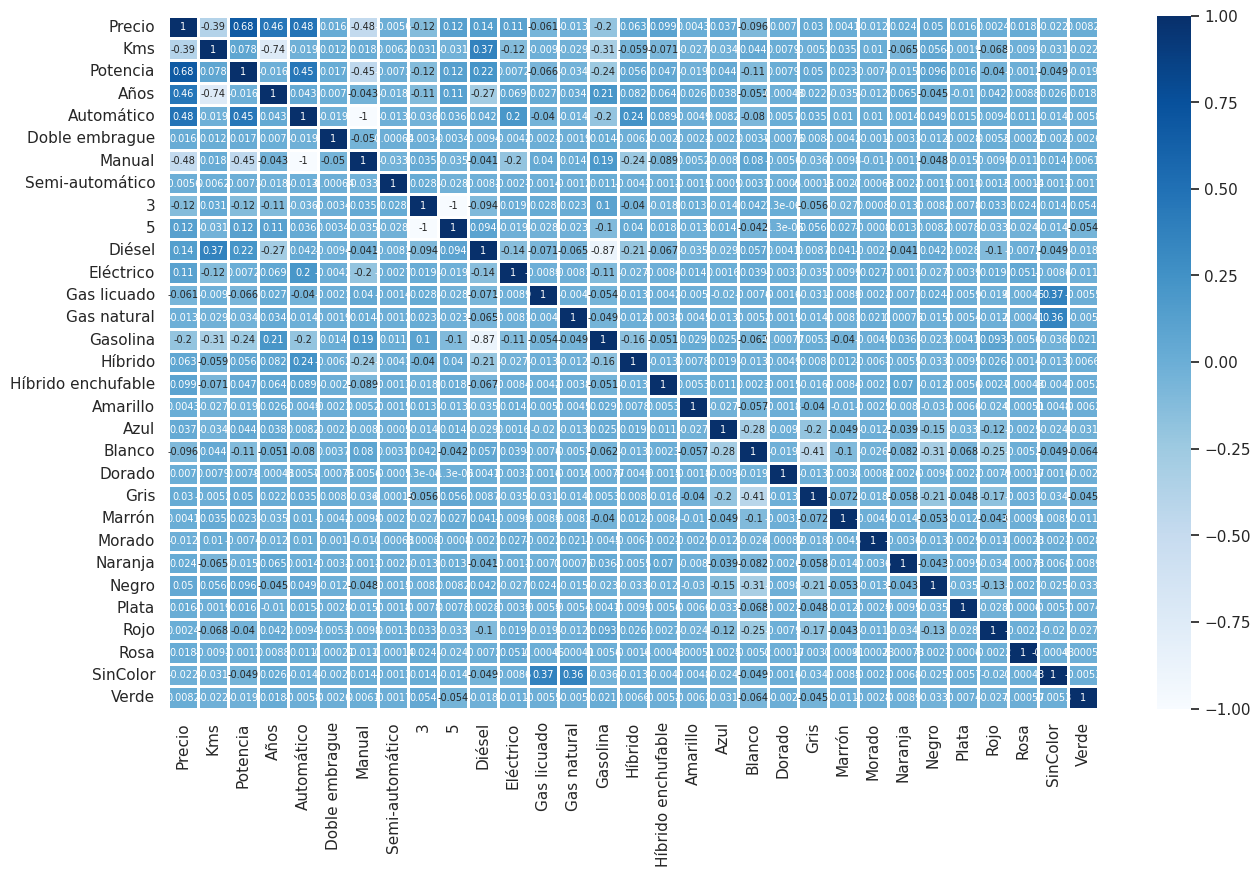

In [ ]:
# Visualizamos correlaciones con Matriz de correlaciones:

# Ojo porque "Años" ahora tiene valores entre 0 y 12.

import numpy as np
import seaborn as sns

correlacion = df_dum.corr()

sns.set(rc = {'figure.figsize':(15,9)})      # tamaño gráfico
sns.heatmap(correlacion,                      # datos
            # square = True,                    # forma de correlaciones
            linewidths = 0.75,                # tamaño linea separación correlaciones
            linecolor = "white",              # color linea separación correlaciones
            annot = True,                     # mostrar correlaciones
            annot_kws = {'size': 7},          # tamaño números correlaciones
            cmap = "Blues"
            )

De este gráfico, que realmente no aporta demasiada información útil, considerando la cantidad de variables que analiza, podemos sacar que respecto al precio, las variables que más influyen son, en orden de mayor a menor relación:
- La potencia del coche, en caballos (CV). A mayor potencia, los coches tienen mayor precio;
- El tipo de cambio ("automático" se relaciona con precios más altos);
- Los años, algo lógico, cuanto menos años tenga el coche, más caro es;
- y por último, los kilómetros del coche (coches con menor cantidad de kilómetros son más caros, y al contrario).

Pero todo esto lo vamos a ver mejor, sacando las correlaciones más altas, tanto positivas como negativas:

### ---> Correlaciones más significativas:

In [ ]:
# Mostramos correlaciones más interesantes respecto de "Precio":
# "Precio" respecto de: "Potencia", "Cambio" y "Kms".

print("Mayores CORRELACIONES POSITIVAS respecto de \"PRECIO\":")
print()
print(df_dum.corr()['Precio'].sort_values(ascending=False).head(5))
print()
print("Mayores CORRELACIONES NEGATIVAS respecto de \"PRECIO\":")
print()
print(df_dum.corr()['Precio'].sort_values().head(5))

Mayores CORRELACIONES POSITIVAS respecto de "PRECIO":

Precio        1.000000
Potencia      0.675415
Automático    0.480014
Años          0.456050
Diésel        0.139131
Name: Precio, dtype: float64

Mayores CORRELACIONES NEGATIVAS respecto de "PRECIO":

Manual     -0.480167
Kms        -0.387299
Gasolina   -0.197468
3          -0.120242
Blanco     -0.095907
Name: Precio, dtype: float64


<ipython-input-106-160cce94ce1b>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df_dum.corr()['Precio'].sort_values(ascending=False).head(5))
<ipython-input-106-160cce94ce1b>:10: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df_dum.corr()['Precio'].sort_values().head(5))


In [ ]:
# pd.plotting.scatter_matrix(df_temp["Precio"], df_temp["Kms"],  df_temp["Kms"], df_temp["Kms"], alpha=0.5, figsize=(10, 5))

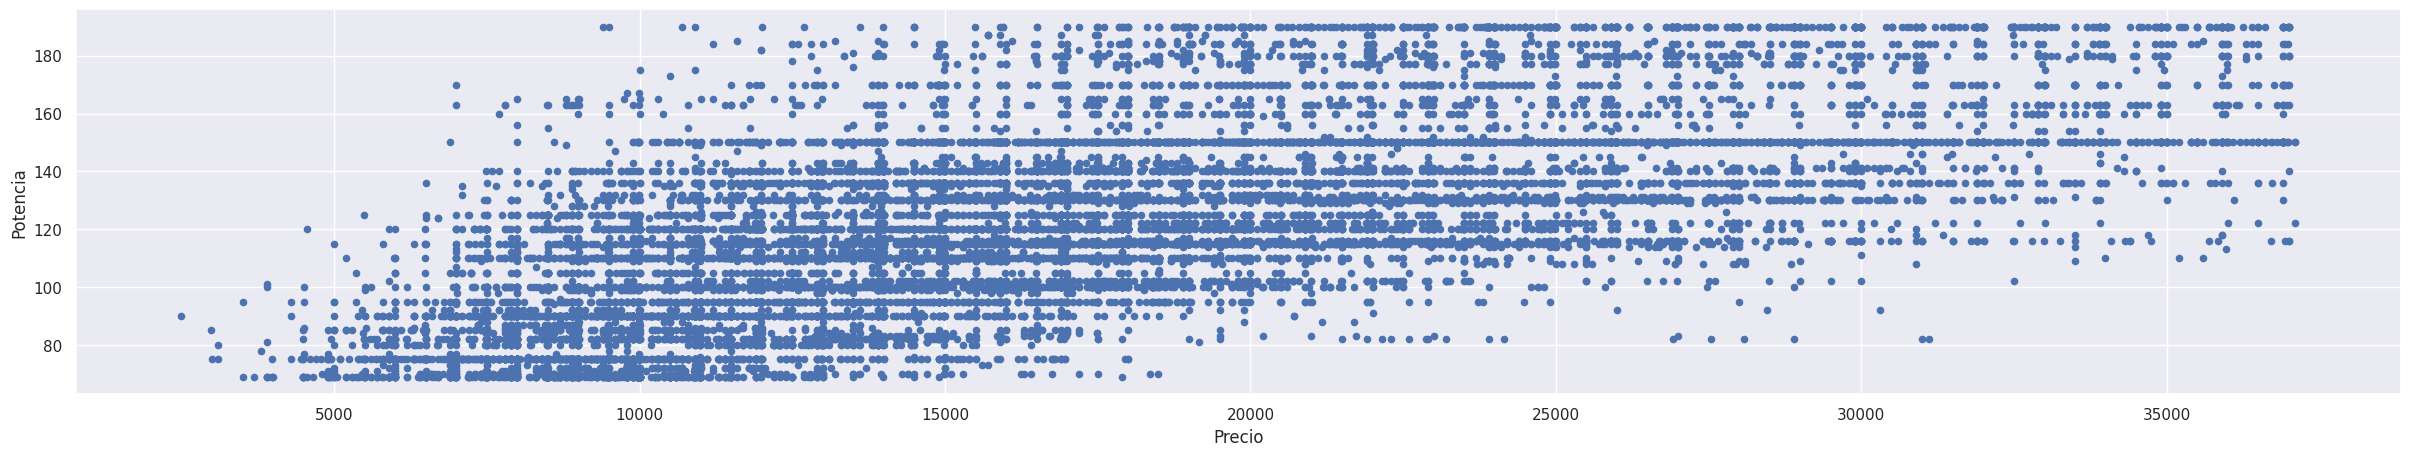

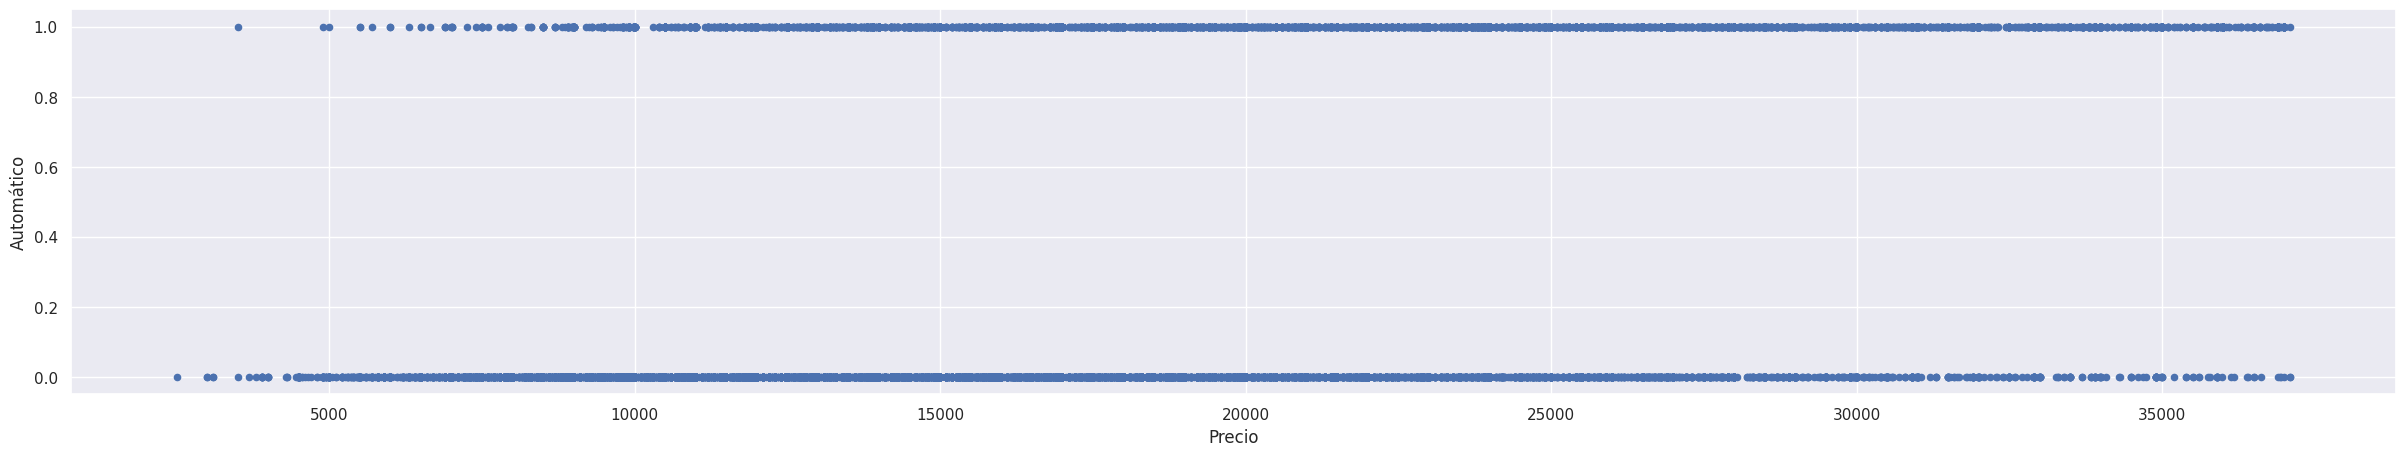

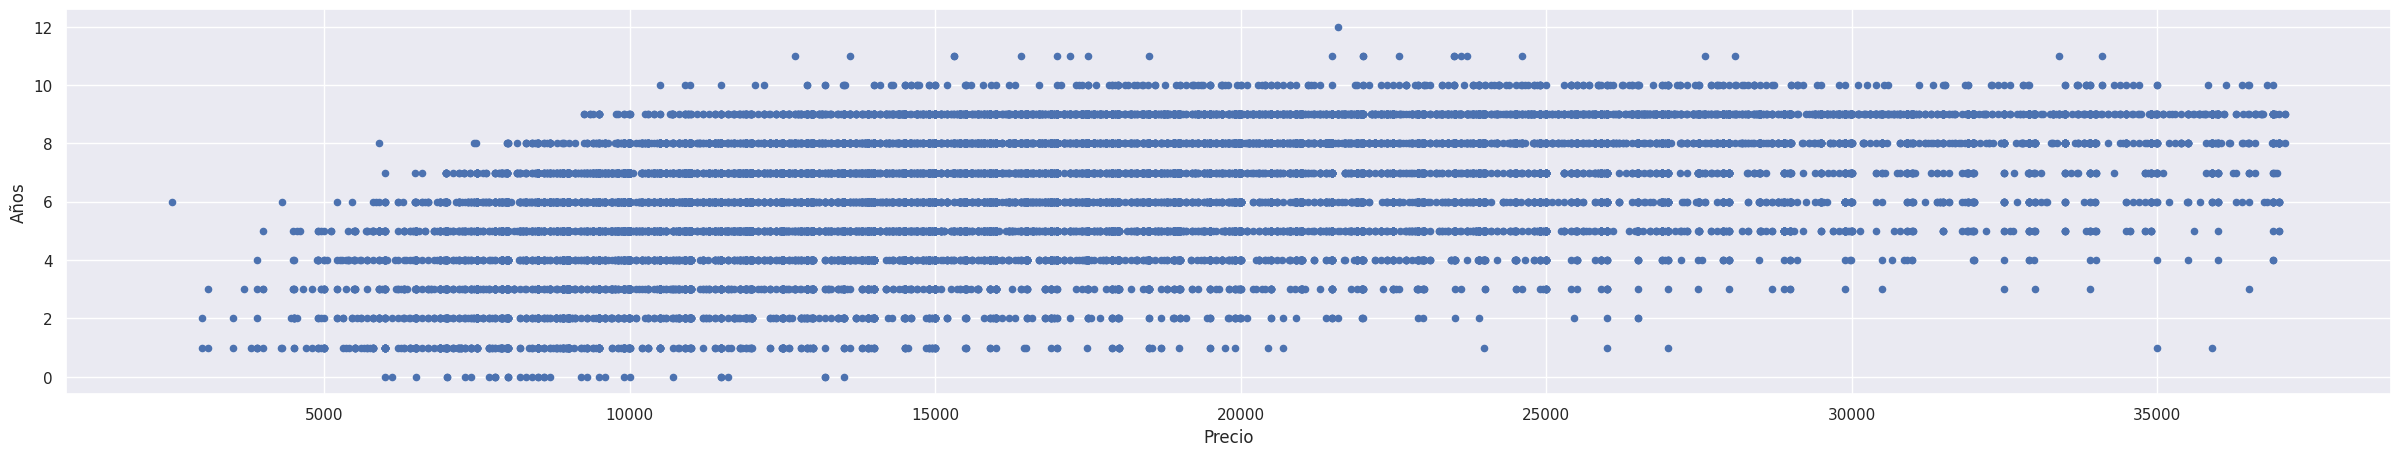

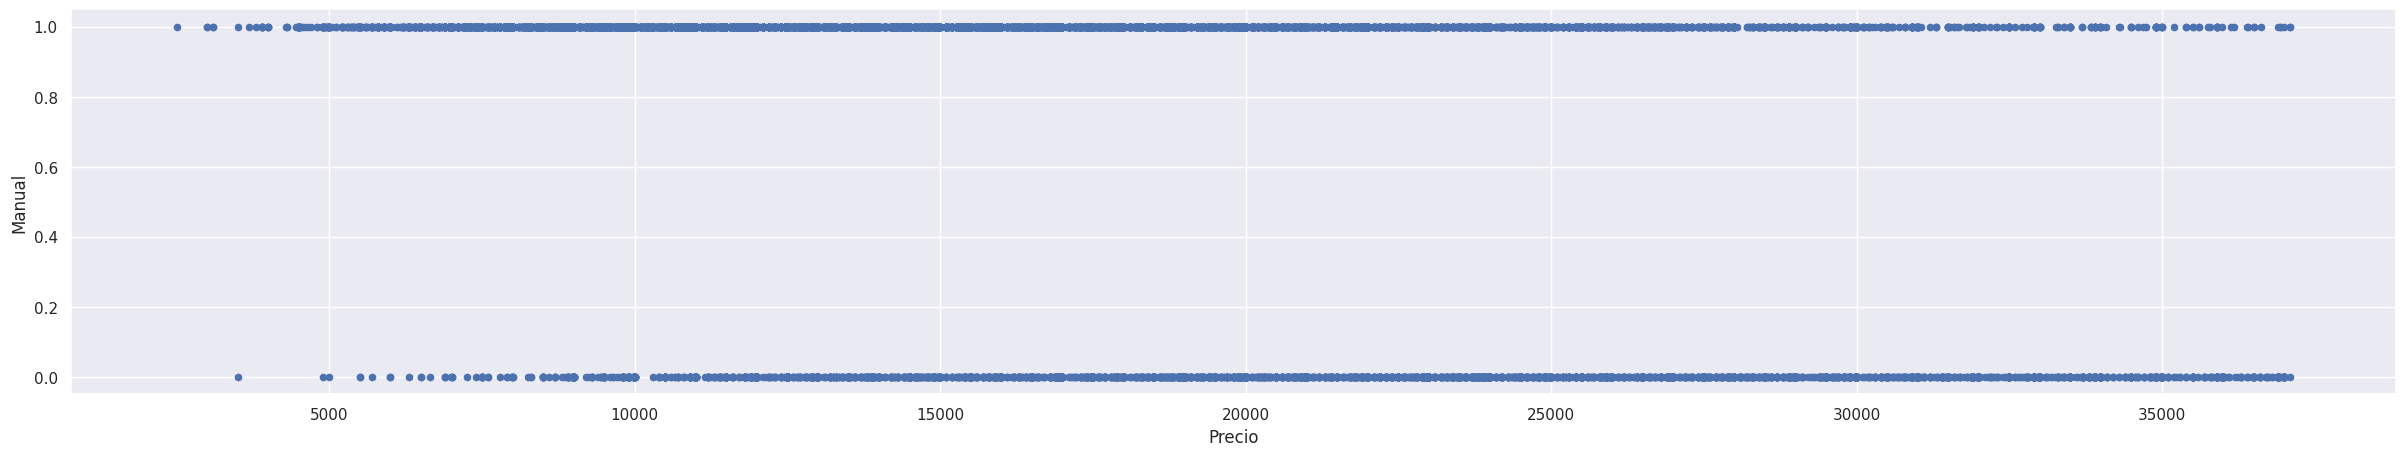

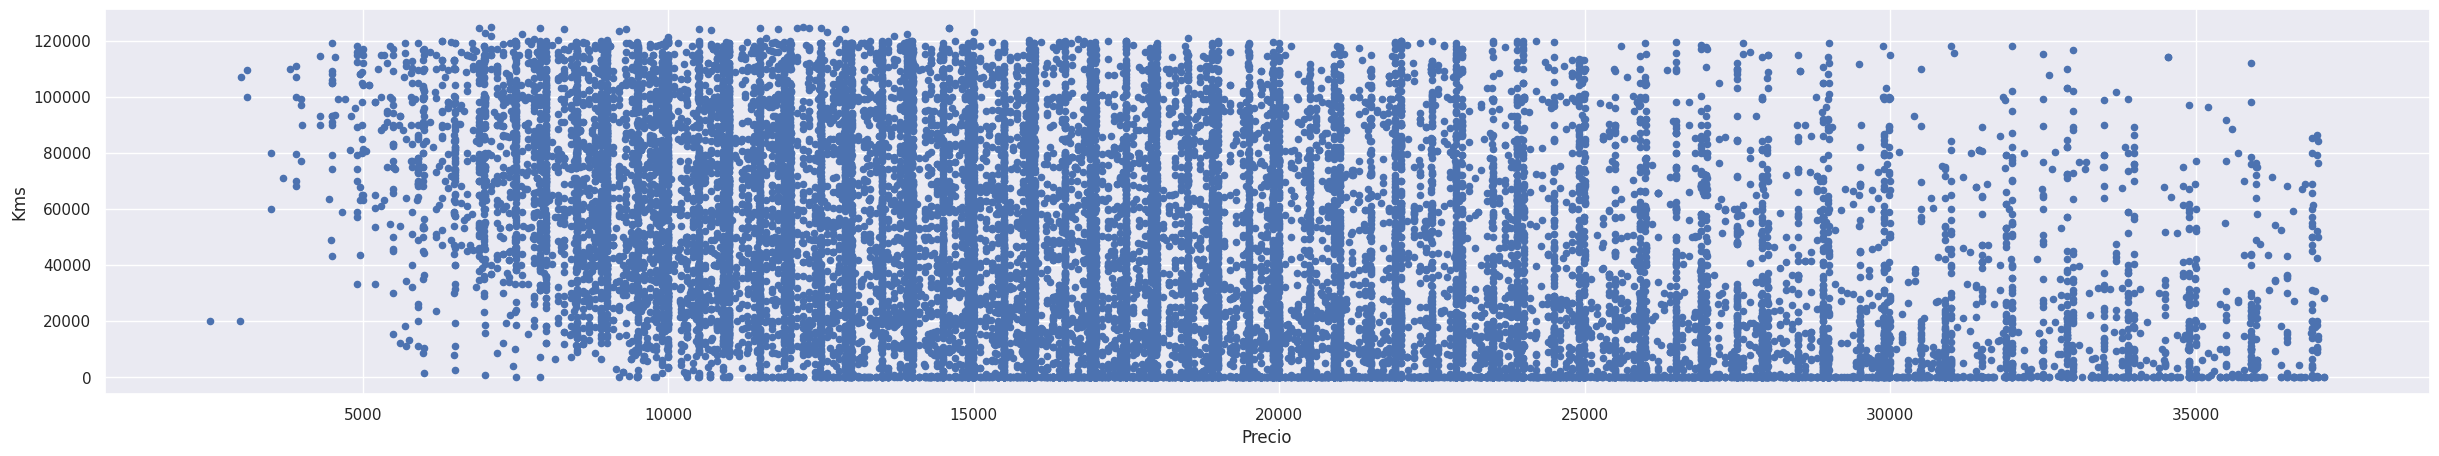

In [ ]:
# Mostramos las gráficas de dispersión de estas variables relacionadas con el precio, para visualizar que efectivamente
# siguen una tendencia lineal.
# Creamos un bucle para mostrar cada una respecto al precio.

lista_var = ['Precio', 'Potencia', 'Automático', 'Años', 'Manual', 'Kms']

for i in range(len(lista_var)-1):
  df_dum.plot.scatter(lista_var[0],lista_var[i+1], figsize = (30,5))

---
---
# 5 . PREGUNTAS Análisis Datos:

Una vez realizado un estudio, de los datos con los que contamos para nuestro proyecto de análisis, vamos a ver una serie de preguntas interesantes y sus respuestas:

---


Hemos realizado una consulta a nuestro cliente, Europicar (una empresa británica que se dedica al renting de coches), para que nos dijera más concretamente que es lo que necesitaba saber con nuestro estudio.

Además de las preguntas que nos ha proporciono el cliente, hemos planteado otras que consideramos interesantes y que puede aportar más información útil a Europicar.



## 5.1 Preguntas Extra:
Hemos desarrollado una serie de preguntas:

1. ¿Con cuántos coches contamos?
2. ¿Qué colores de coches tenemos?
3. ¿Más o menos que precios tienen los coches?
4. ¿Son antiguos los coches?
5. ¿Las marcas más baratas de coches, cuáles son?
6. ¿Y las marcas más baratas respecto a gasolina y diésel?
7. ¿Y las marcas más baratas respecto de la potencia. y de la potencia y el combustible?
8. ¿Influye el color del coche en el precio de este?
9. ¿Cuál es el ranking de los coches más caros?
10. ¿Y un ranking con los más baratos?
11. ¿Rankings anteriores, más caros y más baratos, pero con los más nuevos?
12. ¿Y un ranking con los mejores coches?
13. ¿Cuáles son los mejores coches de cada marca?

----

Respuestas:

In [ ]:
# definimos nuestra localización para dar formato a los números según esta. (separador de miles y decimales)
import locale

ubicacion = locale.getlocale()                                                  # obtenemos el código del país
locale.setlocale(locale.LC_ALL, ubicacion)                                      # establecemos la ubicación
# variable = '{:,d}'.format(valor)                                              # formato según la ubicación obtenida
# resultado => 1,200 (en caso de es_ES, definido a España)

'en_US.UTF-8'

---

#### 1 . ¿Con cuántos coches contamos?

In [ ]:
# ¿Con cuántos coches contamos?
print(f"Contamos con {'{:,d}'.format(len(df))} ofertas de coches de segunda mano.")

Contamos con 25,734 ofertas de coches de segunda mano.


---

#### 2 . ¿Qué colores de coches tenemos?

In [ ]:
# ¿Qué colores de coches tenemos?
print(f"Los coches de las ofertas son de {df['Color'].nunique()} colores diferentes en total.")
lista_colores = [df["Color"].unique()[i] for i in range(len(df["Color"].unique()))]

print("Los colores son: ")
print(lista_colores)

Los coches de las ofertas son de 14 colores diferentes en total.
Los colores son: 
['Blanco', 'Azul', 'Gris', 'Negro', 'Rojo', 'Marrón', 'SinColor', 'Naranja', 'Plata', 'Verde', 'Amarillo', 'Dorado', 'Rosa', 'Morado']


---

#### 3 . ¿Más o menos que precios tienen los coches?

In [ ]:
# ¿Más o menos que precios tienen los coches?

print(f"Los precios de los coches oscilan entre los {'{:,d}'.format(df['Precio'].max())} € y los {'{:,d}'.format(df['Precio'].min())} €.")
print(f"Siendo la media de precios de {'{:,g}'.format((df['Precio'].mean()))} €.") # g para formato con float
print(f"Además, el 50% central de los precios se situa entre {'{:,g}'.format(df['Precio'].quantile(0.25))} € y {'{:,g}'.format(df['Precio'].quantile(0.75))} €.")
print(f"Y el 90% de los precios son inferiores a {'{:,g}'.format(df['Precio'].quantile(0.90))} €.")

Los precios de los coches oscilan entre los 549,900 € y los 2,500 €.
Siendo la media de precios de 22,217.6 €.
Además, el 50% central de los precios se situa entre 12,900 € y 25,680 €.
Y el 90% de los precios son inferiores a 36,950 €.


---

#### 4 . ¿Son muy antiguos los coches?

In [ ]:
# ¿Son muy antiguos los coches?

print(f"Los años de los coches van desde {str(df['Año'].min())[:4]} y {str(df['Año'].max())[:4]}. \
Por tanto, todos tienen entre {2023-(int(str(df['Año'].max())[:4]))} y {2023-(int(str(df['Año'].min())[:4]))} años.")

print(f"De media, los coches tienen {2023-(int(str(df['Año'].mean())[:4]))} años, se situan entorno a {str(df['Año'].mean())[:4]}.")

print(f"El 75% de los coches son del {str(df['Año'].quantile(0.25))[:4]} \
para arriba. Tienen menos de {2023 - (int(str(df['Año'].quantile(0.25))[:4]))} años.")

print(f"Concretando más, el 50% y el 25% de los coches más jovenes son de entre {str(df['Año'].quantile(0.5))[:4]} y {str(df['Año'].quantile(0.99))[:4]}; y \
de entre {str(df['Año'].quantile(0.75))[:4]} y {str(df['Año'].quantile(0.99))[:4]}, respectivamente. \
\nPor lo que tienen entre {2023-(int(str(df['Año'].quantile(0.75))[:4]))} y {2023 - (int(str(df['Año'].quantile(0.25))[:4]))} años y entre \
{2023-(int(str(df['Año'].quantile(0.999))[:4]))} y {2023 - (int(str(df['Año'].quantile(0.75))[:4]))} años, respectivamente.")

print()
print(f"Finalmente podemos concluir que contamos con una flota de ofertas de coches muy jovenes, con menos de {2023-(int(str(df['Año'].quantile(0.25))[:4]))} años en su gran mayoría.")

Los años de los coches van desde 2011 y 2023. Por tanto, todos tienen entre 0 y 12 años.
De media, los coches tienen 6 años, se situan entorno a 2017.
El 75% de los coches son del 2016 para arriba. Tienen menos de 7 años.
Concretando más, el 50% y el 25% de los coches más jovenes son de entre 2018 y 2021; y de entre 2019 y 2021, respectivamente. 
Por lo que tienen entre 4 y 7 años y entre 2 y 4 años, respectivamente.

Finalmente podemos concluir que contamos con una flota de ofertas de coches muy jovenes, con menos de 7 años en su gran mayoría.


---

#### 5 . ¿Las marcas de coches más baratas, cuáles son?


Tabla con las marcas más baratas, con su precio mínimo, medio, máximo y la cantidad de coches para calcular estos datos.
       Marca Precio                                         
                min          mean    max           std count
0       TATA   2990   4945.000000   6900   2764.787514     2
1     LANCIA   4990   9986.769231  26900   6852.381741    13
2      DACIA   3100  10230.366038  20600   3045.529350   265
3    PIAGGIO  10900  10900.000000  10900           NaN     1
4       FIAT   3690  11401.251055  45000   4599.650698   948
5      SMART   4000  12929.134328  31110   5616.642708   134
6       OPEL   5200  14623.002005  45300   5816.227266  1496
7    CITROEN   3499  14744.944046  42999   6002.471228  1394
8    RENAULT   3500  14805.228669  67900   5909.241120  1465
9  CHEVROLET   3899  15506.925000  64990  14546.690006    40

Las 10 marcas más baratas se muestran encima, según sus medias.
También se muestran las desviaciones estandar correspondientes.
Esto nos índica q

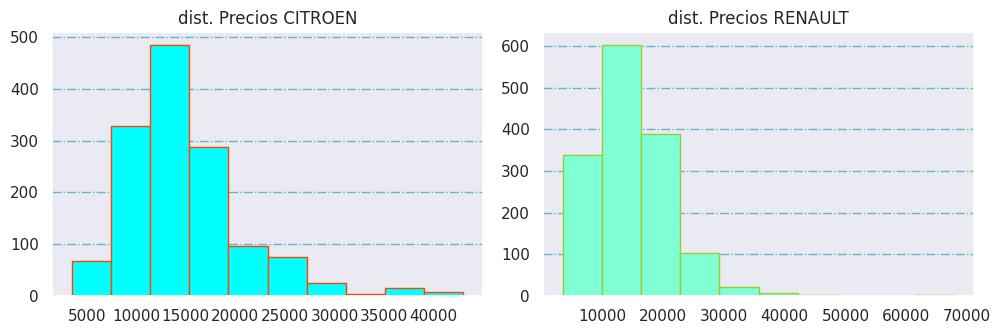

In [ ]:
# ¿Las marcas más baratas de coches, cuáles son?

print("\nTabla con las marcas más baratas, con su precio mínimo, medio, máximo y la cantidad de coches para calcular estos datos.")
print(df.groupby('Marca').agg({'Precio': ['min','mean','max','std','count']}).sort_values(by = ('Precio','mean'), ascending=True).reset_index().head(10))
print()
print(f"Las 10 marcas más baratas se muestran encima, según sus medias.")
print(f"También se muestran las desviaciones estandar correspondientes.", "Esto nos índica que para marcas con medias \
muy cercanas, nos fijariamos en sus desviaciones estandar,", "siendo mejor la menor de estas. Significa que la \
media ha sido calculada con precios más parecidos entre si,\nrespecto de la marca con mayor desviación.", sep="\n")

print("Este es el caso de las marcas \"Citroen\" y \"Renault\", que tienen, prácticamente iguales, \n\
sus medias, precios mínimos y el número de precios con el que se han calculados los valores estadísticos. \n\
Por tanto, viendo sus desviaciones, \"Renault\" es más barata que \"Citroen\" \
porque sus precios en general están más cercanos a su media,\n\
lo que hace que sea más representativa.")
print()

print("Podemos completar, aún más, esta observación viendo como el máximo de \"Renault\" \
es mucho más alto que el de \"Citroen\". \n\
Lo que índica que realmente sus precios están mucho más cercanos, en general, a la media que los de \"Citroen\", \n\
porque sino tuvieramos este máximo la desviación bajaría mucho pero su media no, al menos significativamente.")
print()
print("A continuación mostramos como se distribuyen los precios de estas dos marcas para percibir mejor estas conclusiones:")
print()
# Gráficos:
citroen_precio = df.loc[df['Marca'] == "CITROEN"]["Precio"]
renault_precio = df.loc[df['Marca'] == "RENAULT"]["Precio"]

fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(10, 3.5))
colors1 = ['#00FFFF'] # color que le vamos a poner a algunas gráficas.
colors2 = ['#7FFFD4']
# Cada uno de los gráficos con sus especificaciones:
ax0.hist(citroen_precio, color=colors1, edgecolor ='orangered')
ax0.set_title('dist. Precios CITROEN') # muestra el título
ax0.grid(axis='y',linestyle='dashdot', color='c'),
ax0.grid(axis = 'x')

ax1.hist(renault_precio, color=colors2, edgecolor = '#9ACD32')
ax1.set_title('dist. Precios RENAULT')
ax1.grid(axis='y',linestyle='dashdot', color='c'),
ax1.grid(axis = 'x')

fig.tight_layout()
plt.show()

---

#### 6 . ¿Y las marcas más baratas respecto a gasolina o diésel?

In [ ]:
# ¿Y las marcas más baratas respecto a gasolina o diésel?

# Tabla con precios medios de cada marca, ordenados de menor a mayor, por cada combustible:
for combustible in df['Combustible'].unique():
  print("_________________________________________________________________________________________________________")
  print()
  print(f"-----> Para {combustible}:")
  print()
  df_combustible = df.loc[df[df['Combustible']==f'{combustible}'].index] #localizamos el grupo que contiene cada combust y lo hacemos mini df.

  print(df_combustible.groupby(['Combustible','Marca']).agg({'Precio':'mean'}).sort_values(by=(['Combustible','Precio'])).reset_index().head(20))



_________________________________________________________________________________________________________

-----> Para Gasolina:

   Combustible       Marca        Precio
0     Gasolina        TATA   2990.000000
1     Gasolina      LANCIA   6359.777778
2     Gasolina       SMART   9903.440476
3     Gasolina        FIAT  10342.342644
4     Gasolina       DACIA  10536.272059
5     Gasolina    MAHINDRA  10550.000000
6     Gasolina     PIAGGIO  10900.000000
7     Gasolina        ALFA  12932.333333
8     Gasolina      TOYOTA  13026.325342
9     Gasolina     CITROEN  13222.894646
10    Gasolina        OPEL  14068.508844
11    Gasolina        FORD  14228.629389
12    Gasolina     RENAULT  15008.144876
13    Gasolina     HYUNDAI  15126.002169
14    Gasolina         KIA  15480.237006
15    Gasolina       SKODA  15483.741935
16    Gasolina        SEAT  15815.022892
17    Gasolina      NISSAN  16395.936382
18    Gasolina     PEUGEOT  16970.855385
19    Gasolina  MITSUBISHI  17038.839506
_________

---

#### 7 . ¿Y las marcas más baratas respecto de potencia?, ¿Y de potencia y combustible?
  1.   ¿Y las marcas más baratas respecto de potencia?
  2.   ¿Y de potencia y combustible?



In [ ]:
# 7.1. ¿Y las marcas más baratas respecto de potencia?

# Mostramos tabla con precios medios para cada marca respecto de cada potencia:
df.groupby(['Potencia','Marca']).agg({'Precio':'mean'}).sort_values(by=(['Potencia','Precio']))

Precio
Potencia Marca                        
37       INVICTA          21495.000000
60       CITROEN           5899.000000
         SEAT              6296.666667
         FORD              6325.000000
         SKODA             7201.473684
         VOLKSWAGEN        7356.076923
         RENAULT          14984.777778
61       SMART             5250.000000
65       KIA               8965.666667
         VOLKSWAGEN        9500.000000
66       KIA               6920.000000
         HYUNDAI           9182.844444
67       KIA               9544.000000
         HYUNDAI          10636.833333
         DACIA            10990.000000
         RENAULT          13200.000000
         PEUGEOT          15286.526316
         CITROEN          15936.866667
68       SUZUKI            4745.000000
         CHEVROLET         5900.000000
         NISSAN            5999.000000
         TOYOTA            6363.214286
         PEUGEOT           6757.040000
         CITROEN           6992.344828
         SEAT             11600.000000
69       FORD              5486.035714
         LANCIA            5981.666667
         KIA               5990.000000
         SKODA             6640.000000
         CITROEN           6956.000000
         PEUGEOT           7995.000000
         TOYOTA            8949.283784
         FIAT              9265.992084
70       PEUGEOT           4990.000000
         VOLKSWAGEN        7097.000000
         SEAT              7112.615385
         LANCIA            7199.000000
         FORD              7537.937500
         SKODA             7799.000000
         RENAULT           7869.200000
         ALFA              7899.000000
         SMART             8465.666667
         OPEL              8945.000000
         TOYOTA            9486.500000
         FIAT             11620.463768
71       RENAULT           7900.000000
         SMART             8227.484848
         NISSAN           10596.846154
72       DACIA             8500.000000
         TOYOTA           10048.375000
         CITROEN          10361.064516
         PEUGEOT          10677.500000
         RENAULT          13699.000000
73       CITROEN           6897.000000
         DACIA             8539.727273
         RENAULT           9224.000000
         OPEL              9990.000000
         PEUGEOT          14633.333333
75       FIAT              6746.115385
         DACIA             7478.283019
         RENAULT           8626.983696
         MERCEDES-BENZ     8850.000000
         KIA               9097.500000
         SEAT              9258.824561
         PEUGEOT           9371.182796
         SKODA             9435.410256
         OPEL              9525.984127
         MAZDA             9646.800000
         MINI              9649.500000
         CITROEN           9719.666667
         SMART             9795.000000
         VOLKSWAGEN       10035.233766
         HYUNDAI          10604.173913
         FORD             10777.891304
         TOYOTA           14899.000000
76       CITROEN           8180.000000
         RENAULT           9996.666667
         OPEL             14745.000000
77       FIAT              7288.875000
78       HYUNDAI           3800.000000
         ALFA ROMEO       10260.000000
80       FORD              5166.333333
         NISSAN            7295.441176
         PEUGEOT           7534.000000
         CITROEN           7823.666667
         MITSUBISHI        9656.857143
         FIAT             11405.454545
         SEAT             12216.863636
         VOLKSWAGEN       13532.685714
         RENAULT          16400.000000
81       CHEVROLET         3900.000000
         OPEL             15507.142857
82       DACIA             7395.000000
         FORD              7985.264706
         MAHINDRA          9400.000000
         CITROEN          10689.410112
         PIAGGIO          10900.000000
         PEUGEOT          10974.779412
         DS               12490.000000
         SMART            18726.847826
83       CITROEN          14322.807692
         SUZUKI

In [ ]:
# 7.2 ¿Y las marcas más baratas respecto de potencia y combustible?

# Mostramos precios medios para cada marca, respecto de potencia y combustible.
df.groupby(['Combustible','Potencia','Marca']).agg({'Precio':'mean'}).sort_values(by=(['Combustible','Potencia','Precio']))

Precio
Combustible        Potencia Marca                        
Diésel             68       PEUGEOT           6837.000000
                            CITROEN           7193.083333
                   70       PEUGEOT           4990.000000
                            FORD              6799.500000
                   73       PEUGEOT          14633.333333
                   75       FIAT              6746.115385
                            SEAT              7817.142857
                            OPEL              7903.641026
                            SKODA             7950.000000
                            DACIA             7964.555556
                            PEUGEOT           8783.831325
                            MERCEDES-BENZ     8850.000000
                            RENAULT           8890.531034
                            KIA               9097.500000
                            FORD              9196.720588
                            HYUNDAI           9646.125000
                            CITROEN           9719.666667
                            VOLKSWAGEN        9964.227273
                   76       CITROEN           8180.000000
                            OPEL             14745.000000
                   80       PEUGEOT           7534.000000
                            CITROEN           7823.666667
                            FIAT             11405.454545
                            VOLKSWAGEN       13355.000000
                            SEAT             13599.000000
                            RENAULT          16400.000000
                   84       VOLKSWAGEN       15749.000000
                   85       FIAT              8000.000000
                            ALFA ROMEO        9000.000000
                            FORD             13140.909091
                            RENAULT          17198.888889
                   88       RENAULT           7399.000000
                            MERCEDES-BENZ    19143.333333
                   90       FIAT              8550.419355
                            SKODA             8645.000000
                            SEAT              8717.566667
                            DACIA             8813.351351
                            OPEL              8945.333333
                            SUBARU            9199.000000
                            TOYOTA            9451.480000
                            KIA               9711.285714
                            PEUGEOT           9788.500000
                            VOLKSWAGEN       10007.805556
                            HYUNDAI          10341.473684
                            CITROEN          10473.333333
                            NISSAN           10552.162791
                            RENAULT          11245.827338
                            MERCEDES-BENZ    11322.105263
                            MINI             11528.000000
                            AUDI             13320.150000
                   91       FORD              8990.000000
                   92       PEUGEOT           8904.914286
                            CITROEN           9113.640000
                            DS               11490.000000
                   95       ALFA ROMEO        8163.000000
                            OPEL              9225.344828
                            FORD             10509.622642
                            FIAT             11697.570248
                            HYUNDAI          12581.428571
                            DACIA            12984.071429
                            RENAULT          13642.681818
                            MERCEDES-BENZ    13966.666667
                            CITROEN          14953.000000
                            NISSAN           15009.800000
                            VOLKSWAGEN       15116.500000
                            MINI             15358.842105
                            PEUGEOT          15813.333333
                            SEAT             1666

---

#### 8 . ¿Influye el color de los coches en los precios de estos?

In [ ]:
# ¿Influye el color de los coches en los precios de estos?
# Usamos para este análisis el dataframe de dummies que contiene las variables númericas sin outliers y las categóricas:

print(f"Vemos que las correlaciones para los colores respecto del precio están muy cercanas a cero, por lo que no existe relación.")
print()
print(f"\n\nSpearman: Relación monótona.\n{df_dum.corr(method='spearman')[['Precio']][14:]}") # Relación no lineal, cualquier otra monótona.
print()
print(f"Pearson: Relación lineal.\n{df_dum.corr(method='pearson')[['Precio']][14:]}") # Relación lineal

Vemos que las correlaciones para los colores respecto del precio están muy cercanas a cero, por lo que no existe relación.



Spearman: Relación monótona.
                      Precio
Gasolina           -0.198152
Híbrido             0.075829
Híbrido enchufable  0.086394
Amarillo            0.004239
Azul                0.040395
Blanco             -0.101202
Dorado              0.004666
Gris                0.032801
Marrón              0.001965
Morado             -0.010998
Naranja             0.028825
Negro               0.049703
Plata               0.017172
Rojo                0.003915
Rosa                0.011610
SinColor           -0.024512
Verde               0.005820

Pearson: Relación lineal.
                      Precio
Gasolina           -0.197468
Híbrido             0.062674
Híbrido enchufable  0.098636
Amarillo            0.004298
Azul                0.036511
Blanco             -0.095907
Dorado              0.006980
Gris                0.030107
Marrón              0.004071
Morado

<ipython-input-118-98b2c5870698>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(f"\n\nSpearman: Relación monótona.\n{df_dum.corr(method='spearman')[['Precio']][14:]}") # Relación no lineal, cualquier otra monótona.
<ipython-input-118-98b2c5870698>:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(f"Pearson: Relación lineal.\n{df_dum.corr(method='pearson')[['Precio']][14:]}") # Relación lineal


---

#### 9 . ¿Cuál es el ranking de los coches más caros?

In [ ]:
# ¿Cuál es el ranking de los coches más caros?

# Mostramos tabla con los 50 coches más caros, con su marca y modelo:
df.groupby(['Marca','Modelo','Version','Potencia','Año']).agg({'Precio':'max'}).sort_values(by=(['Precio']), ascending=False).head(50)

Precio
Marca         Modelo          Version                                            Potencia Año               
LAMBORGHINI   Aventador       LAMBORGHINI Aventador 6.5 V12 LP 7204 50 Annive... 720      2014-01-01  549900
PORSCHE       911             PORSCHE 911 GT2 RS 2p.                             700      2018-01-01  429999
                              PORSCHE 911 Speedster 2p.                          510      2019-01-01  410000
MERCEDES-BENZ Clase G         MERCEDES-BENZ Clase G MercedesAMG G 63 5p.         585      2020-01-01  375000
                                                                                          2019-01-01  358900
FERRARI       812             FERRARI 812 Superfast 3p.                          800      2020-01-01  355000
MERCEDES-BENZ Mercedes-AMG GT MERCEDES-BENZ MercedesAMG GT MercedesAMG GT 63 ... 639      2020-01-01  330000
BENTLEY       Continental GT  BENTLEY Continental GT GT V8 Convertible 2p.       550      2020-01-01  323580
LAMBORGHINI   Aventador       LAMBORGHINI Aventador 6.5 V12 LP 7004 Roadster 2p. 700      2015-01-01  320000
BENTLEY       Continental GT  BENTLEY Continental GT GT V8 Coupe 2p.             550      2020-01-01  314710
              Flying Spur     BENTLEY Flying Spur Flying Spur W12 4p.            635      2020-01-01  308900
FERRARI       812             FERRARI 812 Superfast 3p.                          800      2019-01-01  305400
BENTLEY       Continental GT  BENTLEY Continental GT GT W12 Convertible 2p.      635      2019-01-01  294900
FERRARI       488             FERRARI 488 Pista DCT 2p.                          720      2020-01-01  285900
MERCEDES-BENZ Clase G         MERCEDES-BENZ Clase G MercedesAMG G 63 5p.         585      2018-01-01  284900
FERRARI       488             FERRARI 488 Spider DCT 2p.                         670      2017-01-01  279000
LAMBORGHINI   Aventador       LAMBORGHINI Aventador 6.5 V12 LP 7004 2p.          700      2013-01-01  270000
BENTLEY       Bentayga        BENTLEY Bentayga Bentayga W12 5p.                  608      2018-01-01  264900
PORSCHE       911             PORSCHE 911 TURBO S 2p.                            650      2021-01-01  262000
                                                                                          2020-01-01  259900
FERRARI       GTC4            FERRARI GTC4 Lusso T DCT 3p.                       610      2019-01-01  249900
LAMBORGHINI   Aventador       LAMBORGHINI Aventador 6.5 V12 LP 7004 2p.          700      2014-01-01  249000
              Huracán         LAMBORGHINI Huracan LP 6104 2p.                    610      2017-01-01  243200
FERRARI       458             FERRARI 458 Speciale 2p.                           605      2014-01-01  239000
              488             FERRARI 488 Spider DCT 2p.                         670      2019-01-01  235000
ASTON MARTIN  Vantage         ASTON MARTIN Vantage 4.0 V8 3p.                    510      2019-01-01  227000
FERRARI       488             FERRARI 488 Spider 2p.                             670      2016-01-01  226900
PORSCHE       911             PORSCHE 911 TURBO 2p.                              580      2020-01-01  215900
FERRARI       488             FERRARI 488 GTB 2p.                                670      2016-01-01  210000
                              FERRARI 488 Spider DCT 2p.                         670      2018-01-01  209900
PORSCHE       911             PORSCHE 911 GT3 2p.                                500      2018-01-01  199999
BENTLEY       Continental GT  BENTLEY Continental GT GT Convertible Speed 2p.    635      2015-01-01  199999
FERRARI       458             FERRARI 458 Spider 2p.                             570      2013-01-01  199900
MERCEDES-BENZ Clase E         MERCEDES-BENZ Clase E MercedesAMG E 63 S 4MATIC... 612      2020-01-01  199000
BENTLEY       Bentayga        BENTLEY Bentayga Bentayga 4.0 V8 5p.               550      2018-01-01  198800
MERCEDES-BENZ Clase G         MERCEDES-BENZ Clase G G 500 4X42 5p.   

---

#### 10 . ¿Y el ranking de los más baratos?

In [ ]:
# ¿Y el ranking de los mas baratos?

# Mostramos tabla con los 50 coches mas baratos con su marca, modelo, version, potencia y año:

df.groupby(['Marca','Modelo','Version','Potencia','Año']).agg({'Precio':'mean'}).sort_values(by=(['Precio']), ascending=True).head(50)

Precio
Marca      Modelo      Version                                            Potencia Año                    
SEAT       Ibiza       SEAT Ibiza ST 1.2 TSI 66kW Style Connect Last E... 90       2017-01-01  2500.000000
TATA       INDICA      TATA INDICA 1.4 MPFi Sport 5p.                     85       2012-01-01  2990.000000
PEUGEOT    Bipper      PEUGEOT Bipper Tepee Active 1.3 HDi 75cv 5p.       75       2013-01-01  3000.000000
DACIA      Sandero     DACIA Sandero Ambiance 1.2 75cv 5p.                75       2014-01-01  3100.000000
CITROEN    C1          CITROEN C1 1.0 Exclusive 5p.                       68       2012-01-01  3499.000000
RENAULT    Fluence     RENAULT Fluence ZE Dynamique 4p.                   95       2013-01-01  3500.000000
FIAT       Punto       FIAT Punto 1.2 8v Easy 69 CV SS Gasolina 5p.       69       2014-01-01  3690.000000
FORD       KA          FORD KA Urban 1.2 Duratec AutoStartStop 3p.        69       2012-01-01  3700.000000
HYUNDAI    i20         HYUNDAI i20 1.2 PBT Classic AA Key 5p.             78       2012-01-01  3800.000000
CHEVROLET  Aveo        CHEVROLET Aveo 1.4 16v LS 5p.                      101      2012-01-01  3899.000000
           Spark       CHEVROLET Spark 1.2 16v LS 5p.                     81       2012-01-01  3900.000000
HYUNDAI    i30         HYUNDAI i30 1.4 Essence 3p.                        100      2015-01-01  3900.000000
PEUGEOT    107         PEUGEOT 107 1.0i Active 68cv 5p.                   68       2013-01-01  3925.000000
RENAULT    Clio III    RENAULT Clio III Collection 1.2 16v 75 5p.         75       2012-01-01  3990.000000
SMART      fortwo      SMART fortwo Coupe 45 MHD Pure 3p.                 61       2012-01-01  4000.000000
FIAT       Panda       FIAT Panda 1.2 Young 69cv EU6 5p.                  69       2014-01-01  4000.000000
                       FIAT Panda 1.2 Pop 69cv 5p.                        69       2013-01-01  4199.500000
TOYOTA     Aygo        TOYOTA Aygo 1.0 VVTi Connect 5p.                   68       2012-01-01  4250.000000
PEUGEOT    207         PEUGEOT 207 ACTIVE 1.4 VTi 95 5p.                  95       2012-01-01  4290.000000
NISSAN     NV200       NISSAN NV200 1.5dCi 66kW 90CV COMFORT Mam          90       2017-01-01  4300.000000
FIAT       Punto       FIAT Punto 1.3 Easy 75 CV Multijet 5p.             75       2012-01-01  4397.500000
RENAULT    Twingo      RENAULT Twingo Emotion 2013 1.2 16v 75 3p.         75       2013-01-01  4450.000000
SEAT       Ibiza       SEAT Ibiza 1.2 TSI 85cv Style 5p.                  85       2014-01-01  4490.000000
CITROEN    C3          CITROEN C3 Puretech 82cv Tonic 5p.                 82       2014-01-01  4495.000000
DACIA      Logan       DACIA Logan Ambiance 1.2 75 5p.                    75       2014-01-01  4495.000000
SUZUKI     Alto        SUZUKI Alto 1.0 GL  ESP 5p.                        68       2012-01-01  4500.000000
CITROEN    C3 Picasso  CITROEN C3 Picasso VTi 95cv Attraction 5p.         95       2012-01-01  4500.000000
FIAT       Punto       FIAT Punto 1.4 8v Pop 77 CV Gasolina SS 5p.        77       2013-01-01  4500.000000
CHEVROLET  Aveo        CHEVROLET Aveo 1.4 LT 5p.                          100      2013-01-01  4500.000000
CITROEN    C1          CITROEN C1 1.0 Seduction 3p.                       68       2014-01-01  4500.000000
CHEVROLET  Aveo        CHEVROLET Aveo 1.2 LT 5p.                          86       2013-01-01  4500.000000
FIAT       Panda       FIAT Panda 1.2 Pop 51kW 69CV EU6 5p.               69       2016-01-01  4550.000000
           Doblò Cargo FIAT Doblò Cargo Cargo Base 1.4 TJet Natural Po... 120      2013-01-01  4550.000000
TOYOTA     Aygo        TOYOTA Aygo 1.0 VVTi Live 5p.                      68       2012-01-01  4600.000000
FIAT       Fiorino     FIAT Fiorino Cargo Base 1.3 Mjet 75cv E5 Clase ... 75       2016-01-01  4600.000000
FORD       KA          FORD KA Titanium 1.2 Duratec AutoStartStop 3p.     69       2014-01-01  4650.000000
                       FORD KA Urb

---

#### 11 .¿Rankings anteriores, más caros y más baratos, pero con los más nuevos?

1.  Ranking de coches más caros y con menos antigüedad.
2.  Ranking de coches más baratos y con menos antigüedad.



In [ ]:
# 11.1 Ranking de coches más caros y con menos antigüedad.

# Mostramos tabla con los 50 coches con menos antigúedad y más caros, ordenados de forma descendente, lo más caros primero, junto con la marca, modelo y versión.
df.groupby(['Año','Marca','Modelo','Version','Potencia']).agg({'Precio':'mean'}).sort_values(by=(['Año','Precio']), ascending=False).head(50)

Precio
Año        Marca         Modelo             Version                                            Potencia               
2023-01-01 SEAT          Arona              1.0 TSI Xperience                                  110        21599.000000
2022-01-01 HYUNDAI       Tucson             1.6 T-GDI Hybrid Maxx Auto                         180        34099.000000
           KIA           Sportage           1.6 Hybrid Tech                                    179        33399.000000
           HYUNDAI       i30                2.0 T-GDI N                                        250        30999.000000
           TOYOTA        C-HR               2.0 Hybrid GR Sport                                184        28099.000000
                                            2.0 Hybrid Advance                                 184        27599.000000
           FIAT          500X               1.3 Firefly Sport                                  151        24599.000000
           FORD          Focus              1.0 EcoBoost Mild-Hybrid ST-Line                   125        23699.000000
           TOYOTA        Corolla            1.8 Hybrid Active Plus                             122        23599.000000
           HYUNDAI       Kona               1.6 Hybrid TGDI Maxx                               105        23499.000000
           KIA           XCeed              1.5 TGDI Mild-Hybrid Drive                         160        23499.000000
           MAZDA         2                  1.5 Hybrid Select                                  116        22599.000000
           FORD          Puma               1.0 EcoBoost Mild-Hybrid Titanium Design           125        21999.000000
           RENAULT       Clio               1.6 Hybrid E-Tech Zen                              91         21999.000000
           CITROEN       C4                 1.5 Blue-HDi Feel                                  110        21499.000000
           MG            ZS                 1.5 VTi Luxury                                     106        18499.000000
           SKODA         Kamiq              1.0 TSI Emotion                                    95         17499.000000
           HYUNDAI       Bayon              1.2 Essence 2WD                                    84         17199.000000
           DACIA         Sandero III        1.0 TCe Stepway Comfort                            91         16999.000000
           HYUNDAI       i20                1.0 TGDI Klass                                     101        16399.000000
                                            1.0 TGDI SLX                                       101        15299.000000
           FIAT          Panda              1.0 Mild-Hybrid City Life                          70         13149.000000
2021-01-01 PORSCHE       911                PORSCHE 911 TURBO S 2p.                            650       262000.000000
           MERCEDES-BENZ Clase S            MERCEDES-BENZ Clase S S 500 4MATIC EQ Boost Cor... 435       168900.000000
           AUDI          A6                 AUDI A6 RS 6 Avant TFSI quattro 5p.                600       164999.000000
           MERCEDES-BENZ Clase S            MERCEDES-BENZ Clase S S 350 d Corto 4p.            286       111300.000000
           PORSCHE       Macan              PORSCHE Macan Macan S 5p.                          354       101900.000000
           MERCEDES-BENZ GLE                MERCEDES-BENZ GLE GLE 450 4MATIC 5p.               367        95300.000000
                         Clase C            MERCEDES-BENZ Clase C Coupe MercedesAMG C 43 4M... 390        93199.000000
                         GLC Coupé          MERCEDES-BENZ GLC Coupe MercedesAMG GLC 43 4MAT... 390        89250.000000
                         GLA                MERCEDES-BENZ GLA MercedesAMG GLA 45 S 4MATIC 5p.  421        88000.000000
                         Clase A            MERCEDES-BENZ Clase A MercedesAMG A 45 S 4MATIC... 421        87800.000000
           PORSCHE       Macan              PORSCHE Macan Macan 5p

In [ ]:
# 11.2 Ranking de coches más baratos y con menor antigüedad.

# Mostramos tabla con 50 coches, ordenados por menor antigüedad y menor precio, junto con su marca, modelo, versión y potencia.
df.groupby(['Año','Marca','Modelo','Version','Potencia']).agg({'Precio':'mean'}).sort_values(by=(['Año','Precio']),
                                                                                             ascending=[False,True]).head(60)


Precio
Año        Marca      Modelo      Version                                         Potencia              
2023-01-01 SEAT       Arona       1.0 TSI Xperience                               110       21599.000000
2022-01-01 FIAT       Panda       1.0 Mild-Hybrid City Life                       70        13149.000000
           HYUNDAI    i20         1.0 TGDI SLX                                    101       15299.000000
                                  1.0 TGDI Klass                                  101       16399.000000
           DACIA      Sandero III 1.0 TCe Stepway Comfort                         91        16999.000000
           HYUNDAI    Bayon       1.2 Essence 2WD                                 84        17199.000000
           SKODA      Kamiq       1.0 TSI Emotion                                 95        17499.000000
           MG         ZS          1.5 VTi Luxury                                  106       18499.000000
           CITROEN    C4          1.5 Blue-HDi Feel                               110       21499.000000
           FORD       Puma        1.0 EcoBoost Mild-Hybrid Titanium Design        125       21999.000000
           RENAULT    Clio        1.6 Hybrid E-Tech Zen                           91        21999.000000
           MAZDA      2           1.5 Hybrid Select                               116       22599.000000
           HYUNDAI    Kona        1.6 Hybrid TGDI Maxx                            105       23499.000000
           KIA        XCeed       1.5 TGDI Mild-Hybrid Drive                      160       23499.000000
           TOYOTA     Corolla     1.8 Hybrid Active Plus                          122       23599.000000
           FORD       Focus       1.0 EcoBoost Mild-Hybrid ST-Line                125       23699.000000
           FIAT       500X        1.3 Firefly Sport                               151       24599.000000
           TOYOTA     C-HR        2.0 Hybrid Advance                              184       27599.000000
                                  2.0 Hybrid GR Sport                             184       28099.000000
           HYUNDAI    i30         2.0 T-GDI N                                     250       30999.000000
           KIA        Sportage    1.6 Hybrid Tech                                 179       33399.000000
           HYUNDAI    Tucson      1.6 T-GDI Hybrid Maxx Auto                      180       34099.000000
2021-01-01 CITROEN    C1          CITROEN C1 VTi 53kW 72CV SS City Edition 5p.    72        10740.000000
           KIA        Picanto     KIA Picanto 1.0 CVVT 49kW 67CV Concept 5p.      67        10800.000000
           TOYOTA     AYGO        1.0 X-Play                                      72        10899.000000
           DACIA      Sandero     DACIA Sandero Access SCe 49kW 65CV 5p.          67        10990.000000
           KIA        Picanto     1.0 DPi Concept                                 67        11099.000000
                                  KIA Picanto 1.0 DPi 49kW 67CV Concept 5p.       67        11370.000000
           SEAT       Mii         SEAT Mii 1.0 Ecofuel GNC 50kW Style Ed Plus 5p. 68        11600.000000
           PEUGEOT    108         PEUGEOT 108 Allure VTi 52kW 72CV 5p.            72        11776.500000
           FIAT       Panda       1.0 Gse Mild-Hybrid Urban                       70        12199.000000
                                  1.0 Mild-Hybrid Sport                           70        12899.000000
           PEUGEOT    208         PEUGEOT 208 PureTech 55kW 75CV Like 5p.         75        12900.000000
           CITROEN    C3          CITROEN C3 PureTech 60KW 83CV Live Pack 5p.     83        13200.000000
           FIAT       Panda       FIAT Panda Sport Hybrid 1.0 Gse 51kw 70CV 5p.   70        13200.000000
                      Fiorino     FIAT Fiorino Cargo Base N1 1.3 MJet 59 kW 80 CV 80        13490.000000
           DACIA      Sandero     DACIA Sandero Stepway Comfort TCe 67kW 90CV 5p. 91        13525.000000
   

---

#### 12 . ¿Y un ranking con los mejores coches?

Para poder catalogar a un coche como "mejor" podriamos fijarnos en:
  - Potencia
  - Kilometros realizados
  - Antigüedad
  - Precio

Teniendo en cuenta estas variables, vamos a dar respuesta a la pregunta:

In [ ]:
# ¿Y un ranking con los mejores coches?
# Usamos las variables que podrian determinar que coches son mejores:

# Mostramos tabla con los 100 mejores coches:

print("Tabla de coches ordenados para mostrar primero con: \n\t- Menores años. \n\t- Menor kilometraje. \n\t- Mayor potencia. \n\t- Menor precio.")
df.groupby(['Año','Kms','Potencia','Marca','Modelo','Version']).agg({'Precio':'mean'}).sort_values(by=(['Año','Kms','Potencia','Precio']),
                                                                                                   ascending=[False,True,False,True]).head(100)



Tabla de coches ordenados para mostrar primero con: 
	- Menores años. 
	- Menor kilometraje. 
	- Mayor potencia. 
	- Menor precio.


Precio
Año        Kms     Potencia Marca         Modelo             Version                                                         
2023-01-01 1771.0  110      SEAT          Arona              1.0 TSI Xperience                                   21599.000000
2022-01-01 2019.0  70       FIAT          Panda              1.0 Mild-Hybrid City Life                           13599.000000
           2487.0  106      MG            ZS                 1.5 VTi Luxury                                      18499.000000
           2794.0  84       HYUNDAI       Bayon              1.2 Essence 2WD                                     17199.000000
           4194.0  180      HYUNDAI       Tucson             1.6 T-GDI Hybrid Maxx Auto                          34099.000000
           4507.0  101      HYUNDAI       i20                1.0 TGDI Klass                                      16399.000000
           4708.0  105      HYUNDAI       Kona               1.6 Hybrid TGDI Maxx                                23499.000000
           6025.0  101      HYUNDAI       i20                1.0 TGDI SLX                                        15299.000000
           6887.0  95       SKODA         Kamiq              1.0 TSI Emotion                                     17499.000000
           7769.0  110      CITROEN       C4                 1.5 Blue-HDi Feel                                   21499.000000
           8498.0  116      MAZDA         2                  1.5 Hybrid Select                                   22599.000000
           8588.0  70       FIAT          Panda              1.0 Mild-Hybrid City Life                           12699.000000
           12774.0 184      TOYOTA        C-HR               2.0 Hybrid GR Sport                                 28099.000000
           13175.0 91       DACIA         Sandero III        1.0 TCe Stepway Comfort                             16999.000000
           15526.0 122      TOYOTA        Corolla            1.8 Hybrid Active Plus                              23599.000000
           16497.0 151      FIAT          500X               1.3 Firefly Sport                                   24599.000000
           17566.0 125      FORD          Puma               1.0 EcoBoost Mild-Hybrid Titanium Design            21999.000000
           18413.0 250      HYUNDAI       i30                2.0 T-GDI N                                         30999.000000
           21119.0 91       RENAULT       Clio               1.6 Hybrid E-Tech Zen                               21999.000000
           23446.0 184      TOYOTA        C-HR               2.0 Hybrid Advance                                  27599.000000
           24959.0 160      KIA           XCeed              1.5 TGDI Mild-Hybrid Drive                          23499.000000
           31527.0 179      KIA           Sportage           1.6 Hybrid Tech                                     33399.000000
           40550.0 125      FORD          Focus              1.0 EcoBoost Mild-Hybrid ST-Line                    23699.000000
2021-01-01 0.0     421      MERCEDES-BENZ GLA                MERCEDES-BENZ GLA MercedesAMG GLA 45 S 4MATIC 5p.   88000.000000
                   390      MERCEDES-BENZ Clase C            MERCEDES-BENZ Clase C Coupe MercedesAMG C 43 4M...  93199.000000
                   367      MERCEDES-BENZ GLE                MERCEDES-BENZ GLE GLE 450 4MATIC 5p.                95300.000000
                   310      CUPRA         Formentor          CUPRA Formentor 2.0 TSI 228kW 310 CV VZ 4Drive ...  48890.000000
                   306      MERCEDES-BENZ Clase GLC          MERCEDES-BENZ Clase GLC GLC 300 de 4MATIC 5p.       60974.000000
                                          Clase A            MERCEDES-BENZ Clase A MercedesAMG A 35 4MATIC 5p.   76000.000000
                                          CLA                MERCEDES-BENZ CLA CLA MercedesAMG 35 4Matic 4p.     76700.000000
                   230      HYUNDAI       TUCSON             HYUNDAI TUCSON 1.6 TGDI 16

---

#### 13 . ¿Cuáles son los mejores coches de cada marca?

Por último, vamos a mostrar los mejores coches, según las variables anteriores (año, kms, potencia y precio) para cada marca.

Podríamos elegir para la empresa los mejores de cada una.

In [ ]:
# Vamos a mostrar para cada marca los 20 mejores coches

for marca in df['Marca'].unique():
  print("_________________________________________________________________________________________________________")
  print()
  print(f"-----> Para {marca}:")
  df_marca = df.loc[df[df['Marca']==f'{marca}'].index] #localizamos el grupo que contiene cada marca y lo hacemos mini df.
  print(df_marca.groupby(['Año','Kms','Potencia','Modelo','Version']).agg({'Precio':'mean'}).sort_values(by=(['Año','Kms','Potencia','Precio']),
                                                                                      ascending=[False,True,False,True]).head(20))
  print()
  print()


_________________________________________________________________________________________________________

-----> Para CITROEN:
                                                                                                     Precio
Año        Kms    Potencia Modelo               Version                                                    
2022-01-01 7769.0 110      C4                   1.5 Blue-HDi Feel                                   21499.0
2021-01-01 0.0    131      C5 Aircross          CITROEN C5 Aircross BlueHdi 96kW 130CV SS C Ser...  26820.0
                  102      Berlingo             CITROEN Berlingo Talla M BlueHDi 100 SS SHINE 5p.   22900.0
                  83       C3                   CITROEN C3 PureTech 60KW 83CV SHINE 5p.             14100.0
           1.0    131      C5 Aircross          CITROEN C5 Aircross BlueHdi 96kW 130CV SS Live ...  23875.0
                                                CITROEN C5 Aircross PureTech 96kW 130CV SS C Se...  24400.0
        

---


---

## 5.2 Preguntas de EUROPICAR.
(Proyecto, .pdf)

Europicar quiere tener respuesta al menos a estas preguntas :
1. ¿Cuántos coches únicos hay en el csv vs API?
2. ¿Cuál es el precio medio de los vehículos en la API y csv?
3. ¿Tienen los mismos vehículos ambas fuentes de datos?
4. Teniendo en cuenta únicamente el dataset de segunda mano, ¿que hace que
un vehículo tenga un valor u otro?
5. ¿Son iguales los parámetros en ambas fuentes de datos en cuanto al precio?
6. ¿En qué fuentes de datos hay más volatilidad en cuanto al precio? , ¿hay
algún tipo de estacionalidad?
7. ¿Hay alguna variable que podríamos añadir para mejorar el análisis?
8. ¿Has podido ver algún vehículo que está en ambas fuentes de datos?, ¿es
su valoración la misma?
9. ¿Puedes hacer un ranking de los vehículos más caros?
10. Teniendo en cuenta todo el conocimiento adquirido , cuales son tus
sugerencias a la hora de invertir 3 millones de euros.

### Respuestas:

---

#### 1 . ¿Cuántos coches únicos hay en el csv vs API?

In [ ]:
# 1. ¿Cuántos coches únicos hay en el csv vs API?

# Cargamos y leemos el csv de Bipicar, API:

df_bipicar = pd.read_csv('CSV_BIPICAR_Jupiter_Definitivo2.csv')

# Primero miramos nuestro df para ver si hay duplicados. En el momento que no lo haya, ya sabemos que
# todos los coches del df son únicos:

# Vemos si exiten filas duplicadas y cuántas:

print(f"Existen {df.duplicated(keep='first').sum()} filas duplicadas en ofertas de segunda mano, teniendo en cuenta todas las columnas.")
print(f"Existen {df_bipicar.duplicated(keep='first').sum()} filas duplicadas en ofertas renting Bipicar, teniendo en cuenta todas las columnas.")

print()
print(df[df.duplicated()].head(5)) # Mostramos los duplicados. No se toma en cuenta la primera aparición de estos.

if df.duplicated(keep='first').sum() == 0:
  print(f"\n\nNuestro df contiene un total de {'{:,g}'.format(len(df))} coches únicos y en el csv de APIs hay {len(df_bipicar)} coches únicos.")
else: print("Existen duplicados y no se han eliminado...")
print('_____________________________________________________________________________________')

Existen 0 filas duplicadas en ofertas de segunda mano, teniendo en cuenta todas las columnas.
Existen 4 filas duplicadas en ofertas renting Bipicar, teniendo en cuenta todas las columnas.

Empty DataFrame
Columns: [Marca, Modelo, Version, Precio, Combustible, Año, Kms, Potencia, Puertas, Cambio, Color, Distribuidor]
Index: []


Nuestro df contiene un total de 25,734 coches únicos y en el csv de APIs hay 235 coches únicos.
_____________________________________________________________________________________


---

#### 2 . ¿Cuál es el precio medio de los vehículos en la API y csv?

In [ ]:
# 2. ¿Cuál es el precio medio de los vehículos en la API y csv?

# Importamos los datos de API (coches renting):
df_bipicar = pd.read_csv('CSV_BIPICAR_Jupiter_Definitivo2.csv')

print(f"- El precio medio de las ofertas de coches es de {'{:,g}'.format(df['Precio'].mean())} €, \
Aunque existen coches muy por encima de esta cifra.")
print("\tSi hacemos un análisis más profundo de estos precios tenemos que:")
print(f"\t\t--> Los precios de los coches oscilan entre los {'{:,d}'.format(df['Precio'].max())} € y los {'{:,d}'.format(df['Precio'].min())} €.")
print(f"\t\t--> Siendo la media de precios de {'{:,g}'.format((df['Precio'].mean()))} €.") # g para formato con float
print(f"\t\t--> Además, el 50% central de los precios se situa entre {'{:,g}'.format(df['Precio'].quantile(0.25))} € y {'{:,g}'.format(df['Precio'].quantile(0.75))} €.")
print(f"\t\t--> Y el 90% de los precios son inferiores a {'{:,g}'.format(df['Precio'].quantile(0.90))} €.")
print(f"\n- El precio medio de los vehículos extraidos con APIs es de {'{:,g}'.format(df_bipicar['Precio'].mean())} €, contando con {len(df_bipicar)} coches en total.")

- El precio medio de las ofertas de coches es de 22,217.6 €, Aunque existen coches muy por encima de esta cifra.
	Si hacemos un análisis más profundo de estos precios tenemos que:
		--> Los precios de los coches oscilan entre los 549,900 € y los 2,500 €.
		--> Siendo la media de precios de 22,217.6 €.
		--> Además, el 50% central de los precios se situa entre 12,900 € y 25,680 €.
		--> Y el 90% de los precios son inferiores a 36,950 €.

- El precio medio de los vehículos extraidos con APIs es de 431.821 €, contando con 235 coches en total.


---

#### 3 . ¿Tienen los mismos vehículos ambas fuentes de datos?

Importamos el archivo de BIPICAR PARA RESPONDER A ESTA PREGUNTA:

In [ ]:
# 3. ¿Tienen los mismos vehículos ambas fuentes de datos?

df_bipicar = pd.read_csv('CSV_BIPICAR_Jupiter_Definitivo2.csv')

Para responder a esta pregunta, vamos a crear dos dataset con las columnas que definen a un coche.

Para ello, solo vamos a unir las columnas de 'Marca', 'Modelo' y 'Version'.
Las demás columnas es evidente que no pueden ser iguales puesto que unos son coches de segunda mano y otros son coches de Bipicar, una empresa de renting que los alquila por meses.

Aun así, la columna 'Version' no va a coincidir aun siendo el mismo coche porque la versión de cada coche se escribe de
forma muy amplia y cada responsable, de introducir la información en las páginas web de donde hemos extraido los datos, pone cosas diferentes.

ej de "Version": (FORD Transit Connect Van 1.5 TDCi 100cv Ambiente 200 L1).

Lo primero que debemos hacer es convertir los datos que contienen las columnas en el mismo formato.

Por ejemplo, los valores de 'Marca' deben de estar en mayúsculas en los dos dfs.


In [ ]:
# Creamos los datasets para el archivo de coches de segunda mano y otro para el de coches de renting:
dfsm = df[['Marca', 'Modelo', 'Version']]
dfapi = df_bipicar[['Marca', 'Modelo', 'Version']]

# Mayúsculas para todas las columnas de dfapi:

for col in dfapi:
  dfapi[col] = dfapi[col].apply(lambda x: x.upper())

# Mayuscúlas para todas las columnas de dfsm:

for col in dfsm:
  dfsm[col] = dfsm[col].apply(lambda x: x.upper())

<ipython-input-128-0ab68dc131d2>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfapi[col] = dfapi[col].apply(lambda x: x.upper())
<ipython-input-128-0ab68dc131d2>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfsm[col] = dfsm[col].apply(lambda x: x.upper())


In [ ]:
# Comprobamos:
dfapi.head(2)

Marca Modelo            Version
0     FIAT    500   HYBRID DOLCEVITA
1  CITROEN     C3  1.2 PURETECH FEEL

In [ ]:
# Comprobamos:
dfsm.sample(2)

Marca Modelo                                     Version
23232    VOLVO   XC40          VOLVO XC40 2.0 D3 RDESIGN AUTO 5P.
17609  PEUGEOT    208  PEUGEOT 208 PURETECH 73KW 100CV ALLURE 5P.

In [ ]:
dfsm.loc[20533]

Marca                                                 FIAT
Modelo                                               DOBLÒ
Version    FIAT DOBLO PANORAMA POP N1 1.3 MULTIJET 90CV E5
Name: 20533, dtype: object

In [ ]:
# Unificamos todas las columnas en una sola para buscar coches iguales y que coincidan, al menos en gran parte.
# La columna versión de Bipicar ahora va a contener también la marca y el modelo, al igual que ya lo hace en df de coches segunda mano.
dfapi['Version'] = dfapi['Marca'] + " " + dfapi['Modelo'] + " " + dfapi['Version']

<ipython-input-132-aa13534a40c0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfapi['Version'] = dfapi['Marca'] + " " + dfapi['Modelo'] + " " + dfapi['Version']


In [ ]:
# Revisamos la columna 'Version' de segunda mano. Si esta no contiene marca y modelo, se la añadimos
# Así conseguimos que las dos columnas 'Version' contengan marca, modelo y versión.

for i in range(len(dfsm['Modelo'])):
  if dfsm['Modelo'][i] not in dfsm['Version'][i]:
    dfsm['Version'][i] = dfsm['Modelo'][i] +" "+ dfsm['Version'][i]

for i in range(len(dfsm['Marca'])):
  if dfsm['Marca'][i] not in dfsm['Version'][i]:
    dfsm['Version'][i] = dfsm['Marca'][i] +" "+ dfsm['Version'][i]

<ipython-input-133-a5a7c65b02d8>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfsm['Version'][i] = dfsm['Modelo'][i] +" "+ dfsm['Version'][i]
<ipython-input-133-a5a7c65b02d8>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfsm['Version'][i] = dfsm['Marca'][i] +" "+ dfsm['Version'][i]


In [ ]:
# Comprobamos:
dfsm['Version'].sample(20)

19913       CITROEN C4 CACTUS BLUEHDI 100 FEEL EDITION 5P.
3152                         TOYOTA YARIS 1.3 100 FEEL 5P.
15485                                 BMW SERIE 5 520D 4P.
1919          AUDI A1 SPORTBACK 1.2 TFSI 86CV AMBITION 5P.
4211                         MINI MINI ONE D 5 PUERTAS 5P.
21623    PEUGEOT 3008 1.2 PURETECH 96KW 130CV ALLURE SS...
6040     JEEP WRANGLER UNLIMITED 2.0T GME RUBICON 8ATX ...
15543    CLASE GLE COUPÉ MERCEDES-BENZ CLASE GLE COUPE ...
20938    F-PACE JAGUAR FPACE 3.0L TDV6 AWD AUTOMATICO P...
1547        ABARTH 500 1.4 16V TJET 595 103KW 140CV E6 3P.
16490    FORD FIESTA 1.0 ECOBOOST MHEV 92KW 125CV TREND...
69         OPEL ASTRA 1.2T SHR 107KW 145CV ELEGANCE ST 5P.
18356                  NISSAN JUKE 1.2 DIGT ACENTA 4X2 5P.
16394                                 BMW SERIE 1 120D 5P.
1121     CLASE GLE COUPÉ MERCEDES-BENZ CLASE GLE COUPE ...
256      LEÓN SEAT LEON 1.5 TSI 110KW 150CV STSP FR EDI...
24053        CITROEN C4 CACTUS BLUEHDI 73KW 100CV FEEL 5

---> Ahora comparamos ambos dfs nuevos (dfapi y dfsm) en busca de filas iguales

In [ ]:
#  CREAMOS UNA TABLA QUE NOS INDIQUE SI APARECEN COCHES IGUALES Y LOS MUESTRA, JUNTO CON SU ÍNDICE:

# Creamos listas donde meteremos las coincidencias:
iguales_sm_api = [] # en api están igual o tienen más descripción que sm.
iguales_api_sm = [] # en sm están igual o tienen más descripción que api.

# Mostramos coches coincidentes respecto de coches de segunda mano:
print("\t\tCOCHE SEGUNDA MANO\t\t\tCOCHE API\n")
for version in dfsm['Version']:
  for indice in range(len(dfapi['Version'])):
    if version in dfapi['Version'][indice]:
      print(f"SEGUNDA MANO ->\t{version}\t---\t{dfapi['Version'][indice]}\t<- API -> índice = {indice}")
      iguales_sm_api.append(version) # añadimos el coche a la lista de iguales.
print("\n\n_______________________________________________________________________________________________\n\n")

# Mostramos coches coincidentes respecto de coches de renting:
print("                 COCHE API                         COCHE SEGUNDA MANO\n\n")
for version in dfapi['Version']:
  for indice in range(len(dfsm['Version'])):
    if version in dfsm['Version'][indice]:
      print(f"API _____>   {version}    ---    {dfsm['Version'][indice]}    <_____ SEGUNDA MANO --> índice = {indice}")
      iguales_api_sm.append(version) # añadimos el coche a la lista de iguales.

		COCHE SEGUNDA MANO			COCHE API

SEGUNDA MANO ->	FORD KUGA	---	FORD KUGA 2.0 ECOBLUE ST-LINE	<- API -> índice = 200
SEGUNDA MANO ->	SEAT ATECA 1.5 TSI STYLE	---	SEAT ATECA 1.5 TSI STYLE	<- API -> índice = 167
SEGUNDA MANO ->	SEAT ATECA 1.5 TSI STYLE	---	SEAT ATECA 1.5 TSI STYLE	<- API -> índice = 224
SEGUNDA MANO ->	PEUGEOT 208 1.2 PURETECH ACTIVE	---	PEUGEOT 208 1.2 PURETECH ACTIVE	<- API -> índice = 20
SEGUNDA MANO ->	PEUGEOT 208 1.2 PURETECH ACTIVE	---	PEUGEOT 208 1.2 PURETECH ACTIVE	<- API -> índice = 152
SEGUNDA MANO ->	PEUGEOT 208 1.2 PURETECH ACTIVE	---	PEUGEOT 208 1.2 PURETECH ACTIVE	<- API -> índice = 186
SEGUNDA MANO ->	VOLKSWAGEN POLO 1.0 TSI ADVANCE	---	VOLKSWAGEN POLO 1.0 TSI ADVANCE	<- API -> índice = 5
SEGUNDA MANO ->	VOLKSWAGEN POLO 1.0 TSI ADVANCE	---	VOLKSWAGEN POLO 1.0 TSI ADVANCE	<- API -> índice = 51
SEGUNDA MANO ->	VOLKSWAGEN POLO 1.0 TSI ADVANCE	---	VOLKSWAGEN POLO 1.0 TSI ADVANCE	<- API -> índice = 201
SEGUNDA MANO ->	PEUGEOT 208 1.2 PURETECH ACTIVE	---	PEUGEOT

In [ ]:
# Comprobamos que, aunque aparezcan coches iguales, no son las mismas ofertas ni los mismos coches,
# Se tratan de coches diferentes pero con misma marca, modelo y versión, pero tienen diferentes kms, precio, año, etc.

# Mostramos los 3 ultimos coches que aparecen anteriormente, para ver que no son duplicados.

df.loc[[21743,21809,21837]]

Marca Modelo                                        Version  Precio  \
21743  LEXUS     NX  LEXUS NX 2.5 300h Business Navigation 2WD 5p.   29490   
21809  LEXUS     NX             LEXUS NX 2.5 300h Business 2WD 5p.   36500   
21837  LEXUS     NX  LEXUS NX 2.5 300h Business Navigation 2WD 5p.   29990   

      Combustible        Año      Kms  Potencia Puertas      Cambio   Color  \
21743     Híbrido 2018-01-01  50000.0       197       5  Automático  Blanco   
21809    Gasolina 2020-01-01   2500.0       197       5  Automático    Gris   
21837     Híbrido 2018-01-01  23000.0       197       5  Automático  Blanco   

            Distribuidor  
21743  Automoción Rivera  
21809  Autoforum Premium  
21837       Dimasu Motor

Vamos a mostrar las listas de coches iguales respecto a cada uno de los dataframes.

¿Por qué dos listas en lugar de una?
Porque la columna "version" contiene lo que el distribuidor creyó oportuno poner, pero esto es algo muy subjetivo y dos coches pueden ser exactamente iguales respecto marca, modelo y version pero sin embargo en la version no se muestra así.

Por ello, debemos comparar en ambas direcciones para no perder coches iguales por culpa de que la versión no sea exactamente igual.

Por ejemplo: Un "NISSAN QASHQAI 1.5 DCI N-CONNECTA" es igual a un "NISSAN QASHQAI 1.5 N-CONNECTA" pero no aparece como tal porque le falta el "DCI" en el segundo. Por eso para comparar le preguntamos al df si el primero contiene al segundo, y si el segundo contiene al primero.


In [ ]:
# Ya hemos guardado los coches que aparecen iguales en dos listas:
# Una contiene coches de segunda mano que, comparando con los de api, son iguales.
# La otra lista contiene lo mismo pero desde el otro df:

# Antes vamos a eliminar duplicados en cada lista:
iguales_sm_api = set(iguales_sm_api) # solo muestra únicos.
iguales_api_sm = set(iguales_api_sm) # solo muestra únicos.



print("Lista con coches iguales, comparando los de segunda mano con los de renting:\n")
for coche in iguales_sm_api:
  print(coche)

print(f"\nLa longitud de la lista, los coches iguales, es de {len(iguales_sm_api)} coches.\n\n")
print("\n_______________________________________________________________________________________________\n\n")


print("Lista con coches iguales, comparando los de renting con los de segunda mano:\n")
for coche in iguales_api_sm:
  print(coche)

print(f"\nLa longitud de la lista, los coches iguales, es de {len(iguales_api_sm)} coches.")
print("\n_______________________________________________________________________________________________\n\n")


Lista con coches iguales, comparando los de segunda mano con los de renting:

FORD KUGA
VOLKSWAGEN GOLF 1.0 TSI READY2GO
VOLKSWAGEN POLO 1.0 TSI ADVANCE
MINI ONE
PEUGEOT 208 1.2 PURETECH ACTIVE
NISSAN QASHQAI 1.5 DCI N-CONNECTA
CUPRA FORMENTOR 1.5 TSI
AUDI A1 30 TFSI S LINE
OPEL CORSA 1.4 SELECTIVE
SEAT ATECA 1.5 TSI STYLE
BMW SERIE 1 116D
BMW SERIE 3 318D
AUDI Q3 35 TFSI S LINE
FIAT 500 1.2 LOUNGE
PEUGEOT 3008 1.2 PURETECH ALLURE

La longitud de la lista, los coches iguales, es de 15 coches.



_______________________________________________________________________________________________


Lista con coches iguales, comparando los de renting con los de segunda mano:

VOLKSWAGEN GOLF 1.0 TSI READY2GO
BMW X1 XDRIVE20D
BMW X3 XDRIVE20I
HYUNDAI TUCSON 1.6 CRDI
BMW X2 XDRIVE25E
PEUGEOT 208 1.2 PURETECH ACTIVE
PEUGEOT 3008 1.5 BLUEHDI
AUDI A1 30 TFSI S LINE
LEXUS NX 2.5 300H BUSINESS
LEXUS UX 2.0 250H
SEAT ATECA 1.5 TSI STYLE
AUDI Q3 2.0 TDI
BMW SERIE 3 318D TOURING
HYUNDAI KONA 1.6 GDI HEV

In [ ]:
# Vamos a unir las listas y a sacar los únicos para finalmente mostrar los coches coincidentes en Renting y segunda mano:
iguales_sm_api = list(iguales_sm_api)
iguales_api_sm = list(iguales_api_sm)

iguales = iguales_api_sm + iguales_sm_api

iguales = set(iguales)
print(f"Hay {len(iguales)} coches iguales en ambos archivos, que son:\n")
for v in iguales:
  print(v)

Hay 37 coches iguales en ambos archivos, que son:

FORD KUGA
VOLKSWAGEN GOLF 1.0 TSI READY2GO
BMW X1 XDRIVE20D
BMW X3 XDRIVE20I
HYUNDAI TUCSON 1.6 CRDI
BMW X2 XDRIVE25E
MINI ONE
PEUGEOT 208 1.2 PURETECH ACTIVE
PEUGEOT 3008 1.5 BLUEHDI
AUDI A1 30 TFSI S LINE
LEXUS NX 2.5 300H BUSINESS
LEXUS UX 2.0 250H
SEAT ATECA 1.5 TSI STYLE
AUDI Q3 2.0 TDI
BMW SERIE 3 318D TOURING
HYUNDAI KONA 1.6 GDI HEV KLASS
BMW X3 XDRIVE20D
NISSAN QASHQAI 1.5 DCI N-CONNECTA
CUPRA FORMENTOR 1.5 TSI
BMW SERIE 1 116D
CITROEN BERLINGO BLUEHDI
AUDI Q3 35 TFSI S LINE
BMW X1 SDRIVE18D BUSINESS
FIAT 500 1.2 LOUNGE
PEUGEOT 3008 1.2 PURETECH ALLURE
MITSUBISHI ECLIPSE CROSS 150T KAITEKI CVT 4WD
TOYOTA C-HR 1.8 125H ADVANCE
VOLKSWAGEN POLO 1.0 TSI ADVANCE
AUDI A1 30 TFSI
ALFA ROMEO STELVIO 2.2 EXECUTIVE
HYUNDAI KONA 1.0 TGDI KLASS
PEUGEOT 2008 ALLURE BLUEHDI
OPEL CORSA 1.4 SELECTIVE
FORD ECOSPORT 1.0T ECOBOOST
BMW SERIE 3 318D
TOYOTA C-HR 1.8 125H
PEUGEOT 3008 GT LINE BLUEHDI


In [ ]:
# Comprobamos, escribiendo en el codigo de alguna versión, y miramos si está en dfapi y en dfsm:

# Muestra la fila de la columna "Version", junto con el índice donde se encuentra.
# Si en segunda mano no apareciera, es porque no aparece exactamente igual.
print(dfapi["Version"].loc[dfapi[dfapi["Version"] == 'PEUGEOT 208 1.2 PURETECH ACTIVE'].index])

print(dfsm["Version"].loc[dfsm[dfsm["Version"] == 'PEUGEOT 208 1.2 PURETECH ACTIVE'].index])

20     PEUGEOT 208 1.2 PURETECH ACTIVE
152    PEUGEOT 208 1.2 PURETECH ACTIVE
186    PEUGEOT 208 1.2 PURETECH ACTIVE
Name: Version, dtype: object
24349    PEUGEOT 208 1.2 PURETECH ACTIVE
24378    PEUGEOT 208 1.2 PURETECH ACTIVE
24556    PEUGEOT 208 1.2 PURETECH ACTIVE
25051    PEUGEOT 208 1.2 PURETECH ACTIVE
25199    PEUGEOT 208 1.2 PURETECH ACTIVE
25628    PEUGEOT 208 1.2 PURETECH ACTIVE
Name: Version, dtype: object


---
#### 4 . Teniendo en cuenta únicamente el dataset de segunda mano, ¿que hace que un vehículo tenga un valor u otro?

Para responder vamos a echar mano del análisis de correlaciones que ya hicimos anteriormente.

In [ ]:
# Mostramos correlaciones más interesantes respecto de precio:


print("Mayores CORRELACIONES POSITIVAS respecto de \"PRECIO\":")
print()
print(df_dum.corr()['Precio'].sort_values(ascending=False).head(5))
print()
print("Mayores CORRELACIONES NEGATIVAS respecto de \"PRECIO\":")
print()
print(df_dum.corr()['Precio'].sort_values().head(5))

Mayores CORRELACIONES POSITIVAS respecto de "PRECIO":

Precio        1.000000
Potencia      0.675415
Automático    0.480014
Años          0.456050
Diésel        0.139131
Name: Precio, dtype: float64

Mayores CORRELACIONES NEGATIVAS respecto de "PRECIO":

Manual     -0.480167
Kms        -0.387299
Gasolina   -0.197468
3          -0.120242
Blanco     -0.095907
Name: Precio, dtype: float64


<ipython-input-140-24ad57898b3e>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df_dum.corr()['Precio'].sort_values(ascending=False).head(5))
<ipython-input-140-24ad57898b3e>:10: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df_dum.corr()['Precio'].sort_values().head(5))


Podemos concluir que:
  - Las correlaciones positivas, es decir, las variables que hacen AUMENTAR el precio, son:
      - La potencia (más potencia, mayor precio) y el cambio Automático y los años, en ese orden de importancia.
  - Las correlaciones negativas, es decir, las variables que hacen DISMINUIR el precio, son:
      - El cambio Manual y los kilometros del coche (a más kms, menor precio), en ese orden.

---

#### 5 . ¿Son iguales los parámetros en ambas fuentes de datos en cuanto al precio?

In [ ]:
# Importamos los datos del archivo de bipicar, para mirar las correlaciones y la influencia de las variables respecto al precio:
df_bipicar = pd.read_csv('CSV_BIPICAR_Jupiter_Definitivo2.csv')
# Adaptamos el df con las columnas que nos interesan:

df_bipi = df_bipicar[['Precio', 'Combustible', 'Antiguedad', 'Kms_desde', 'Kms_hasta', 'Potencia', 'Cambio',
                   'Plazas', 'Centimetros_cubicos']]

In [ ]:
df_bipi.head(2)

Precio Combustible  Antiguedad  Kms_desde  Kms_hasta  Potencia  Cambio  \
0   325.0      HYBRID  2021-01-01    20000.0    40000.0        70  MANUAL   
1   329.0         GAS  2020-01-01    30000.0    50000.0        83  MANUAL   

   Plazas  Centimetros_cubicos  
0       4                999.0  
1       5               1200.0

Analizamos correlaciones de variables númericas:

In [ ]:
df_bipi.corr() # solo correlaciones de variables numéricas:

<ipython-input-143-f0a743028362>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_bipi.corr() # solo correlaciones de variables numéricas:


Precio  Kms_desde  Kms_hasta  Potencia    Plazas  \
Precio               1.000000  -0.119866  -0.054273  0.455302  0.218871   
Kms_desde           -0.119866   1.000000   0.276743  0.053412 -0.009565   
Kms_hasta           -0.054273   0.276743   1.000000  0.047413  0.026521   
Potencia             0.455302   0.053412   0.047413  1.000000  0.301502   
Plazas               0.218871  -0.009565   0.026521  0.301502  1.000000   
Centimetros_cubicos  0.220358   0.320486   0.123598  0.533613  0.225874   

                     Centimetros_cubicos  
Precio                          0.220358  
Kms_desde                       0.320486  
Kms_hasta                       0.123598  
Potencia                        0.533613  
Plazas                          0.225874  
Centimetros_cubicos             1.000000

Transformamos variables categóricas nominales y ordinales para analizar correlaciones:

In [ ]:
# Creamos variables dummies para mirar correlaciones con variables categóricas sin grados de importancia, nominal:
dum_api_cambio = pd.get_dummies(df_bipi["Cambio"])
dum_api_combustible = pd.get_dummies(df_bipi["Combustible"])

# Para variable "Antiguedad" tenemos que convertir en variable categórica ordinal, tiene orden, es mejor cuanto mayor sea el año.
from sklearn.preprocessing import OrdinalEncoder

  # Creamos el codificador indicandole el orden de los valores de Año:
encoder = OrdinalEncoder(categories=[["2016-01-01","2017-01-01","2018-01-01","2019-01-01","2020-01-01","2021-01-01","2022-01-01","2023-01-01"]])

  # Ajustamos el codificador con la variable "Antiguedad" y la transformamos
encoder.fit(df_bipi[["Antiguedad"]])
df_bipi["Años"] = encoder.transform(df_bipi[["Antiguedad"]]) # la hemos llamado 'Años' con s.

<ipython-input-144-08d4f261b8aa>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bipi["Años"] = encoder.transform(df_bipi[["Antiguedad"]]) # la hemos llamado 'Años' con s.


In [ ]:
# ahora cada año ("Antiguedad") tiene un valor de importancia. Siendo mejor el mayor año.
df_bipi.head()

Precio Combustible  Antiguedad  Kms_desde  Kms_hasta  Potencia     Cambio  \
0   325.0      HYBRID  2021-01-01    20000.0    40000.0        70     MANUAL   
1   329.0         GAS  2020-01-01    30000.0    50000.0        83     MANUAL   
2   449.0      HYBRID  2019-01-01    20000.0   100000.0       122  AUTOMATIC   
3   625.0      HYBRID  2022-01-01        0.0        0.0       184  AUTOMATIC   
4   459.0      DIESEL  2018-01-01    50000.0    95000.0       130     MANUAL   

   Plazas  Centimetros_cubicos  Años  
0       4                999.0   5.0  
1       5               1200.0   4.0  
2       5               1798.0   3.0  
3       5               2000.0   6.0  
4       5               1200.0   2.0

In [ ]:
# Concatenamos los dfs categóricos con un df con variables numéricas y con la columna de años categórica ordinal:

df_api_num = df_bipi[['Precio', 'Kms_desde','Kms_hasta','Potencia','Centimetros_cubicos', 'Años']]
df_correlaciones_api = pd.concat([df_api_num, dum_api_cambio, dum_api_combustible], axis = 1)

In [ ]:
# Mostramos el que ya es el df que vamos a analizar las correlaciones.
df_correlaciones_api.head(3)

Precio  Kms_desde  Kms_hasta  Potencia  Centimetros_cubicos  Años  \
0   325.0    20000.0    40000.0        70                999.0   5.0   
1   329.0    30000.0    50000.0        83               1200.0   4.0   
2   449.0    20000.0   100000.0       122               1798.0   3.0   

   AUTOMATIC  MANUAL  DIESEL  ELECTRIC  GAS  HYBRID  
0          0       1       0         0    0       1  
1          0       1       0         0    1       0  
2          1       0       0         0    0       1

In [ ]:
# Mostramos correlaciones mas interesantes respecto de precio:

print("Mayores CORRELACIONES POSITIVAS respecto de \"PRECIO\":")
print()
print(df_correlaciones_api.corr()['Precio'].sort_values(ascending=False).head(5))
print()
print("Mayores CORRELACIONES NEGATIVAS respecto de \"PRECIO\":")
print()
print(df_correlaciones_api.corr()['Precio'].sort_values().head(5))

Mayores CORRELACIONES POSITIVAS respecto de "PRECIO":

Precio                 1.000000
Potencia               0.455302
AUTOMATIC              0.385078
Años                   0.270369
Centimetros_cubicos    0.220358
Name: Precio, dtype: float64

Mayores CORRELACIONES NEGATIVAS respecto de "PRECIO":

MANUAL      -0.385078
GAS         -0.232421
Kms_desde   -0.119866
Kms_hasta   -0.054273
DIESEL       0.073411
Name: Precio, dtype: float64


Podemos concluir que:
  De forma significativa no encontramos relaciones entre el precio y las demás variables, pero podemos indicar las siguientes relaciones leves:

  - Para las correlaciones positivas, es decir, las variables que hacen AUMENTAR el precio, son (en orden de importancia):
      - La "Potencia" (más potencia, mayor precio) y
      - El cambio "Automático".
      
  - Para las correlaciones negativas, es decir, las variables que hacen DISMINUIR el precio:
      - Cambio "Manual".


Podemos concluir, respecto a la pregunta que se nos hacia, de si los parámetros en cuanto al precio, eran iguales en ambas fuentes de datos, que si, en general son los mismos aunque las relaciones son mas leves para el caso de los datos de Bipicar renting.

---


#### 6 . ¿En qué fuentes de datos hay más volatilidad en cuanto al precio?, ¿hay algún tipo de estacionalidad?

Vamos a realizar un estudio de los precios en ambas fuentes de datos:

In [ ]:
# 6. ¿Que precios tienen los coches, en ambas fuentes de datos, y como es su volatilidad?
#Importamos df bipicar:
df_bipi = pd.read_csv('CSV_BIPICAR_Jupiter_Definitivo2.csv')

print("\tCoches de ofertas SEGUNDA MANO: \t\t\t Coches de RENTING BIPICAR:")
print("_____________________________________________________________________________________________________________\n")

# Medias:
print(f"- Media de precios: {'{:,g}'.format((df['Precio'].mean()))} €.\t\t\t\t\t- Media de precios: {'{:,g}'.format((df_bipi['Precio'].mean()))} €.") # g para formato con float
#Rangos:
print(f"- Los precios oscilan entre los {'{:,g}'.format(df['Precio'].min())} € y los {'{:,g}'.format(df['Precio'].max())} €.\
\t\t- Los precios oscilan entre los {'{:,g}'.format(df_bipi['Precio'].min())} € y los {'{:,g}'.format(df_bipi['Precio'].max())} €.")
print(f"- El 50% central están entre: {'{:,g}'.format(df['Precio'].quantile(0.25))} € y {'{:,g}'.format(df['Precio'].quantile(0.75))} €.\
\t\t- 50% central están entre: {'{:,g}'.format(df_bipi['Precio'].quantile(0.25))} € y {'{:,g}'.format(df_bipi['Precio'].quantile(0.75))} €.")
print(f"- El 90% de los precios son inferiores a {'{:,g}'.format(df['Precio'].quantile(0.90))} €.\
\t\t- El 90% de los precios son inferiores a {'{:,g}'.format(df_bipi['Precio'].quantile(0.90))} €")
# Variabilidad:
print(f"- Variabilidad de los precios:\t\t\t\t\t- Variabilidad de los precios:\n\
\t- Desviación típica: {'{:,g}'.format(df['Precio'].std(ddof=0))} €.\
\t\t\t\t- Desviación típica: {'{:,f}'.format(df_bipi['Precio'].std(ddof=0))} €.")
print(f"\t\t\t\t\t\t\t\t\t- Varianza: {'{:,f}'.format(df_bipi['Precio'].var(ddof=0))}.")


# SIN OUTLIERS:
print("_____________________________________________________________________________________________________________")
print("\n\tSin outliers:")
print("_____________________________________________________________________________________________________________\n")

# Medias sin outliers:
print(f"- Media de precios: {'{:,g}'.format((df_temp['Precio'].mean()))} €.") # g para formato con float
#Rangos sin outliers:
print(f"- Los precios oscilan entre los {'{:,g}'.format(df_temp['Precio'].min())} € y los {'{:,d}'.format(df['Precio'].max())}€.")
print(f"- El 50% central están entre: {'{:,g}'.format(df_temp['Precio'].quantile(0.25))} € y {'{:,g}'.format(df['Precio'].quantile(0.75))} €.")
print(f"- El 90% de los precios son inferiores a {'{:,g}'.format(df_temp['Precio'].quantile(0.90))} €.")
# Variabilidad sin outliers:
print(f"- Variabilidad de los precios:\n\t- Desviación típica: {'{:,g}'.format(df_temp['Precio'].std(ddof=0))} €.")

print(f"\t- Varianza: {'{:,f}'.format(df_temp['Precio'].var(ddof=0))}.")


	Coches de ofertas SEGUNDA MANO: 			 Coches de RENTING BIPICAR:
_____________________________________________________________________________________________________________

- Media de precios: 22,217.6 €.					- Media de precios: 431.821 €.
- Los precios oscilan entre los 2,500 € y los 549,900 €.		- Los precios oscilan entre los 0 € y los 799 €.
- El 50% central están entre: 12,900 € y 25,680 €.		- 50% central están entre: 349 € y 529 €.
- El 90% de los precios son inferiores a 36,950 €.		- El 90% de los precios son inferiores a 608.6 €
- Variabilidad de los precios:					- Variabilidad de los precios:
	- Desviación típica: 18,824.2 €.				- Desviación típica: 154.939830 €.
									- Varianza: 24,006.351037.
_____________________________________________________________________________________________________________

	Sin outliers:
_____________________________________________________________________________________________________________

- Media de precios: 17,500 €.
- Los precios o

---


#### 7 . ¿Hay alguna variable que podríamos añadir para mejorar el análisis?

No tenemos acceso a ninguna variable más, que pueda mejorar el análisis pero si hubiesemos tenido, por ejemplo, los centimetros cúbicos para los datos de coches de segunda mano, si hubieran mejorado el análisis.

---


#### 8 . ¿Has podido ver algún vehículo que está en ambas fuentes de datos?, ¿es su valoración la misma?

##### 8.1 Coches coincidentes:

Si, encontramos algunos coches que están en ambas fuentes de datos, tanto en coches de segunda mano como en coches de renting de Bipicar.

Encontramos los coches iguales respondiendo a la pregunta de Europicar número 3, en la que nos preguntaban si existían los mismos coches en ambas fuentes de datos. Y obtuvimos los siguientes resultados:

In [ ]:
# resultados de la pregunta 3, ¿Existen los mismos coches en ambas fuentes de datos?:
iguales = set(iguales)
print(f"Hay {len(iguales)} coches iguales en ambos archivos, que son:\n")
for v in iguales:
  print(v)

Hay 37 coches iguales en ambos archivos, que son:

FORD KUGA
VOLKSWAGEN GOLF 1.0 TSI READY2GO
BMW X1 XDRIVE20D
BMW X3 XDRIVE20I
HYUNDAI TUCSON 1.6 CRDI
BMW X2 XDRIVE25E
MINI ONE
PEUGEOT 208 1.2 PURETECH ACTIVE
PEUGEOT 3008 1.5 BLUEHDI
AUDI A1 30 TFSI S LINE
LEXUS NX 2.5 300H BUSINESS
LEXUS UX 2.0 250H
SEAT ATECA 1.5 TSI STYLE
AUDI Q3 2.0 TDI
BMW SERIE 3 318D TOURING
HYUNDAI KONA 1.6 GDI HEV KLASS
BMW X3 XDRIVE20D
NISSAN QASHQAI 1.5 DCI N-CONNECTA
CUPRA FORMENTOR 1.5 TSI
BMW SERIE 1 116D
CITROEN BERLINGO BLUEHDI
AUDI Q3 35 TFSI S LINE
BMW X1 SDRIVE18D BUSINESS
FIAT 500 1.2 LOUNGE
PEUGEOT 3008 1.2 PURETECH ALLURE
MITSUBISHI ECLIPSE CROSS 150T KAITEKI CVT 4WD
TOYOTA C-HR 1.8 125H ADVANCE
VOLKSWAGEN POLO 1.0 TSI ADVANCE
AUDI A1 30 TFSI
ALFA ROMEO STELVIO 2.2 EXECUTIVE
HYUNDAI KONA 1.0 TGDI KLASS
PEUGEOT 2008 ALLURE BLUEHDI
OPEL CORSA 1.4 SELECTIVE
FORD ECOSPORT 1.0T ECOBOOST
BMW SERIE 3 318D
TOYOTA C-HR 1.8 125H
PEUGEOT 3008 GT LINE BLUEHDI


En cuanto a su valoración, ¿Es la misma en ambas fuentes?:

Lo que vamos a hacer, es crear un df nuevo que se va a llamar df_iguales para meter todas las filas de los coches que coinciden, tanto en segunda mano como en bipicar.

Además vamos a crearle columnas nuevas para poder comparar a nivel de fila los precios de los coches, para segunda mano y bipicar, pero solo si los años del coche que están en ambas fuentes coincide (no tendría sentido comparar coches con distintos años.)

In [ ]:
# Los dfs que contienen marca, modelo, y version unificados son:
# dfsm para coches segunda mano y dfapi para coches renting Bipicar.

# Introducimos a los dfs la columna Precio y Año que le corresponde:

dfsm['Precio'] = df['Precio'] # Le metemos col Precio sin modificar las demás columnas que las tenemos unificadas.
dfsm['Año'] = df['Año']

dfapi['Precio'] = df_bipicar['Precio']
dfapi['Año'] = df_bipicar['Antiguedad']


<ipython-input-151-d4bbae516398>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfsm['Precio'] = df['Precio'] # Le metemos col Precio sin modificar las demás columnas que las tenemos unificadas.
<ipython-input-151-d4bbae516398>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfsm['Año'] = df['Año']


In [ ]:
# Comprobamos que se ha creado la columna 'Precio' y 'Año':

print(f"---> dfsm:\n\n{dfsm.head(2)}\n\n")
print(f"---> dfapi:\n\n{dfapi.head(2)}")

---> dfsm:

     Marca           Modelo  \
0  CITROEN               C1   
1     FORD  TRANSIT CONNECT   

                                             Version  Precio        Año  
0             CITROEN C1 PURETECH 60KW 82CV FEEL 5P.    6200 2017-01-01  
1  FORD TRANSIT CONNECT VAN 1.5 TDCI 100CV AMBIEN...    7851 2016-01-01  


---> dfapi:

     Marca Modelo                       Version  Precio         Año
0     FIAT    500     FIAT 500 HYBRID DOLCEVITA   325.0  2021-01-01
1  CITROEN     C3  CITROEN C3 1.2 PURETECH FEEL   329.0  2020-01-01


In [ ]:
# Queremos sacar una lista con los ìndices de las filas para luego crear un df con esas filas:

indices = []
for coche in iguales:
  for i in range(len(dfsm['Version'])):
    if coche in dfsm['Version'][i]:
      indices.append(i)

In [ ]:
# Creamos el nuevo df y reiniciamos índices:
dfsm_iguales = dfsm.iloc[indices]
dfsm_iguales.reset_index(drop=True,inplace=True)

In [ ]:
# Vamos a añadir al df nuevo, las columnas correspondientes a bipicar para comparar los precios para 4 años:
df_iguales = dfsm_iguales.copy()

df_iguales['Precio_4'] = 0
df_iguales['Año_bipicar'] = 0

In [ ]:
# Primero convertimos la columna año en numérica:
dfapi['Año'] = dfapi['Año'].astype(str)
dfapi['Año'] = dfapi['Año'].apply(lambda x: x[:4])
dfapi['Año'] = dfapi['Año'].astype(int)

# Hacemos lo mismo para el df de segunda mano:
df_iguales['Año'] = df_iguales['Año'].astype(str)
df_iguales['Año'] = df_iguales['Año'].apply(lambda x: x[:4])
df_iguales['Año'] = df_iguales['Año'].astype(int)

In [ ]:
# Asignamos los valores que correspondan con los mismos coches, a las colunmas nuevas de 'Año_bipiar' y 'Precio_4'.

for i in range(len(df_iguales['Version'])):
  for j in range(len(dfapi['Version'])):
    if (df_iguales['Version'][i] in dfapi['Version'][j]) or (dfapi['Version'][j] in df_iguales['Version'][i]):
      df_iguales['Año_bipicar'][i] = dfapi['Año'][j]

      if df_iguales['Año'][i] == dfapi['Año'][j]:                       # Miramos años de coches, si coinciden.
        df_iguales['Precio_4'][i] = (dfapi['Precio'][j])*12*4           # para 4 años.

<ipython-input-157-825954ce736d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_iguales['Año_bipicar'][i] = dfapi['Año'][j]
<ipython-input-157-825954ce736d>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_iguales['Precio_4'][i] = (dfapi['Precio'][j])*12*4           # para 4 años.


In [ ]:
# Comprobamos:
df_iguales.sort_values(by='Precio_4', ascending=False).head(20)

Marca         Modelo  \
189         BMW             X3   
362       LEXUS             NX   
359       LEXUS             NX   
355       LEXUS             NX   
354       LEXUS             NX   
352       LEXUS             NX   
361       LEXUS             NX   
691        AUDI             Q3   
182         BMW             X1   
183         BMW             X1   
416        AUDI             Q3   
389        AUDI             Q3   
388        AUDI             Q3   
721  MITSUBISHI  ECLIPSE CROSS   
342     PEUGEOT           3008   
341     PEUGEOT           3008   
340     PEUGEOT           3008   
339     PEUGEOT           3008   
338     PEUGEOT           3008   
335     PEUGEOT           3008   

                                               Version  Precio   Año  \
189                               BMW X3 XDRIVE20I 5P.   39900  2019   
362                 LEXUS NX 2.5 300H BUSINESS 2WD 5P.   35500  2019   
359                 LEXUS NX 2.5 300H BUSINESS 2WD 5P.   35995  2019   
355      LEXUS NX 2.5 300H BUSINESS NAVIGATION 2WD 5P.   34500  2019   
354      LEXUS NX 2.5 300H BUSINESS NAVIGATION 2WD 5P.   37900  2019   
352      LEXUS NX 2.5 300H BUSINESS NAVIGATION 2WD 5P.   32000  2019   
361                 LEXUS NX 2.5 300H BUSINESS 2WD 5P.   36500  2019   
691                             AUDI Q3 35 TFSI S LINE   33699  2019   
182                              BMW X1 XDRIVE20DA 5P.   31332  2019   
183                              BMW X1 XDRIVE20DA 5P.   29990  2019   
416                              AUDI Q3 2.0 TDI SPORT   24899  2018   
389                    AUDI Q3 2.0 TDI 110KW 150CV 5P.   23975  2018   
388           AUDI Q3 2.0 TDI 110KW 150CV S TRONIC 5P.   22950  2018   
721  MITSUBISHI ECLIPSE CROSS 150T KAITEKI CVT 4WD 5P.   30950  2019   
342  PEUGEOT 3008 1.5 BLUEHDI 96KW 130CV SS ALLURE 5P.   26990  2020   
341  PEUGEOT 3008 1.5 BLUEHDI 96KW 130CV SS ACTIVE ...   26190  2020   
340   PEUGEOT 3008 1.5 BLUEHDI 96KW 130CV SS STYLE 5P.   26600  2020   
339  PEUGEOT 3008 1.5 BLUEHDI 96KW 130CV SS ACTIVE ...   27990  2020   
338  PEUGEOT 3008 1.5 BLUEHDI 96KW SS GT LINE EAT8 5P.   32300  2020   
335  PEUGEOT 3008 1.5 BLUEHDI 96KW 130CV SS GT LINE...   30300  2020   

     Precio_4  Año_bipicar  
189     30672         2019  
362     28752         2019  
359     28752         2019  
355     28752         2019  
354     28752         2019  
352     28752         2019  
361     28752         2019  
691     28560         2019  
182     28080         2019  
183     28080         2019  
416     26352         2018  
389     26352         2018  
388     26352         2018  
721     23952         2019  
342     23952         2020  
341     23952         2020  
340     23952         2020  
339     23952         2020  
338     23952         2020  
335     23952         2020

Ya tenemos el df_iguales donde están los coches coincidentes en ambas fuentes de datos y los precios correspondientes en el caso de que tengan el mismo año. Los precios para renting están ya calculados para 4 años. Dejando a un lado el tema del precio residual de un coche.

---

Ahora podemos hacer una agrupación para comparar de forma más clara:

##### 8.2 Valoraciones:

# Mostramos para coches coincidentes, sus marcas, modelos, versiones, años, precio, y si coinciden los años se muestra el precio para 4 años en renting:

In [ ]:
# Ahora ya podemos hacer una agrupación para mostrar cada versiòn de coche junto con sus precios y una media de estos:
# Y así comparar con los precios de bipicar para ver si tienen la misma valoración:

df_iguales.groupby(['Marca',
                    'Modelo',
                    'Version',
                    'Año',
                    'Año_bipicar']).agg({'Precio':'mean',
                                         'Precio_4':'mean'}).sort_values(by='Precio_4',ascending=False)

Precio  \
Marca      Modelo        Version                                            Año  Año_bipicar                 
BMW        X3            BMW X3 XDRIVE20I 5P.                               2019 2019         39900.000000   
LEXUS      NX            LEXUS NX 2.5 300H BUSINESS 2WD 5P.                 2019 2019         35998.333333   
                         LEXUS NX 2.5 300H BUSINESS NAVIGATION 2WD 5P.      2019 2019         34800.000000   
AUDI       Q3            AUDI Q3 35 TFSI S LINE                             2019 2019         33699.000000   
BMW        X1            BMW X1 XDRIVE20DA 5P.                              2019 2019         30661.000000   
AUDI       Q3            AUDI Q3 2.0 TDI 110KW 150CV S TRONIC 5P.           2018 2018         22950.000000   
                         AUDI Q3 2.0 TDI 110KW 150CV 5P.                    2018 2018         23975.000000   
                         AUDI Q3 2.0 TDI SPORT                              2018 2018         24899.000000   
PEUGEOT    3008          PEUGEOT 3008 1.5 BLUEHDI 96KW 130CV SS STYLE 5P.   2020 2020         26600.000000   
                         PEUGEOT 3008 1.5 BLUEHDI 96KW 130CV SS ALLURE 5P.  2020 2020         26897.000000   
                         PEUGEOT 3008 1.5 BLUEHDI 96KW 130CV SS ACTIVE P... 2020 2020         26190.000000   
                         PEUGEOT 3008 1.5 BLUEHDI 96KW 130CV SS ALLURE E... 2020 2020         26797.500000   
                         PEUGEOT 3008 1.5 BLUEHDI 96KW SS GT LINE EAT8 5P.  2020 2020         31316.666667   
                         PEUGEOT 3008 1.5 BLUEHDI 96KW 130CV SS ACTIVE E... 2020 2020         27990.000000   
                         PEUGEOT 3008 1.5 BLUEHDI 96KW 130CV SS ACTIVE 5P.  2020 2020         25795.000000   
MITSUBISHI ECLIPSE CROSS MITSUBISHI ECLIPSE CROSS 150T KAITEKI CVT 4WD 5P.  2019 2019         30950.000000   
PEUGEOT    3008          PEUGEOT 3008 1.5 BLUEHDI 96KW SS ALLURE PACK EA... 2020 2020         32725.000000   
                         PEUGEOT 3008 1.5 BLUEHDI 96KW 130CV SS GT LINE 5P. 2020 2020         29125.000000   
AUDI       A1            AUDI A1 30 TFSI SPORTBACK                          2019 2019         18099.000000   
                         AUDI A1 30 TFSI 85KW 116CV SPORTBACK 5P.           2019 2019         21400.000000   
HYUNDAI    TUCSON        HYUNDAI TUCSON 1.6 CRDI 85KW 116CV 48V TECNO 4X... 2019 2019         26850.000000   
                         HYUNDAI TUCSON 1.6 CRDI 85KW 116CV 48V SLE 4X2 5P. 2019 2019         26033.333333   
                         HYUNDAI TUCSON 1.6 CRDI 85KW 116CV KLASS 4X2 5P.   2019 2019         23500.000000   
                         HYUNDAI TUCSON 1.6 CRDI 85KW 116CV TECNO 4X2 5P.   2019 2019         20900.000000   
                         HYUNDAI TUCSON 1.6 CRDI 85KW 116CV SLE 4X2 5P.     2019 2019         21993.333333   
PEUGEOT    3008          PEUGEOT 3008 GT LINE BLUEHDI 96KW 130CV SS EAT8... 2018 2018         28195.000000   
                         PEUGEOT 3008 GT LINE BLUEHDI 132KW 180CV SS EAT... 2018 2018         28995.000000   
AUDI       A1            AUDI A1 30 TFSI S LINE                             2018 2018         18599.000000   
HYUNDAI    KONA          HYUNDAI KONA 1.6 GDI HEV KLASS DCT 5P.             2020 2020         21700.000000   
                         HYUNDAI KONA 1.6 GDI HEV KLASS DT 5P.              2020 2020         25566.666667   
NISSAN     QASHQAI       NISSAN QASHQAI 1.5 DCI N-CONNECTA                  2018 2018         17699.000000   
BMW        SERIE 1       BMW SERIE 1 116D                                   2018 2018         18299.000000   
                         BMW SERIE 1 116D 3P.                               2018 2018         21300.000000   
                         BMW SERIE 1 116D 5P.                               2018 2018         18096.315789   
FORD       ECOSPORT      FORD ECOSPORT 1.0T ECOBOOST 73KW 100CV SS TREND... 2019 2019         15970.000000   
                         FORD 


Tenemos que comentar que este análisis en busca de precios iguales para coches de segunda mano y coches de renting, calculando para 4 años, es algo insuficiente si queremos elegir los mejores coches para comprarlos.

No estamos mirando el kilometraje de los coches, ni estamos teniendo en cuenta el valor residual de los coches de renting para calcular el precio en 4 años, ni la potencia de los coches, entre otras cosas.

---

#### 9 . ¿Puedes hacer un ranking de los vehículos más caros?

Vamos a hacer una agrupación mostrando los vehículos más caros, tanto para los coches de segunda mano como para los de bipicar en renting:


##### 9.1 Ranking Segunda Mano:

In [ ]:
# Agrupación coches más caros para cada fuente de datos:

# dfsm y dfapi

# Al existir varios coches que son iguales pero diferente precio, años, etc. No tiene sentido mostrar el más caro sin más.
# Vamos a mostrar el máximo, minimo, media y un conteo de precios diferentes para visualizar claramente el precio de cada
# coche y si existen alternativas más baratas, más caras, el precio medio, los años de estos coches, etc...


dfsm.groupby(['Marca','Modelo','Version','Año']).agg({'Precio':['min','mean','max','count']}).sort_values(by=('Precio','mean'),ascending=False).head(50)

Precio  \
                                                                                                min   
Marca         Modelo          Version                                            Año                  
LAMBORGHINI   AVENTADOR       LAMBORGHINI AVENTADOR 6.5 V12 LP 7204 50 ANNIVE... 2014-01-01  549900   
PORSCHE       911             PORSCHE 911 SPEEDSTER 2P.                          2019-01-01  410000   
                              PORSCHE 911 GT2 RS 2P.                             2018-01-01  389000   
MERCEDES-BENZ CLASE G         MERCEDES-BENZ CLASE G MERCEDESAMG G 63 5P.         2019-01-01  358900   
FERRARI       812             FERRARI 812 SUPERFAST 3P.                          2020-01-01  355000   
MERCEDES-BENZ MERCEDES-AMG GT MERCEDES-AMG GT MERCEDES-BENZ MERCEDESAMG GT ME... 2020-01-01  330000   
LAMBORGHINI   AVENTADOR       LAMBORGHINI AVENTADOR 6.5 V12 LP 7004 ROADSTER 2P. 2015-01-01  320000   
BENTLEY       CONTINENTAL GT  BENTLEY CONTINENTAL GT GT V8 COUPE 2P.             2020-01-01  314710   
              FLYING SPUR     BENTLEY FLYING SPUR FLYING SPUR W12 4P.            2020-01-01  308900   
              CONTINENTAL GT  BENTLEY CONTINENTAL GT GT V8 CONVERTIBLE 2P.       2020-01-01  288100   
FERRARI       812             FERRARI 812 SUPERFAST 3P.                          2019-01-01  305400   
BENTLEY       CONTINENTAL GT  BENTLEY CONTINENTAL GT GT W12 CONVERTIBLE 2P.      2019-01-01  294900   
FERRARI       488             FERRARI 488 PISTA DCT 2P.                          2020-01-01  285900   
MERCEDES-BENZ CLASE G         MERCEDES-BENZ CLASE G MERCEDESAMG G 63 5P.         2020-01-01  199999   
FERRARI       488             FERRARI 488 SPIDER DCT 2P.                         2017-01-01  279000   
LAMBORGHINI   AVENTADOR       LAMBORGHINI AVENTADOR 6.5 V12 LP 7004 2P.          2013-01-01  270000   
BENTLEY       BENTAYGA        BENTLEY BENTAYGA BENTAYGA W12 5P.                  2018-01-01  264900   
PORSCHE       911             PORSCHE 911 TURBO S 2P.                            2021-01-01  262000   
                                                                                 2020-01-01  259900   
FERRARI       GTC4            FERRARI GTC4 LUSSO T DCT 3P.                       2019-01-01  249900   
LAMBORGHINI   AVENTADOR       LAMBORGHINI AVENTADOR 6.5 V12 LP 7004 2P.          2014-01-01  249000   
              HURACÁN         HURACÁN LAMBORGHINI HURACAN LP 6104 2P.            2017-01-01  243200   
FERRARI       458             FERRARI 458 SPECIALE 2P.                           2014-01-01  239000   
              488             FERRARI 488 SPIDER DCT 2P.                         2019-01-01  235000   
                              FERRARI 488 SPIDER 2P.                             2016-01-01  226900   
PORSCHE       911             PORSCHE 911 TURBO 2P.                              2020-01-01  215900   
FERRARI       488             FERRARI 488 SPIDER DCT 2P.                         2018-01-01  209900   
BENTLEY       CONTINENTAL GT  BENTLEY CONTINENTAL GT GT CONVERTIBLE SPEED 2P.    2015-01-01  199999   
FERRARI       458             FERRARI 458 SPIDER 2P.                             2013-01-01  199900   
MERCEDES-BENZ CLASE E         MERCEDES-BENZ CLASE E MERCEDESAMG E 63 S 4MATIC... 2020-01-01  199000   
BENTLEY       BENTAYGA        BENTLEY BENTAYGA BENTAYGA 4.0 V8 5P.               2018-01-01  198800   
FERRARI       488             FERRARI 488 GTB 2P.                                2016-01-01  184000   
MERCEDES-BENZ CLASE G         MERCEDES-BENZ CLASE G MERCEDESAMG G 63 5P.         2018-01-01  108300   
                              MERCEDES-BENZ CLASE G G 500 4X42 5P.               2017-01-01  192000   
PORSCHE       911             PORSCHE 911 GT3 2P.                                2018-01-01  169900   
ASTON MARTIN  VANTAGE         ASTON MARTIN VANTAGE 4.0 V8 3P.                    2019-01-01  139990   
PORSCHE       911             PORSCHE 911 GT3 RS 2P.                        

##### 9.2 Ranking Renting Bipicar:

In [ ]:
# Agrupación coches más caros para Renting Bipicar:

dfapi.groupby(['Marca','Modelo','Version','Año']).agg({'Precio':['min','mean','max','count']}).sort_values(by=('Precio','mean'),ascending=False).head(50)

Precio  \
                                                                                  min   
Marca         Modelo        Version                                       Año           
MERCEDES-BENZ GLC           MERCEDES-BENZ GLC 220D AMG LINE 4MATIC        2020  799.0   
RENAULT       MEGANE        RENAULT MEGANE E-TECH EQUILIBRE               2023  699.0   
BMW           X2            BMW X2 XDRIVE25E                              2021  559.0   
FORD          KUGA          FORD KUGA 2.0 ECOBLUE ST-LINE                 2022  659.0   
MERCEDES-BENZ CLA           MERCEDES-BENZ CLA 250E BUSINESS               2021  659.0   
BMW           X3            BMW X3 XDRIVE20I                              2019  639.0   
DS            DS7           DS DS7 BLUEHDI PERFORMANCE                    2021  629.0   
ALFA ROMEO    STELVIO       ALFA ROMEO STELVIO 2.2 EXECUTIVE              2018  629.0   
CUPRA         FORMENTOR     CUPRA FORMENTOR 1.5 TSI                       2022  599.0   
LEXUS         UX            LEXUS UX 2.0 250H                             2022  539.0   
              NX            LEXUS NX 2.5 300H BUSINESS                    2019  599.0   
AUDI          Q3            AUDI Q3 35 TFSI S LINE                        2019  595.0   
MAZDA         CX5           MAZDA CX5 2.2 ZENITH                          2019  549.0   
BMW           X1            BMW X1 XDRIVE20D                              2019  585.0   
PEUGEOT       5008          PEUGEOT 5008 1.5 BLUEHDI GT                   2022  579.0   
VOLKSWAGEN    TIGUAN        VOLKSWAGEN TIGUAN 1.5 TSI ADVANCE             2020  575.0   
BMW           SERIE 4       BMW SERIE 4 GRAN COUPE 418D                   2019  569.0   
KIA           SPORTAGE      KIA SPORTAGE 1.6 T-GDI MHEV                   2023  569.0   
RENAULT       ZOE           RENAULT ZOE INTENS R110                       2020  569.0   
TOYOTA        C-HR          TOYOTA C-HR 2.0 180H ADVANCE                  2022  569.0   
KIA           XCEED         KIA XCEED 1.6 EDRIVE PHEV                     2023  559.0   
MERCEDES-BENZ GLA           MERCEDES-BENZ GLA GLA 200D                    2019  545.0   
PEUGEOT       5008          PEUGEOT 5008 1.6 PURETECH ALLURE              2019  549.0   
AUDI          Q3            AUDI Q3 2.0 TDI                               2018  549.0   
MERCEDES-BENZ CLASE B       MERCEDES-BENZ CLASE B 180D ADVANTAGE          2018  519.0   
TOYOTA        RAV 4         TOYOTA RAV 4 2.5L ADVANCE                     2019  545.0   
NISSAN        X-TRAIL       NISSAN X-TRAIL X-TRONIC TEKNA                 2020  529.0   
VOLKSWAGEN    T-ROC         VOLKSWAGEN T-ROC TSI ADVANCE R-LINE           2022  529.0   
KIA           NIRO          KIA NIRO 1.6 GDI HEV CONCEPT                  2022  529.0   
VOLKSWAGEN    T-ROC         VOLKSWAGEN T-ROC 1.5 TSI ADVANCE DSG          2020  525.0   
                                                                          2019  525.0   
BMW           X1            BMW X1 SDRIVE18D BUSINESS                     2019  525.0   
PEUGEOT       3008          PEUGEOT 3008 HYBRID ALLURE PACK               2020  525.0   
CITROEN       C5 AIRCROSS   CITROEN C5 AIRCROSS 1.6 PURETECH S&S          2019  499.0   
MITSUBISHI    ECLIPSE CROSS MITSUBISHI ECLIPSE CROSS 150T KAITEKI CVT 4WD 2019  499.0   
MERCEDES-BENZ CLASE A       MERCEDES-BENZ CLASE A 200D AMG LINE           2018  499.0   
RENAULT       ARKANA        RENAULT ARKANA E-TECH HEV EQUILIBRE           2023  499.0   
              CAPTUR        RENAULT CAPTUR ZEN TCE GPF MHEV               2022  499.0   
KIA           NIRO          KIA NIRO 1.6 HEV DRIVE                        2021  499.0   
VOLKSWAGEN    TIGUAN        VOLKSWAGEN TIGUAN TDI ADVANCE DSG             2019  499.0   
AUDI          A3            AUDI A3 35 TFSI S TRONIC                      2019  499.0   
DS            DS3 CROSSBACK DS DS3 CROSSBACK PERFORMANCE LINE             2022  499.0   
VOLKSWAGEN    T-ROC         VOLKSWAGEN T-ROC 2.0 TDI ADVANCE DSG          

---

#### 10 . Teniendo en cuenta todo el conocimiento adquirido , cuáles son tus sugerencias a la hora de invertir 3 millones de euros.

Nuestra sugerencia a la hora de invertir 3 millones de euros en la compra de coches de segunda mano, teniendo en cuenta el análisis de las ofertas que hemos presentado en este proyecto, es que debemos de tener en cuenta una serie de prioridades:

 - El kilometraje de los coches.
 - La potencia de los mismos.
 - El precio.
 - El tener una variedad de coches.
 - Los años del coche
 - ...


 ____
 Es una elección complicada pues no podemos basarnos solo en el precio de un coche, ya que el objetivo es rentabilizar lo máximo posible los 3 millones de Euros con el mayor número posible de coches.
 Pero debemos también priorizar la calidad de estos.

 ----

 Por tanto, vamos a mostrar una agrupación teniendo en cuenta lo anteriormente mencionado en busca de la mejor elección posible para cubrir el presupuesto dado.

 Una vez tengamos la selección de coches posibles para comprar, podriamos comparar sus precios con los de bipicar en busca de precios que sean razonables en comparación con la calidad del coche en cuestión. Evitando comprar un coche sobrevalorado con respecto a su precio.

 ---

 Una vez asignados los 3 millones de euros, podemos tener en cuenta las variables que más afectaban al precio para intentar reducir la calidad de los coches respecto a estas y así encontrar precios más baratos. Intentando así optimizar el presupuesto.

 Recordemos que las variables más influyentes en el precio son:

    Mayores CORRELACIONES POSITIVAS (Aumentan el precio):
        Potencia      0.675415
        Automático    0.480014
        Años          0.456050

    Mayores CORRELACIONES NEGATIVAS (Disminuyen el precio):
        Manual     -0.480167
        Kms        -0.387299

  Aunque solo 'Potencia' tiene una relación respecto del precio considerable para tenerla en cuenta (significativa).

  ---

  Respecto a la potencia de los coches, no aconsejaría tener en cuenta coches con demasiada potencia ni con falta de esta. Para ello, y pensando en la eleción de los futuros clientes de los coches de renting, podemos hacer una media de la potencia que tienen los coches de renting de Bipicar, para intentar adaptarnos a esta media y elegir coches con potencia similar.

In [ ]:
# Estudio de la potencia de los coches de renting de Bipicar:
# Usamos el df: df_bipicar

print(f"Para renting Bipicar:\n\t- Potencia media: {'{:,g}'.format(df_bipicar['Potencia'].mean())} CVs.\
\n\t- Pontencia mínima: {'{:,g}'.format(df_bipicar['Potencia'].min())} CVs.\
\n\t- Potencia máxima: {'{:,g}'.format(df_bipicar['Potencia'].max())} CVs.\
      ")

# Potencias que tiene bipicar: (Valores únicos)

potencias_bipi = []
for i in df_bipicar['Potencia'].unique():
  potencias_bipi.append(i)
potencias_bipi.sort()
print(f"\nBipicar tiene las siguientes potencias para sus coches:\n{potencias_bipi}.\nVamos a intentar encontrar coches\
 de segunda mano que contengan esta variedad de potencias y que estén dentro de este intervalo.")

# Porcentajes de coches respecto de las potencias que existen:
print("\nMostramos los porcentajes correspondientes a las potencias que existen respecto del total:\n")
total = len(df_bipicar['Potencia'])

for potencia in potencias_bipi:
  print(f"\t\t{potencia} CV\t---->\t{round(df_bipicar['Potencia'].value_counts()[potencia]/total*100,2)}%.")

print("\nPodemos observar que en general las potencias están repartidas casi por igual, teniendo en cuenta que contamos con pocos coches\
 en Bipicar,\naun así notamos un ligero aumento respecto a la tenencia de coches con: 90, 100, 116, 130 y 150 CV, superando el 5% \
 respecto del total.")
print("\nPor consiguiente, en nuestra recomendación, vamos a intentar mantener estas proporciones y ofrecer algunos coches más para estas\
 potencias.")


Para renting Bipicar:
	- Potencia media: 127.472 CVs.
	- Pontencia mínima: 45 CVs.
	- Potencia máxima: 225 CVs.      

Bipicar tiene las siguientes potencias para sus coches:
[45, 69, 70, 75, 80, 82, 83, 85, 90, 95, 100, 102, 108, 110, 115, 116, 117, 120, 122, 125, 130, 136, 140, 141, 145, 150, 163, 180, 184, 190, 194, 197, 211, 218, 220, 225].
Vamos a intentar encontrar coches de segunda mano que contengan esta variedad de potencias y que estén dentro de este intervalo.

Mostramos los porcentajes correspondientes a las potencias que existen respecto del total:

		45 CV	---->	0.43%.
		69 CV	---->	3.83%.
		70 CV	---->	2.13%.
		75 CV	---->	2.98%.
		80 CV	---->	2.13%.
		82 CV	---->	1.7%.
		83 CV	---->	0.85%.
		85 CV	---->	2.13%.
		90 CV	---->	6.38%.
		95 CV	---->	0.43%.
		100 CV	---->	5.53%.
		102 CV	---->	0.43%.
		108 CV	---->	0.85%.
		110 CV	---->	3.4%.
		115 CV	---->	2.55%.
		116 CV	---->	9.79%.
		117 CV	---->	0.85%.
		120 CV	---->	4.26%.
		122 CV	---->	2.55%.
		125 CV	---->	1.7%.
		13

Finalmente vamos a mostrar una lista con los mejores coches, donde escogeremos en función de las conclusiones anteriores.

In [ ]:
# Agrupación mejores coches para comprar, hasta 3 millones de euros:
# Primero convertimos Año en cadena y nos quedamos con el año para que, visualmente este más limpia la agrupación:

df['Año'] = df['Año'].astype(str).apply(lambda x: x[:4])
df['Año'] = df['Año'].astype(int)

df.groupby(['Marca','Modelo','Version',
            'Kms','Potencia','Año']).agg({'Precio':'sum'}).sort_values(by=['Precio','Año','Kms','Potencia',],
                                                                                                  ascending=[True,False,True,False]).head(130)


Precio
Marca      Modelo        Version                                            Kms      Potencia Año         
SEAT       Ibiza         SEAT Ibiza ST 1.2 TSI 66kW Style Connect Last E... 20000.0  90       2017    2500
TATA       INDICA        TATA INDICA 1.4 MPFi Sport 5p.                     20000.0  85       2012    2990
PEUGEOT    Bipper        PEUGEOT Bipper Tepee Active 1.3 HDi 75cv 5p.       107000.0 75       2013    3000
DACIA      Sandero       DACIA Sandero Ambiance 1.2 75cv 5p.                109500.0 75       2014    3100
FORD       Fusion        FORD Fusion 1.4 16v Urban 5p.                      100000.0 80       2012    3100
CITROEN    C1            CITROEN C1 1.0 Exclusive 5p.                       95000.0  68       2012    3499
RENAULT    Fluence       RENAULT Fluence ZE Dynamique 4p.                   59807.0  95       2013    3500
FORD       KA            FORD KA Urban 1.2 Duratec AutoStartStop 3p.        80000.0  69       2012    3500
FIAT       Punto         FIAT Punto 1.2 8v Easy 69 CV SS Gasolina 5p.       71000.0  69       2014    3690
HYUNDAI    i20           HYUNDAI i20 1.2 PBT Classic AA Key 5p.             110000.0 78       2012    3800
CHEVROLET  Aveo          CHEVROLET Aveo 1.4 16v LS 5p.                      70000.0  101      2012    3899
HYUNDAI    i30           HYUNDAI i30 1.4 Essence 3p.                        79650.0  100      2015    3900
FORD       KA            FORD KA Urban 1.2 Duratec AutoStartStop 3p.        111100.0 69       2014    3900
PEUGEOT    107           PEUGEOT 107 1.0i Active 68cv 5p.                   70000.0  68       2013    3900
FIAT       Panda         FIAT Panda 1.2 Pop 69cv 5p.                        100000.0 69       2013    3900
CHEVROLET  Spark         CHEVROLET Spark 1.2 16v LS 5p.                     68000.0  81       2012    3900
FORD       KA            FORD KA Urban 1.2 Duratec AutoStartStop 3p.        107000.0 69       2012    3900
PEUGEOT    107           PEUGEOT 107 1.0i Active 68cv 5p.                   69200.0  68       2013    3950
FORD       KA            FORD KA Trend 1.2 Duratec AutoStartStop 3p.        99000.0  69       2016    3990
FIAT       Panda         FIAT Panda 1.2 Lounge 69cv EU6 5p.                 77000.0  69       2014    3990
RENAULT    Clio III      RENAULT Clio III Collection 1.2 16v 75 5p.         97000.0  75       2012    3990
FIAT       Panda         FIAT Panda 1.2 Young 69cv EU6 5p.                  90000.0  69       2014    4000
SMART      fortwo        SMART fortwo Coupe 45 MHD Pure 3p.                 63000.0  61       2012    4000
TOYOTA     Aygo          TOYOTA Aygo 1.0 VVTi Connect 5p.                   85000.0  68       2012    4250
PEUGEOT    207           PEUGEOT 207 ACTIVE 1.4 VTi 95 5p.                  114400.0 95       2012    4290
NISSAN     NV200         NISSAN NV200 1.5dCi 66kW 90CV COMFORT Mam          90000.0  90       2017    4300
FIAT       Punto         FIAT Punto 1.3 Easy 75 CV Multijet 5p.             93000.0  75       2012    4300
RENAULT    Twingo        RENAULT Twingo Emotion 2013 1.2 16v 75 3p.         63500.0  75       2013    4450
FORD       KA            FORD KA Urban 1.2 Duratec AutoStartStop 3p.        48928.0  69       2015    4485
                         FORD KA Trend 1.2 Duratec AutoStartStop 3p.        105000.0 69       2016    4490
VOLKSWAGEN up!           VOLKSWAGEN up High up 1.0 60CV 5p.                 89000.0  60       2015    4490
FIAT       Panda         FIAT Panda 1.2 Lounge 69cv EU6 5p.                 91000.0  69       2014    4490
SEAT       Ibiza         SEAT Ibiza 1.2 TSI 85cv Style 5p.                  119000.0 85       2014    4490
FORD       KA            FORD KA Trend 1.2 Duratec AutoStartStop 3p.        108000.0 69       2015    4495
DACIA      Logan         DACIA Logan Ambiance 1.2 75 5p.                    90000.0  75       2014    4495
CITROEN    C3            CITROEN C3 Puretech 82cv Tonic 5p.                 106000.0 82       2014    4495
FORD       KA            FORD KA U

In [ ]:
# Convertimos la tabla con los mejores coches en csv para mostrarlos más tarde.

df.groupby(['Marca',
            'Modelo',
            'Version',
            'Kms',
            'Potencia',
            'Año']).agg({'Precio':'sum'}).sort_values(by=['Precio',
                                                          'Año',
                                                          'Kms',
                                                          'Potencia'],
                                                      ascending=[True,
                                                                 False,
                                                                 True,
                                                                 False]).head(130).reset_index().to_csv('mejores_coches_Jupiter.csv',
                                                                                                        index=False, sep=';')


In [ ]:
df_tabla = pd.read_csv('mejores_coches_Jupiter.csv', sep=';')

In [ ]:
df_tabla

Marca         Modelo  \
0          SEAT          Ibiza   
1          TATA         INDICA   
2       PEUGEOT         Bipper   
3         DACIA        Sandero   
4          FORD         Fusion   
5       CITROEN             C1   
6       RENAULT        Fluence   
7          FORD             KA   
8          FIAT          Punto   
9       HYUNDAI            i20   
10    CHEVROLET           Aveo   
11      HYUNDAI            i30   
12         FORD             KA   
13      PEUGEOT            107   
14         FIAT          Panda   
15    CHEVROLET          Spark   
16         FORD             KA   
17      PEUGEOT            107   
18         FORD             KA   
19         FIAT          Panda   
20      RENAULT       Clio III   
21         FIAT          Panda   
22        SMART         fortwo   
23       TOYOTA           Aygo   
24      PEUGEOT            207   
25       NISSAN          NV200   
26         FIAT          Punto   
27      RENAULT         Twingo   
28         FORD             KA   
29         FORD             KA   
30   VOLKSWAGEN            up!   
31         FIAT          Panda   
32         SEAT          Ibiza   
33         FORD             KA   
34        DACIA          Logan   
35      CITROEN             C3   
36         FORD             KA   
37         FIAT          Punto   
38         FIAT          Panda   
39      CITROEN             C1   
40    CHEVROLET           Aveo   
41    CHEVROLET           Aveo   
42         FIAT          Punto   
43       SUZUKI           Alto   
44      CITROEN     C3 Picasso   
45         FIAT          Panda   
46         FIAT    Doblò Cargo   
47         FIAT        Fiorino   
48       TOYOTA           Aygo   
49         FORD             KA   
50      RENAULT           Clio   
51      RENAULT         Twingo   
52         SEAT          Ibiza   
53      CITROEN           Nemo   
54          KIA        Picanto   
55         FIAT          Punto   
56      CITROEN             C1   
57      CITROEN             C1   
58      RENAULT         Twingo   
59         FORD             KA   
60      PEUGEOT         Bipper   
61        SKODA         Citigo   
62        SKODA          Fabia   
63        SKODA          Fabia   
64        SMART         fortwo   
65   VOLKSWAGEN            up!   
66         FIAT          Punto   
67      CITROEN             C3   
68         FIAT          Panda   
69         SEAT          Ibiza   
70       TOYOTA           Aygo   
71         SEAT            Mii   
72      HYUNDAI            i10   
73         FIAT          Punto   
74          KIA        Picanto   
75       NISSAN          Micra   
76         SEAT          Ibiza   
77       SUZUKI           Alto   
78      CITROEN       C-Elysée   
79      CITROEN             C1   
80      PEUGEOT          206 +   
81         SEAT          Ibiza   
82       LANCIA        Ypsilon   
83      CITROEN     C3 Picasso   
84      CITROEN             C4   
85      CITROEN             C1   
86        SKODA         Citigo   
87         FIAT          Punto   
88      CITROEN       C-Elysée   
89        SMART         fortwo   
90      RENAULT        Fluence   
91          KIA            Rio   
92         FORD             KA   
93         FORD            Ka+   
94         FIAT          Panda   
95         OPEL          Corsa   
96         FIAT            500   
97       TOYOTA           Aygo   
98         OPEL          Astra   
99      PEUGEOT            208   
100        FIAT        Fiorino   
101      NISSAN          Micra   
102      LANCIA        Ypsilon   
103        FIAT            500   
104     HYUNDAI            i10   
105        FIAT          Punto   
106     CITROEN             C4   
107       SKODA          Fabia   
108       DACIA        Sandero   
109        FORD             KA   
110        OPEL          Corsa   
111        OPEL          Corsa   
112        FORD         Fiesta   
113        FIAT            500   
114        FIAT        Fiorino   
115        SEAT            Mii   
116     CITROEN       C-Elysée  

In [ ]:
# Podemos añadir a la agrupación anterior, lo siguiente para mostrar el valor en euros que tenemos sumando todos los coches que aparecen.
# Esto nos puede ir ayudando a saber que si escogemos estos coches, que según la agrupación son los mejores, invertiriamos X euros del presupuesto.
# Y así ir adantandonos a los 3 millones de euros que son de los que disponemos. Aunque luego hagamos ligeros cambios pero ya tenemos la mayoría
# de los coches elegidos.
# Vamos a mostrar cuanto dinero estariamos invirtiendo con los X primeros coches mejores, los anteriores:

mejores = df.groupby(['Marca',
            'Modelo',
            'Version',
            'Kms',
            'Potencia',
            'Año']).agg({'Precio':'sum'}).sort_values(by=['Precio',
                                                          'Año',
                                                          'Kms',
                                                          'Potencia'],
                                                      ascending=[True,
                                                                 False,
                                                                 True,
                                                                 False]).head(500)

print(f"Con los {len(mejores)} primeros y mejores coches de la agrupación invertiríamos {'{:,d}'.format(mejores['Precio'].sum())} €")


Con los 500 primeros y mejores coches de la agrupación invertiríamos 2,963,192 €


Una vez que nos hemos adaptado al presupuesto y elegidos la mayoría de los coches, es hora de mirar con que coches contamos, mirando porcentajes de potencia, marcas, etc e ir cambiando por otros que consideremos mejores intentando optimizar la lista de coches a comprar.

Esta mejora la realizaremos con más detalle más adelante en el proyecto. Por ahora, con este análisis que hemos realizado de como sugerir coches para invertir 3 millones de euros, es más que suficiente.

---

# 6 . GUARDAR DF COMO .CSV.

Reiniciamos el índice del dataframe y lo guardamos como .csv para poder descargar el archivo de datos ya limpio:

In [ ]:
# Reiniciamos el índice del df para que los índices de las filas que hemos eliminado en todo el proceso no se tengan en cuenta
# y tengamos un índice con todos los números consecutivos.

df.reset_index(drop=True,inplace=True)

In [ ]:
# Guardamos el df como archivo csv con los datos ya limpios, sin guardar los índices porque crearía una columna nueva con estos.
# El archivo se genera y puede ser descargado.

df.to_csv('CSV_Proyecto_Jupiter_Completo_Limpio.csv', index=False)

In [ ]:
# Podemos comprobar:

df.shape

(25734, 12)

In [ ]:
print(df.columns)
df.dtypes

Index(['Marca', 'Modelo', 'Version', 'Precio', 'Combustible', 'Año', 'Kms',
       'Potencia', 'Puertas', 'Cambio', 'Color', 'Distribuidor'],
      dtype='object')


Marca            object
Modelo           object
Version          object
Precio            int64
Combustible      object
Año              object
Kms             Float64
Potencia          Int64
Puertas          object
Cambio           object
Color            object
Distribuidor     object
dtype: object

In [ ]:
df.head(1).transpose()

0
Marca                                        CITROEN
Modelo                                            C1
Version       CITROEN C1 PureTech 60KW 82CV Feel 5p.
Precio                                          6200
Combustible                                 Gasolina
Año                                             2017
Kms                                          50071.0
Potencia                                          82
Puertas                                            5
Cambio                                        Manual
Color                                         Blanco
Distribuidor                           Autos Raymara